In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd

# Fig for mean act and corr

In [2]:

t = 'Limb_Muscle'
age = 3
# Load the .mat file
stats_3m = loadmat(f'paper_figs_final/fig_mean_act_corr_{t}_{age}m.mat')
stats_24m = loadmat(f'paper_figs_final/fig_mean_act_corr_{t}_24m.mat')
tissues = ['Kidney',
'Thymus',
'Brain_Non-Myeloid',
'Limb_Muscle',
'Skin',
'Pancreas',
'Heart',
'Spleen',
'Diaphragm',
'Trachea',
'Tongue',
'Brain_Myeloid',
'Bladder',
'Large_Intestine',
'BAT',
'GAT',
'MAT',
'SCAT',
'Lung',
'Liver',
'Marrow',
'Aorta', 
'Mammary_Gland']
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
# Check keys in the dictionary
pd.DataFrame(stats_3m['mean_tf_gen'])
tissues

array(['GAT', 'Limb_Muscle', 'Lung', 'Trachea', 'SCAT', 'Pancreas',
       'Thymus', 'Tongue', 'Large_Intestine', 'Skin'], dtype=object)

In [ ]:
import seaborn as sns
from tqdm import tqdm
dict_tissue = {}
factor = 0.01


print(len(dict_tissue))
for t in tqdm(tissues[8:]):
    lams = dict_tissue[t]
    lam3 = lams[0]
    lam24 = lams[1]
    data_tf_3m = np.load(f'data/{t}_tf_data_binary_3m_filt.npy')
    data_tg_3m = np.load(f'data/{t}_tg_data_binary_3m_filt.npy')

    data_tf_24m = np.load(f'data/{t}_tf_data_binary_24m_filt.npy')
    data_tg_24m = np.load(f'data/{t}_tg_data_binary_24m_filt.npy')

    directory_path3 = f'../project/Aging/output_tf_{t}/3m/'
    directory_path24 = f'../project/Aging/output_tf_{t}/24m/'
    tf_samples3 = np.load(f'{directory_path3}/samples_3m_200000_lam_{lam3}_factor_{factor}.npy') 
    tf_samples24 = np.load(f'{directory_path24}/samples_24m_200000_lam_{lam24}_factor_{factor}.npy') 

    tg_samples3 = np.load(f'../project/Aging/output_tg_{t}/3m/samples_3m_lam_{lam3}_factor_{factor}_tf_sampled.npy')
    tg_samples24 = np.load(f'../project/Aging/output_tg_{t}/24m/samples_24m_lam_{lam24}_factor_{factor}_tf_sampled.npy')
    
    rand = np.random.randint(data_tg_3m.shape[0], size=6000)

    #cov_mat_tf_tg_gen3 = np.cov(tf_samples3, tg_samples3[rand], rowvar=True)
    #cov_mat_tf_tg_gen24 = np.cov(tf_samples24, tg_samples24[rand], rowvar=True)

    cov_mat_tg_tg_gen3 = np.cov(tg_samples3[rand], tg_samples3[rand], rowvar=True)
    cov_mat_tg_tg_gen24 = np.cov(tg_samples24[rand], tg_samples24[rand], rowvar=True)

    #print(f'onto real for tissue {t}')
    #cov_mat_tf_tg_real3 = np.cov(data_tf_3m, data_tg_3m[rand], rowvar=True)
    #cov_mat_tf_tg_real24 = np.cov(data_tf_24m, data_tg_24m[rand], rowvar=True)

    cov_mat_tg_tg_real3 = np.cov(data_tg_3m[rand], data_tg_3m[rand], rowvar=True)
    cov_mat_tg_tg_real24 = np.cov(data_tg_24m[rand], data_tg_24m[rand], rowvar=True)

    np.save(f'../project/cov_tg_tg_data_3m_{t}', cov_mat_tg_tg_real3)
    np.save(f'../project/cov_tg_tg_data_24m_{t}', cov_mat_tg_tg_real24)
    np.save(f'../project/cov_tg_tg_gen_3m_{t}', cov_mat_tg_tg_gen3)
    np.save(f'../project/cov_tg_tg_gen_24m_{t}', cov_mat_tg_tg_gen24)

    print(tf_samples24.shape, tg_samples24.shape)
    

3 is 2, 24 is 3
3 is 2, 24 is 3
3 is 3, 24 is 2
3 is 3, 24 is 2
3 is 2, 24 is 2
3 is 3, 24 is 3
3 is 5, 24 is 3
3 is 0.98, 24 is 2
3 is 1, 24 is 1.3
3 is 2, 24 is 5
10


 50%|█████     | 1/2 [02:01<02:01, 121.15s/it]

(1010, 9775) (20761, 9775)


100%|██████████| 2/2 [02:56<00:00, 88.36s/it] 

(849, 5610) (16751, 5610)


In [3]:
import seaborn as sns
from tqdm import tqdm
#fig, ax = plt.subplots(1, figsize=(15, 12))

corr_pcc_tf3 = []
corr_pcc_tg3 = []
mean_pcc_tf3 = []
mean_pcc_tg3 = []

corr_pcc_tf24 = []
corr_pcc_tg24 = []
mean_pcc_tf24 = []
mean_pcc_tg24 = []

corr_pcc_tf_tg3 = []
corr_pcc_tf_tg24 = []

dict_tissue = {}
factor = 0.01
with open("tissue_names_with_lam.txt", "r") as f:
    for line in f:
        parts = line.strip().split()  # split by whitespace
        t = parts[0]
        if np.any(tissues == t):
            lam3 = float(parts[1]) if "." in parts[1] else int(parts[1])
            lam24 = float(parts[2]) if "." in parts[2] else int(parts[2])#int(parts[2])
            print(f'3 is {lam3}, 24 is {lam24}')
            dict_tissue[t] = [lam3, lam24]
f.close()
mean_mean_pcc_tf = np.zeros(len(tissues))
mean_mean_pcc_tg = np.zeros(len(tissues))
mean_mean_pcc_tf_tg = np.zeros(len(tissues))

mean_pcc_tf3 = list(np.load('mean_tf_pcc3.npy'))
mean_pcc_tg3 = list(np.load('mean_tg_pcc3.npy'))

mean_pcc_tf24 = list(np.load('mean_tf_pcc24.npy'))#, np.array(mean_pcc_tf24))
mean_pcc_tg24 = list(np.load('mean_tg_pcc24.npy'))#, np.array(mean_pcc_tg24))

corr_pcc_tf3 = list(np.load('corr_tf_pcc3.npy'))#, np.array(corr_pcc_tf3))
corr_pcc_tf24= list(np.load('corr_tf_pcc24.npy'))#, np.array(corr_pcc_tf24))

corr_pcc_tg3 = list(np.load('corr_tg_pcc3.npy'))#, np.array(corr_pcc_tg3))
corr_pcc_tg24 = list(np.load('corr_tg_pcc24.npy'))#, np.array(corr_pcc_tg24))

corr_pcc_tf_tg3 = list(np.load('corr_tf_tg_pcc3.npy'))#, np.array(corr_pcc_tf_tg3))
corr_pcc_tf_tg24 = list(np.load('corr_tf_tg_pcc24.npy'))#, np.array(corr_pcc_tf_tg24))


for t in tqdm(tissues[len(mean_pcc_tf3):]):
    print(f'tissue is {t}')
    lams = dict_tissue[t]
    #['mean_tf_gen', 'mean_tf_data', 'mean_tg_gen', 'mean_tg_data', 'corr_tg_gen', 'corr_tg_data']

    stats_3m = loadmat(f'paper_figs_final/fig_mean_act_corr_{t}_3m_final_v2.mat')
    stats_24m = loadmat(f'paper_figs_final/fig_mean_act_corr_{t}_24m_final_v2.mat')

    data_tf_3m = np.load(f'data/{t}_tf_data_binary_3m_filt.npy')
    data_tg_3m = np.load(f'data/{t}_tg_data_binary_3m_filt.npy')

    data_tf_24m = np.load(f'data/{t}_tf_data_binary_24m_filt.npy')
    data_tg_24m = np.load(f'data/{t}_tg_data_binary_24m_filt.npy')

    tg_samples3 = np.load(f'../project/Aging/output_tg_{t}/3m/samples_3m_lam_{lams[0]}_factor_{factor}_tf_sampled.npy')
    tg_samples24 = np.load(f'../project/Aging/output_tg_{t}/24m/samples_24m_lam_{lams[1]}_factor_{factor}_tf_sampled.npy')

    tg_mean_gen3 = tg_samples3.mean(axis=1)
    tg_mean_gen24 = tg_samples24.mean(axis=1)

    cov_mat_tf_tg_real3 = np.load(f'../project/cov_tf_tg_data_3m_{t}.npy')
    cov_mat_tf_tg_real3 = cov_mat_tf_tg_real3
    cov_mat_tf_tg_real24 = np.load(f'../project/cov_tf_tg_data_24m_{t}.npy')

    cov_mat_tf_tg_gen3 = np.load(f'../project/cov_tf_tg_gen_3m_{t}.npy')
    cov_mat_tf_tg_gen24 = np.load(f'../project/cov_tf_tg_gen_24m_{t}.npy')

    cov_mat_tg_tg_gen3 = np.load(f'../project/cov_tg_tg_gen_3m_{t}.npy')
    cov_mat_tg_tg_gen24 = np.load(f'../project/cov_tg_tg_gen_24m_{t}.npy')

    cov_mat_tg_tg_data3 = np.load(f'../project/cov_tg_tg_data_3m_{t}.npy')
    cov_mat_tg_tg_data24 = np.load(f'../project/cov_tg_tg_data_24m_{t}.npy')
    #L1_arr_tf = np.append(L1_arr_tf, np.sum(np.abs(cov_matrix_real - cov_matrix_gen)))
    #L1_arr_tf_mean = np.append(L1_arr_tf_mean,np.sum(np.abs(data.mean(axis=1)- samples.mean(axis=1))))

    
    rand = np.random.randint(stats_3m['corr_tg_data'].flatten().shape[0],size = 300000) 
    mean_pcc_tf3.append(np.corrcoef(stats_3m['mean_tf_data'].flatten(), stats_3m['mean_tf_gen'].flatten())[0,1])
    mean_pcc_tf24.append(np.corrcoef(stats_24m['mean_tf_data'].flatten(), stats_24m['mean_tf_gen'].flatten())[0,1])
    print('got the means')
    mean_pcc_tg3.append(np.corrcoef(stats_3m['mean_tg_data'].flatten(), tg_mean_gen3.flatten())[0,1])
    mean_pcc_tg24.append(np.corrcoef(stats_24m['mean_tg_data'].flatten(), tg_mean_gen24.flatten())[0,1])
    print('got the means')

    corr_pcc_tf3.append(np.corrcoef(stats_3m['corr_tf_data'].flatten(), stats_3m['corr_tf_gen'].flatten())[0,1])
    corr_pcc_tf24.append(np.corrcoef(stats_24m['corr_tf_data'].flatten(), stats_24m['corr_tf_gen'].flatten())[0,1])
    print('got the corr')

    corr_pcc_tf_tg3.append(np.corrcoef(cov_mat_tf_tg_real3.flatten(), cov_mat_tf_tg_gen3.flatten())[0,1])
    corr_pcc_tf_tg24.append(np.corrcoef(cov_mat_tf_tg_real24.flatten(), cov_mat_tf_tg_gen24.flatten())[0,1])
    print('got the corr tf tg')

    corr_pcc_tg3.append(np.corrcoef(cov_mat_tg_tg_data3.flatten(), cov_mat_tg_tg_gen3.flatten())[0,1])
    corr_pcc_tg24.append(np.corrcoef(cov_mat_tg_tg_data24.flatten(), cov_mat_tg_tg_gen24.flatten())[0,1])
    print('got the corrtg ')

    np.save('mean_tf_pcc3', np.array(mean_pcc_tf3))
    np.save('mean_tg_pcc3', np.array(mean_pcc_tg3))

    np.save('mean_tf_pcc24', np.array(mean_pcc_tf24))
    np.save('mean_tg_pcc24', np.array(mean_pcc_tg24))

    np.save('corr_tf_pcc3', np.array(corr_pcc_tf3))
    np.save('corr_tf_pcc24', np.array(corr_pcc_tf24))

    np.save('corr_tg_pcc3', np.array(corr_pcc_tg3))
    np.save('corr_tg_pcc24', np.array(corr_pcc_tg24))

    np.save('corr_tf_tg_pcc3', np.array(corr_pcc_tf_tg3))
    np.save('corr_tf_tg_pcc24', np.array(corr_pcc_tf_tg24))

    '''
    colors = sns.color_palette("colorblind", 3)
    ax.scatter(stats_3m['mean_tg_data'], stats_3m['mean_tg_gen'], c = 'grey',s=12, alpha = 0.6)
    ax.scatter(stats_3m['mean_tf_data'], stats_3m['mean_tf_gen'],c = 'darkmagenta', s=12, alpha = 0.5)
    ax.set_aspect('equal', adjustable='box')  # Makes the axes square
    ax.set_aspect('equal', adjustable='box')
    # Subtle vertical line to ground tissues visually
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['left'].set_linewidth(1)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    # Remove other spines for clean look
    sns.despine(left=False, bottom=False, top=True, right=True)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    plt.savefig(f'paper_figs_final/final_mean_act_3m_{t}.pdf', dpi=600)
    plt.show()
    
    
    #mask2 = ~np.eye(stats_3m['corr_tg_data'].shape[0], dtype=bool)
    #off_diag = stats_3m['corr_tg_data'][mask2]
    rand = np.random.randint(stats_3m['corr_tg_data'].flatten().shape[0],size = 300000) 
    
    fig, ax = plt.subplots()
    
    colors = sns.color_palette("colorblind", 3)
    ax.scatter(stats_3m['corr_tg_data'].flatten()[rand], stats_3m['corr_tg_gen'].flatten()[rand], c = 'grey',s=12, alpha = 0.6)
    ax.set_aspect('equal', adjustable='box')  # Makes the axes square
    ax.set_aspect('equal', adjustable='box')
    # Subtle vertical line to ground tissues visually
    minx = min(stats_3m['corr_tg_gen'].flatten().min(), stats_3m['corr_tg_data'].flatten().min())
    maxx = max(stats_3m['corr_tg_gen'].flatten().max(), stats_3m['corr_tg_data'].flatten().max())
    corr_pcc_tg3.append(np.corrcoef(stats_3m['corr_tg_gen'].flatten()[rand], stats_3m['corr_tg_data'].flatten()[rand])[0,1])
    corr_pcc_tg24.append(np.corrcoef(stats_24m['corr_tg_gen'].flatten()[rand], stats_24m['corr_tg_data'].flatten()[rand])[0,1])

    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['left'].set_linewidth(1)
    plt.xticks([-0.10, 0, 0.10, 0.20],fontsize=18)
    plt.yticks([-0.10, 0, 0.10, 0.20],fontsize=18)
    # Remove other spines for clean look
    sns.despine(left=False, bottom=False, top=True, right=True)
    ax.set_xlim([minx, maxx])
    ax.set_ylim([minx,maxx])
    plt.savefig(f'paper_figs_final/final_corr_3m_{t}.pdf', dpi=400)
    plt.show()
    '''
mean_pcc_tf3
#ax[1].scatter(stats_3m['corr_tg_data'], stats_3m['corr_tg_gen'], s=6)

3 is 2, 24 is 3
3 is 2, 24 is 3
3 is 3, 24 is 2
3 is 3, 24 is 2
3 is 2, 24 is 2
3 is 3, 24 is 3
3 is 5, 24 is 3
3 is 0.98, 24 is 2
3 is 1, 24 is 1.3
3 is 2, 24 is 5


  0%|          | 0/2 [00:00<?, ?it/s]

tissue is Large_Intestine


 50%|█████     | 1/2 [00:29<00:29, 29.93s/it]

tissue is Skin


100%|██████████| 2/2 [00:56<00:00, 28.32s/it]


[np.float64(0.924314174852207),
 np.float64(0.9919604831382017),
 np.float64(0.9800960228948407),
 np.float64(0.964584621057491),
 np.float64(0.9244844794029905),
 np.float64(0.8799690744048204),
 np.float64(0.9966379433147979),
 np.float64(0.9988071441128655),
 np.float64(0.9930461686804839),
 np.float64(0.9975059517212226)]

In [5]:
print(np.array(mean_pcc_tf3))
print(np.array(mean_pcc_tf24))
print(np.array(mean_pcc_tg3))
print(np.array(mean_pcc_tg24))
print(np.array(corr_pcc_tf3))
print(np.array(corr_pcc_tf24))
print(np.array(corr_pcc_tg24))
print(np.array(corr_pcc_tg24))
print(np.array(corr_pcc_tf_tg3))
print(np.array(corr_pcc_tf_tg24))

print(
f" mean pcc tf: {(np.mean(mean_pcc_tf3)+ np.mean(mean_pcc_tf24))/2}", 
f"| mean pcc tg: {(np.mean(mean_pcc_tg3)+np.mean(mean_pcc_tg24))/2}"
f"| corr pcc tf-tf: {(np.mean(corr_pcc_tf3)+np.mean(corr_pcc_tf24))/2}"
f"| corr pcc tg-tg: {(np.mean(corr_pcc_tg3)+np.mean(corr_pcc_tg24))/2}"
f"| corr pcc tf-tg: {(np.mean(corr_pcc_tf_tg3)+np.mean(corr_pcc_tf_tg24))/2}"
)

[0.92431417 0.99196048 0.98009602 0.96458462 0.92448448 0.87996907
 0.99663794 0.99880714 0.99304617 0.99750595]
[0.94584499 0.99832681 0.98722252 0.98406026 0.96551167 0.93979397
 0.98581428 0.99676509 0.96806774 0.99631463]
[0.9727048  0.99620066 0.97347106 0.9282068  0.98828293 0.9503957
 0.9993036  0.99911755 0.99267391 0.9989024 ]
[0.92975817 0.99712958 0.98835909 0.97852965 0.96211139 0.92442782
 0.99024355 0.99803487 0.98622398 0.99905584]
[0.70325055 0.92112076 0.78656199 0.83835305 0.892499   0.91730644
 0.94756691 0.92568739 0.98844198 0.9772223 ]
[0.77031269 0.89719645 0.85297065 0.91589391 0.81735186 0.93417195
 0.91753435 0.95246299 0.97408526 0.95714556]
[0.7797138  0.6931848  0.79732094 0.88774617 0.84226872 0.93505649
 0.91457214 0.90736217 0.97816462 0.9103918 ]
[0.7797138  0.6931848  0.79732094 0.88774617 0.84226872 0.93505649
 0.91457214 0.90736217 0.97816462 0.9103918 ]
[0.64008346 0.76182095 0.63902848 0.71578952 0.79492808 0.8256498
 0.79420358 0.74058841 0.864049

In [43]:
df[(df['metric']=='corr') & (df['Type']=='TF')], corr_pcc_tg3[0]

NameError: name 'df' is not defined

Limb_Muscle
Lung
Trachea
Pancreas
SCAT
Thymus
Tongue
Large_Intestine
Skin
GAT


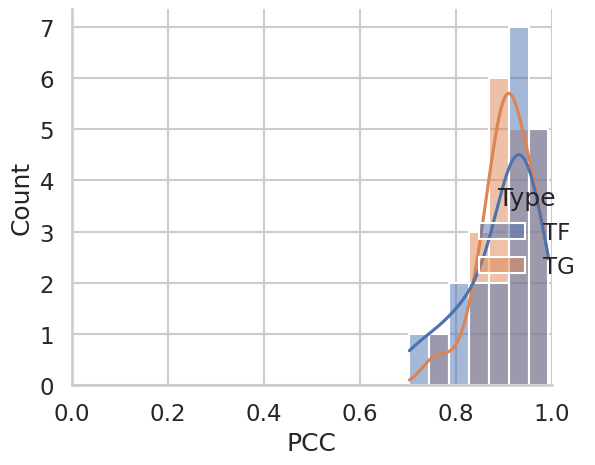

(             Tissue Type  Age metric       val
 0       Limb_Muscle   TF   3m   corr  0.921121
 1       Limb_Muscle   TF  24m   corr  0.897196
 8              Lung   TF   3m   corr  0.786562
 9              Lung   TF  24m   corr  0.852971
 16          Trachea   TF   3m   corr  0.838353
 17          Trachea   TF  24m   corr  0.915894
 24         Pancreas   TF   3m   corr  0.917306
 25         Pancreas   TF  24m   corr  0.934172
 32             SCAT   TF   3m   corr  0.892499
 33             SCAT   TF  24m   corr  0.817352
 40           Thymus   TF   3m   corr  0.947567
 41           Thymus   TF  24m   corr  0.917534
 48           Tongue   TF   3m   corr  0.925687
 49           Tongue   TF  24m   corr  0.952463
 56  Large_Intestine   TF   3m   corr  0.988442
 57  Large_Intestine   TF  24m   corr  0.974085
 64             Skin   TF   3m   corr  0.977222
 65             Skin   TF  24m   corr  0.957146
 72              GAT   TF   3m   corr  0.703251
 73              GAT   TF  24m   corr  0

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- 1) Pack arrays into a tidy DataFrame
records = []


records = []
count = 0
for t in tissues:
    print(t)
    records.append({'Tissue': t, 'Type':'TF', 'Age': '3m', 'metric':'corr', 'val':corr_pcc_tf3[count]})
    records.append({'Tissue': t, 'Type':'TF', 'Age': '24m',  'metric':'corr', 'val': corr_pcc_tf24[count]})
    records.append({'Tissue': t, 'Type':'TF', 'Age': '3m', 'metric':'mean', 'val': mean_pcc_tf3[count]})
    records.append({'Tissue': t, 'Type':'TF', 'Age': '24m', 'metric':'mean', 'val': mean_pcc_tf24[count]})

    records.append({'Tissue': t, 'Type':'TG', 'Age': '3m', 'metric':'corr', 'val': corr_pcc_tg3[count]})
    records.append({'Tissue': t, 'Type':'TG', 'Age': '24m', 'metric':'corr', 'val': corr_pcc_tg24[count]})
    records.append({'Tissue': t, 'Type':'TG', 'Age': '3m', 'metric':'mean', 'val': mean_pcc_tg3[count]})
    records.append({'Tissue': t, 'Type':'TG', 'Age': '24m', 'metric':'mean', 'val': mean_pcc_tg24[count]})
    count+=1

df = pd.DataFrame(records)

# df.head()
import pandas as pd
import numpy as np

# assuming you already did: df = pd.DataFrame(records)
df = pd.DataFrame(records)


sns.set_theme(context="talk", style="whitegrid")

# Corr histograms by age, colored TF/TG; facet by tissue
g = sns.displot(
    data=df[(df['metric']=='corr')],
    x="val", hue="Type",kde=True,
    kind="hist"

)
g.set(xlabel="PCC", ylabel="Count")
plt.xlim([0,1])
plt.tight_layout()

plt.show()
df[(df['metric']=='corr')& (df['Type']=='TF')],

In [ ]:
cov_mat_tf_tg_real3 = np.load(f'paper_figs_final/cov_tf_tg_data_3m_{t}.npy')
cov_mat_tf_tg_real24 = np.load(f'paper_figs_final/cov_tf_tg_data_24m_{t}.npy')

cov_mat_tf_tg_gen3 = np.load(f'paper_figs_final/cov_tf_tg_gen_3m_{t}.npy')
cov_mat_tf_tg_gen24 = np.load(f'paper_figs_final/cov_tf_tg_gen_24m_{t}.npy')
mask = ~np.eye(cov_mat_tf_tg_real3.shape[0], dtype=bool)
x

print(cov_mat_tf_tg_gen24.shape, cov_mat_tf_tg_gen3.shape, cov_mat_tf_tg_real24.shape, cov_mat_tf_tg_real3.shape)
np.corrcoef(cov_mat_tf_tg_gen3.flatten(),cov_mat_tf_tg_real3.flatten())[0,1], t, np.corrcoef(cov_mat_tf_tg_gen24.flatten(),cov_mat_tf_tg_real24.flatten())[0,1]

(6849, 6849) (6849, 6849) (6849, 6849) (6849, 6849)


(np.float64(0.761820953036082), 'Limb_Muscle', np.float64(0.6131466585072948))

 tissue is GAT, 3 is 0.98, 24 is 2
 tissue is SCAT, 3 is 1, 24 is 1.3
 tissue is Limb_Muscle, 3 is 2, 24 is 3
 tissue is Large_Intestine, 3 is 5, 24 is 3
 tissue is Tongue, 3 is 3, 24 is 3
 tissue is Trachea, 3 is 2, 24 is 2
 tissue is Pancreas, 3 is 3, 24 is 2
 tissue is Skin, 3 is 3, 24 is 2
 tissue is Thymus, 3 is 2, 24 is 3
 tissue is Lung, 3 is 2, 24 is 5
tissue is Limb_Muscle
(720801,)
3m means: 849 16394 | 24m means: 849 16394 | TF–TG 3m: 46908801 46908801 | TF–TG 24m: 46908801 46908801
pcc mean tf 3: 0.9919604831382017pcc mean tf 24: 0.9983268065975036pcc mean tg 3: 0.996200663821228 pcc mean tg 24: 0.9971295801042752


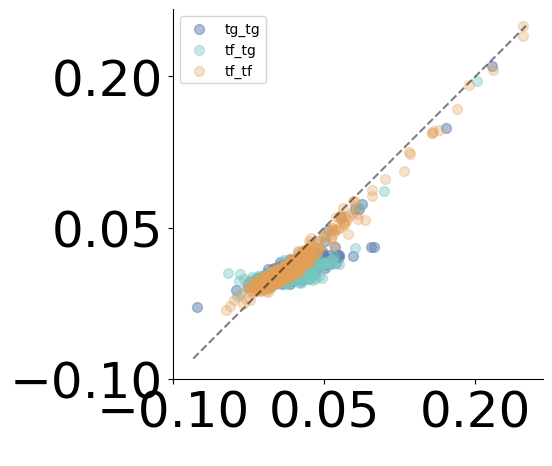

In [24]:
import seaborn as sns
from tqdm import tqdm
import matplotlib as mpl
#fig, ax = plt.subplots(1, figsize=(15, 12))

dict_tissue = {}
factor = 0.01
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

with open("tissue_names_with_lam.txt", "r") as f:
    for line in f:
        parts = line.strip().split()  # split by whitespace
        t = parts[0]
        if np.any(tissues == t):
            lam3 = float(parts[1]) if "." in parts[1] else int(parts[1])
            lam24 = float(parts[2]) if "." in parts[2] else int(parts[2])#int(parts[2])
            print(f' tissue is {t}, 3 is {lam3}, 24 is {lam24}')
            dict_tissue[t] = [lam3, lam24]


mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['font.family'] = mpl.rcParamsDefault['font.family']
PALETTE_3_ALT = ["#7F7F7F", "#76C7C0", "#C2A5CF"] 
co = "#76C7C0"
ctg = "#7F7F7F"
ctf = "#C2A5CF"
ctf_tf = "#E49E56"
ctg_tg = "#5E7FB0"

def plot_all_cov(t, dict_tissue):
    
    print(f'tissue is {t}')
    lams = dict_tissue[t]
    factor = 0.01
    stats_3m = loadmat(f'paper_figs_final/fig_mean_act_corr_{t}_3m_final_v2.mat')
    stats_24m = loadmat(f'paper_figs_final/fig_mean_act_corr_{t}_24m_final_v2.mat')

    tg_samples3 = np.load(f'../project/Aging/output_tg_{t}/3m/samples_3m_lam_{lams[0]}_factor_{factor}_tf_sampled.npy')
    tg_samples24 = np.load(f'../project/Aging/output_tg_{t}/24m/samples_24m_lam_{lams[1]}_factor_{factor}_tf_sampled.npy')

    tg_mean_gen3 = tg_samples3.mean(axis=1)
    tg_mean_gen24 = tg_samples24.mean(axis=1)

    cov_mat_tf_tg_real3 = np.load(f'../project/cov_tf_tg_data_3m_{t}.npy')
    cov_mat_tf_tg_real3 = cov_mat_tf_tg_real3
    cov_mat_tf_tg_real24 = np.load(f'../project/cov_tf_tg_data_24m_{t}.npy')

    cov_mat_tf_tg_gen3 = np.load(f'../project/cov_tf_tg_gen_3m_{t}.npy')
    cov_mat_tf_tg_gen24 = np.load(f'../project/cov_tf_tg_gen_24m_{t}.npy')

    cov_mat_tg_tg_gen3 = np.load(f'../project/cov_tg_tg_gen_3m_{t}.npy')
    cov_mat_tg_tg_gen24 = np.load(f'../project/cov_tg_tg_gen_24m_{t}.npy')

    cov_mat_tg_tg_data3 = np.load(f'../project/cov_tg_tg_data_3m_{t}.npy')
    cov_mat_tg_tg_data24 = np.load(f'../project/cov_tg_tg_data_24m_{t}.npy')

    #L1_arr_tf = np.append(L1_arr_tf, np.sum(np.abs(cov_matrix_real - cov_matrix_gen)))
    #L1_arr_tf_mean = np.append(L1_arr_tf_mean,np.sum(np.abs(data.mean(axis=1)- samples.mean(axis=1))))
    
    fig, ax = plt.subplots()# figsize=(24,12))
    # make square
    #ax.set_aspect('equal', adjustable='box')

    # add horizontal space between the two
    #fig.subplots_adjust(wspace=0.3)  
    #sns.set_style("whitegrid")
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    rand = np.random.randint(cov_mat_tg_tg_gen3.flatten().shape[0],size = 80000) 
    rand_tf= np.random.randint(stats_24m['corr_tf_data'].flatten().shape[0],size = 60000) 
    rand_tf_tg = np.random.randint(cov_mat_tf_tg_real3.flatten().shape[0],size = 80000) 
    rand_tg = np.random.randint(tg_mean_gen24.flatten().shape[0], size=10000)
    #ax.set_title('Mean', fontsize=32)
    print(stats_24m['corr_tf_data'].flatten().shape)
    
    #ax.plot([-0.02,1.02],[-0.02,1.02],'--', linewidth = 1.2 ,c='black', alpha=0.5, zorder=2)
    #ax.scatter(tg_mean_gen24.flatten()[rand_tg], stats_24m['mean_tg_data'].flatten()[rand_tg], c=ctg, alpha=0.5, s=18, label='TG-TG')
    #ax.scatter(stats_24m['mean_tf_data'].flatten(), stats_24m['mean_tf_gen'].flatten(), c=ctf, alpha=0.7, s=18, label='TF-TF')
    
    
    ax.scatter(cov_mat_tg_tg_data24.flatten()[rand], cov_mat_tg_tg_gen24.flatten()[rand], c=ctg_tg, s=50, alpha=0.5, label='tg_tg')
    
    ax.scatter(cov_mat_tf_tg_real24.flatten()[rand_tf_tg], cov_mat_tf_tg_gen24.flatten()[rand_tf_tg], c=co, alpha=0.4, s=50, label = 'tf_tg')
    ax.scatter(stats_24m['corr_tf_data'].flatten()[rand_tf], stats_24m['corr_tf_gen'].flatten()[rand_tf], c=ctf_tf, s=50, alpha=0.3, label = 'tf_tf')
    
    maxx = max(stats_24m['corr_tf_data'].flatten().max(), cov_mat_tf_tg_real24.max())
    maxx = max(maxx, cov_mat_tg_tg_data24.flatten()[rand].max())

    minx = min(stats_24m['corr_tf_data'].flatten().min(), cov_mat_tf_tg_real24.min())
    minx = min(stats_24m['corr_tf_data'].flatten().min(), cov_mat_tg_tg_data24.flatten()[rand].min())
    minx = min(minx, -0.08)

    ax.plot([minx,maxx], [minx,maxx], '--', linewidth = 1.5 ,alpha=0.5, c='black')
    
    plt.legend()

    #ax[1,0].set_title('Mean 24m', fontsize=32)
    #ax.plot([0,1],[0,1],c='black', alpha=0.3)
    #ax[1,0].scatter(stats_24m['mean_tf_data'].flatten(), stats_24m['mean_tf_gen'].flatten(), c='grey', alpha=0.5, s=15, label='TF-TF')
    #ax[1,0].scatter(stats_24m['mean_tg_data'].flatten(), stats_24m['mean_tg_gen'].flatten(), c='lightgreen', alpha=0.6, s=15, label='TG-TG')
    #ax[1,0].set_xlabel('Real Data', fontsize=32)

    
    #ax[0,1].set_title('Corr 3m', fontsize=32)
    #ax[1].scatter(stats_3m['corr_tf_data'].flatten(), stats_3m['corr_tf_gen'].flatten(), c='grey', s=18, alpha=0.5)
    #ax[1].scatter(cov_mat_tf_tg_real3.flatten()[rand_tf_tg], cov_mat_tf_tg_gen3.flatten()[rand_tf_tg], c='pink', alpha=0.5, s=18)
    #ax[1].scatter(stats_3m['corr_tg_data'].flatten()[rand], stats_3m['corr_tg_gen'].flatten()[rand], c='lightgreen', s=18, alpha=0.5)
    
    #maxx = max(stats_3m['corr_tf_data'].flatten().max(), stats_3m['corr_tg_data'].flatten()[rand].max())
    #minx = min(stats_3m['corr_tf_data'].flatten().min(), stats_3m['corr_tg_data'].flatten()[rand].min())
    #ax[1].plot([minx,maxx], [minx,maxx], alpha=0.3, c='black')

    #ax[1,1].set_title('Corr 24m', fontsize=32)
    #ax[1,1].scatter(stats_24m['corr_tf_data'].flatten(), stats_24m['corr_tf_gen'].flatten(), c='grey', s=18, alpha=0.5)
    #ax[1,1].scatter(cov_mat_tf_tg_real24.flatten()[rand_tf_tg], cov_mat_tf_tg_gen24.flatten()[rand_tf_tg], c='pink', alpha=0.5, s=18)

    #ax[1,1].scatter(stats_24m['corr_tg_data'].flatten()[rand], stats_24m['corr_tg_gen'].flatten()[rand], c='lightgreen', s=18, alpha=0.5)
    #print(f'corr tg {np.corrcoef(stats_24m['corr_tg_data'], stats_24m['corr_tg_gen'])[0,1]}')
    #print(f'corr tg 3m {np.corrcoef(stats_3m['corr_tg_data'], stats_3m['corr_tg_gen'])[0,1]}')

    #print(f'corr tf {np.corrcoef(stats_24m['corr_tf_data'], stats_24m['corr_tf_gen'])[0,1]}')
    #print(f'corr tf 3m {np.corrcoef(stats_3m['corr_tf_data'], stats_3m['corr_t_gen'])[0,1]}')

    #maxx = max(stats_24m['corr_tf_data'].flatten().max(), stats_24m['corr_tg_data'].flatten()[rand].max())
    #minx = min(stats_24m['corr_tf_data'].flatten().min(), stats_24m['corr_tg_data'].flatten()[rand].min())
    #ax[1,1].plot([minx,maxx], [minx,maxx], alpha=0.3, c='black')
    #ax[1,1].set_xlabel('Real Data', fontsize=32)

    print(
    "3m means:", stats_3m['mean_tf_data'].size, stats_3m['mean_tg_data'].size,
    "| 24m means:", stats_24m['mean_tf_data'].size, stats_24m['mean_tg_data'].size,
    "| TF–TG 3m:", cov_mat_tf_tg_real3.size, cov_mat_tf_tg_gen3.size,
    "| TF–TG 24m:", cov_mat_tf_tg_real24.size, cov_mat_tf_tg_gen24.size
    )

    print(
        #f"corr tg 24m: {np.corrcoef(cov_mat_tg_tg_data24.flatten(), cov_mat_tg_tg_gen24.flatten())[0,1]}",
        #f"| corr tg 3m: {np.corrcoef(cov_mat_tg_tg_data3.flatten(), cov_mat_tg_tg_gen3.flatten())[0,1]}",
        f"pcc mean tf 3: {np.corrcoef(stats_3m['mean_tf_data'].flatten(), stats_3m['mean_tf_gen'].flatten())[0,1]}"
        f"pcc mean tf 24: {np.corrcoef(stats_24m['mean_tf_data'].flatten(), stats_24m['mean_tf_gen'].flatten())[0,1]}"

        f"pcc mean tg 3: {np.corrcoef(tg_mean_gen3.flatten(), stats_3m['mean_tg_data'].flatten())[0,1]}",
        f"pcc mean tg 24: {np.corrcoef(tg_mean_gen24.flatten(), stats_24m['mean_tg_data'].flatten())[0,1]}"
        #f"| corr tf 3m: {np.corrcoef(stats_3m['corr_tf_data'].flatten(), stats_3m['corr_tf_gen'].flatten())[0,1]}",
        #f"| corr tf 24m: {np.corrcoef(stats_24m['corr_tf_data'].flatten(), stats_24m['corr_tf_gen'].flatten())[0,1]}",

        #f"| corr tf tg 24m: {np.corrcoef(cov_mat_tf_tg_real24.flatten(), cov_mat_tf_tg_gen24.flatten())[0,1]}",
        #f"| corr tf tg 3m: {np.corrcoef(cov_mat_tf_tg_real3.flatten(), cov_mat_tf_tg_gen3.flatten())[0,1]}"

    )
    #ax[1,1].set_title('Corr', fontsize=32)
    #ax[1].set_title('Correlation', fontsize=45)
    #ax[0].set_title('Mean', fontsize=45)
    #ax[1,1].set_xlabel('Real Data', fontsize=36)
    #ax[1,0].set_xlabel('Real Data', fontsize=36)
    ax.set_xlabel(' ')#, fontsize=36)
    #ax[1].set_xlabel(' ')#, fontsize=36)
    plt.xticks(fontsize=36)
    plt.yticks(fontsize=36)
    # ax[0,0].legend(fontsize=45, markerscale=2.5)
    
    ax.grid(False)

    #plt.subplots_adjust(hspace=0.8)
    # --- Shared y label for the whole figure ---

    # --- Shared x labels by row ---
    #fig.text(0.5, 0.48, "24m", ha="center", fontsize=42)
    #fig.text(0.5, 0.48, "Real Data", ha="center", fontsize=28)
    sns.despine(top=True, right=True)
    ax.set_aspect('equal', adjustable='box') 
    #plt.grid(color='grey', linestyle='-', linewidth=1, alpha=0.3)
    plt.xticks([-0.1, 0.05, 0.2])
    plt.yticks([-0.1, 0.05, 0.2])
    #plt.yticks([-0.1, 0, 0.1, 0.2])

    #plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])


    #plt.suptitle('3m', fontsize=42)
    #fig.text(0.5, 0.9, "3m", ha="center", fontsize=42)
    #fig.text(0.1, 0.5, "Generated Data", va="center", rotation="vertical", fontsize=36)

    #fig.tight_layout()
    
    #plt.savefig(f'paper_figs_final/stat_summary_{t}', dpi=300)
    for coll in getattr(ax, "collections", []):  # collections = scatter plots
        coll.set_rasterized(True)

    fig.savefig(f'paper_figs_final/stat_corr_{t}_24m.pdf',
                dpi=150,         # controls rasterized resolution
                bbox_inches='tight')


    #print(np.corrcoef(cov_mat_tf_tg_gen3.flatten(),cov_mat_tf_tg_real3.flatten())[0,1], t, np.corrcoef(cov_mat_tf_tg_gen24.flatten(),cov_mat_tf_tg_real24.flatten())[0,1])

    #ax[1,0].legend()
    #corr_tf_tg_3m = np.cov(data_tf_3m, data_tg_3m.flatten()[rand])
    #corr_tf_tg_24m = np.cov(data_tf24_3m, data_tg_24m.flatten()[rand])

tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
for t in tissues[1:2]:
    plot_all_cov(t, dict_tissue)

#ax[1].scatter(stats_3m['corr_tg_data'], stats_3m['corr_tg_gen'], s=6)

In [14]:
import matplotlib.font_manager as fm

# Get list of all fonts Matplotlib can find
fonts = sorted([f.name for f in fm.fontManager.ttflist])
print(fonts)

['C059', 'C059', 'C059', 'C059', 'Cantarell', 'Cantarell', 'Cantarell', 'Cantarell', 'D050000L', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'Droid Sans', 'Droid Sans', 'Droid Sans Arabic', 'Droid Sans Armenian', 'Droid Sans Devanagari', 'Droid Sans Ethiopic', 'Droid Sans Ethiopic', 'Droid Sans Fallback', 'Droid Sans Georgian', 'Droid Sans Hebrew', 'Droid Sans Hebrew', 'Droid Sans Japanese', 'Droid Sans Tamil', 'Droid Sans Tamil', 'Droid Sans Thai', 'Inconsolata', 'Inconsolata', 'MathJax_AMS', 'MathJax_Caligraphic', 'MathJax_Caligraphic', 'MathJax_Fraktur', 'MathJax_Fraktur', 'MathJax_Main', 'MathJax_Main', 'MathJax_Main', 'MathJax_Math', 'MathJax_Math', 'MathJax_Math', 'MathJax_SansSerif'

In [22]:
import numpy as np
from scipy.stats import wilcoxon

def test_input_vs_grn(data_mi_swap_all, young_key='3m',
                      input_key='3m distribution in 24m network',
                      grn_key='3m network in 24m distribution',
                      n_boot=10000, alternative='greater'):
    """
    Compare input rejuvenation vs GRN rejuvenation across tissues.

    Parameters
    ----------
    data_mi_swap_all : dict[tissue -> dict[str -> np.ndarray]]
        Each tissue maps to dicts with MI arrays for each condition.
    young_key : str
        Key for youthful baseline (e.g., '3m').
    input_key : str
        Key for input rejuvenation (old network, young inputs).
    grn_key : str
        Key for GRN rejuvenation (young network, old inputs).
    n_boot : int
        Number of bootstrap resamples for CI.
    alternative : str
        'greater' tests whether input rejuvenation > GRN rejuvenation.

    Returns
    -------
    summary : dict
        {
          'tissues': list,
          'frac_input': np.ndarray,
          'frac_grn': np.ndarray,
          'delta': np.ndarray,
          'p_cross_tissue': float,
          'ci_mean_delta': (low, high)
        }
    """

    tissues, frac_input, frac_grn, delta = [], [], [], []

    # --- per-tissue summaries ---
    for t in data_mi_swap_all.keys():
        mi_young = np.asarray(data_mi_swap_all[t][young_key])
        mi_OY = np.asarray(data_mi_swap_all[t][input_key])
        mi_YO = np.asarray(data_mi_swap_all[t][grn_key])

        # avoid nans and zeros
        mask = np.isfinite(mi_young) & np.isfinite(mi_OY) & np.isfinite(mi_YO)
        mi_young, mi_OY, mi_YO = mi_young[mask], mi_OY[mask], mi_YO[mask]

        if mi_young.size == 0:
            continue

        fi = np.nanmean(mi_OY) / np.nanmean(mi_young)
        fg = np.nanmean(mi_YO) / np.nanmean(mi_young)
        d  = fi - fg

        tissues.append(t)
        frac_input.append(fi)
        frac_grn.append(fg)
        delta.append(d)

    frac_input = np.array(frac_input)
    frac_grn   = np.array(frac_grn)
    delta      = np.array(delta)

    # --- cross-tissue paired test ---
    res = wilcoxon(delta, alternative=alternative)
    p_cross = res.pvalue

    # --- bootstrap CI for mean delta ---
    boot = [np.mean(np.random.choice(delta, size=len(delta), replace=True))
            for _ in range(n_boot)]
    ci_low, ci_high = np.percentile(boot, [2.5, 97.5])

    # --- print summary ---
    print("Tissue-level MI restoration summary")
    print("---------------------------------------------------------")
    print(f"{'Tissue':20s} {'Input%':>8s} {'GRN%':>8s} {'Δ (Input−GRN)':>14s}")
    for t, fi, fg, d in zip(tissues, frac_input, frac_grn, delta):
        print(f"{t:20s} {100*fi:8.1f} {100*fg:8.1f} {100*d:14.1f}")
    print("---------------------------------------------------------")
    print(f"Across tissues: median Δ = {np.median(delta):.3f}, "
          f"mean Δ = {np.mean(delta):.3f}")
    print(f"95% bootstrap CI for mean Δ: [{ci_low:.3f}, {ci_high:.3f}]")
    print(f"Wilcoxon signed-rank (one-sided '{alternative}') p = {p_cross:.4g}")

    return {
        'tissues': tissues,
        'frac_input': frac_input,
        'frac_grn': frac_grn,
        'delta': delta,
        'p_cross_tissue': p_cross,
        'ci_mean_delta': (ci_low, ci_high)
    }

results = test_input_vs_grn(data_mi_swap_all)

Tissue-level MI restoration summary
---------------------------------------------------------
Tissue                 Input%     GRN%  Δ (Input−GRN)
Thymus                   73.7     96.9          -23.2
Brain_Non-Myeloid        96.6     25.1           71.5
Limb_Muscle              63.0     36.9           26.2
Skin                    151.3     69.3           82.0
Pancreas                113.0     43.6           69.5
Diaphragm                51.8     60.1           -8.3
Trachea                  98.5     73.2           25.4
Tongue                  101.2     86.6           14.6
Bladder                  87.4     68.6           18.8
Large_Intestine         117.2     73.3           43.9
GAT                      73.1     39.6           33.5
MAT                     156.3     48.8          107.5
SCAT                     89.4     38.5           50.9
Lung                     48.2     81.6          -33.4
---------------------------------------------------------
Across tissues: median Δ = 0.299, mean

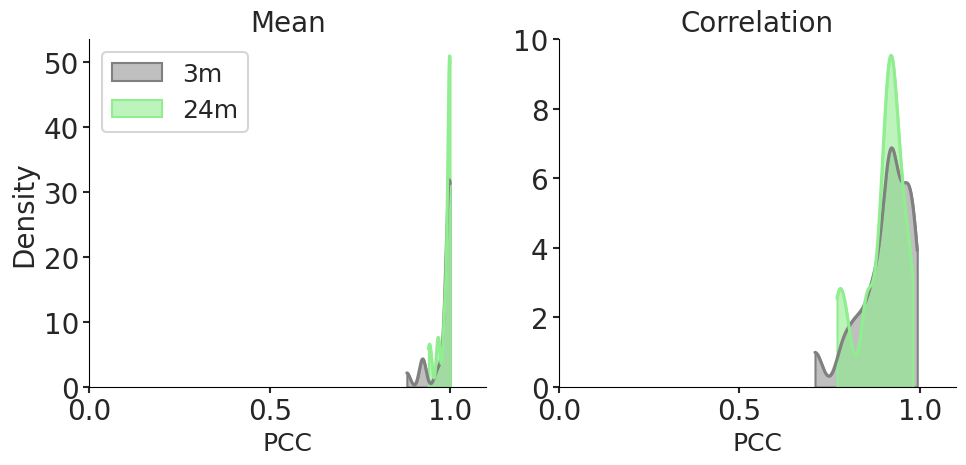

In [260]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(10,5))
bw = 0.5
metrics = ["mean", "corr"]
for ax, m in zip(axes, metrics):
    subset = df[df["metric"]==m]

    # 3m curve
    sns.kdeplot(
        data=subset[subset["Age"]=="3m"],
        x="val",
        color="grey",
        fill=True,
        alpha=0.5,       # alpha for 3m
        bw_adjust=bw,
        cut=0, clip=(0,1),
        common_norm=False,
        ax=ax,
        label="3m"
    )

    # 24m curve
    sns.kdeplot(
        data=subset[subset["Age"]=="24m"],
        x="val",
        color="lightgreen",
        fill=True,
        alpha=0.6,       # alpha for 24m
        bw_adjust=bw,
        cut=0, clip=(0,1),
        ax=ax,
        label="24m"
    )

    sns.kdeplot(
        data=subset[subset["Age"]=="3m"],
        x="val",
        color="grey",
        fill=False,
        alpha=1,       # alpha for 3m
        bw_adjust=bw,
        cut=0, clip=(0,1),
        common_norm=False,
        ax=ax,
    )

    # 24m curve
    sns.kdeplot(
        data=subset[subset["Age"]=="24m"],
        x="val",
        color="lightgreen",
        fill=False,
        alpha=1,       # alpha for 24m
        bw_adjust=bw,
        cut=0, clip=(0,1),
        ax=ax,
    )

    #ax.set_box_aspect(1)

    ax.set_xlabel("PCC")
    ax.set_xlim(0, 1.1)
    ax.grid(False)

for ax in axes:
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(0.8)
axes[0].legend(fontsize=18)
for ax in axes:
    ax.tick_params(bottom=True, left=True, length=4, width=1.5)  # force x and y ticks on
axes[1].set_title('Correlation', fontsize=20)
axes[0].set_xlim([0,1.1])
axes[0].set_ylabel("Density", fontsize=20)
axes[1].set_ylabel("")
axes[0].set_title('Mean', fontsize=20)
#plt.suptitle("Model fit", fontsize=20)
#plt.grid(alpha=.3)
plt.xlim([0,1.1])
axes[1].set_ylim([0,10])
#plt.suplegend(loc='center')
axes[0].tick_params(labelsize=20)

axes[1].tick_params(labelsize=20)
sns.despine(offset=0, trim=False)


plt.tight_layout()
df[df["metric"]=='corr'].shape

plt.savefig('paper_figs_final/model_fit.pdf', dpi=300)

# MI Comparison

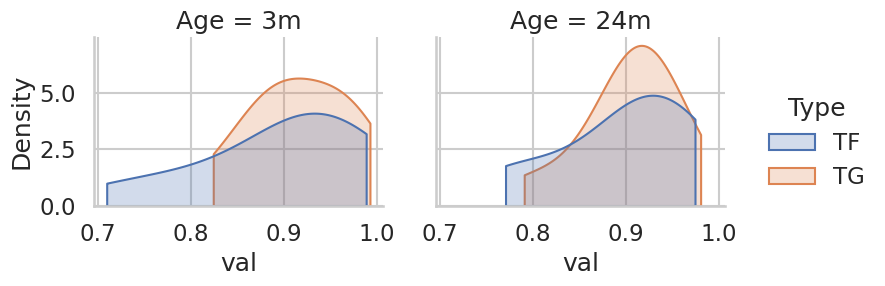

In [100]:
subset = df[df["metric"]=="corr"]            # or "mean"
g = sns.displot(
    data=subset,
    x="val",
    hue="Type",                   # TF vs TG
    col="Age",                    # one KDE per age
    kind="kde",
    fill=True,
    common_norm=False,
    bw_adjust=1.2,                # smoothness (↓=bumpier, ↑=smoother)
    cut=0,                        # trim to data range
    height=3.2, aspect=1.2
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
rows = []
mis = {}
tissues_filt = []

|

        print(t, lam3, lam24)
        rows.append((t, lam3, lam24))
        
        if not os.path.exists(f'MI3m_tg_lam_{lam24}_10_{t}.npy'):
            print(f'did not run for {t}, MI3m_tf_lam_{lam3}_10_{t}')
            continue
        
        data_tf = np.load(f'data/{t}_tf_data_binary_3m_filt.npy')
        data_tg = np.load(f'data/{t}_tg_data_binary_3m_filt.npy')
        print(f'WE ARE ONNNNNNN {t} and 3m, shape is, {data_tf.shape}, {data_tg.shape}')
        if data_tf.shape[0] < 800:
            print(f'not enough TFs for 3m {t}')
            continue

        if data_tf.shape[1] < 800:
            print(f'not enough cells for 3m {t}')
            continue

        data_tf = np.load(f'data/{t}_tf_data_binary_24m_filt.npy')
        data_tg = np.load(f'data/{t}_tg_data_binary_24m_filt.npy')
        print(f'WE ARE ONNNNNNN {t} and 24m, shape is, {data_tf.shape}, {data_tg.shape}')
        

        if data_tf.shape[0] < 800:
            print(f'not enough TFs for 24m {t}')
            continue

        if data_tf.shape[1] < 800:
            print(f'not enough cells for 24m {t}')
            continue

        tissues_filt.append(t)
        #MI3 = np.load(f'MI3m_tf_lam_{lam3}_10_{t}.npy').mean(axis=0)
        print(MI3.shape)
        #MI24 = np.load(f'MI24m_tf_lam_{lam24}_10_{t}.npy').mean(axis=0)
        #mis[t] = {'3m TF': MI3, '24m TF':MI24, 'MI diff': MI3-MI24}
        #mis_tg[t] = {'3m TF': MI3, '24m TF':MI24, 'MI diff': MI3-MI24}
        
        
        #plt.scatter(MI3, MI24, s=5, c='grey')
        #minx = min(MI3.min(), MI24.min())
        #maxx = max(MI3.max(),  MI24.max())
        #plt.figure()
        #plt.title(f'{t}')
        #xs = [minx,maxx]
        #plt.plot(xs,xs, c='black')
        #plt.xticks(fontsize=20)
        #plt.yticks(fontsize=20)



Kidney 3 2
WE ARE ONNNNNNN Kidney and 3m, shape is, (774, 502), (14943, 502)
not enough TFs for 3m Kidney
Thymus 2 3
WE ARE ONNNNNNN Thymus and 3m, shape is, (924, 1359), (18030, 1359)
WE ARE ONNNNNNN Thymus and 24m, shape is, (924, 1242), (18030, 1242)
(924,)
Brain_Non-Myeloid 3 3
WE ARE ONNNNNNN Brain_Non-Myeloid and 3m, shape is, (969, 3442), (19725, 3442)
WE ARE ONNNNNNN Brain_Non-Myeloid and 24m, shape is, (969, 756), (19725, 756)
not enough cells for 24m Brain_Non-Myeloid
Limb_Muscle 2 3
WE ARE ONNNNNNN Limb_Muscle and 3m, shape is, (849, 1102), (16394, 1102)
WE ARE ONNNNNNN Limb_Muscle and 24m, shape is, (849, 1232), (16394, 1232)
(924,)
Skin 3 2
WE ARE ONNNNNNN Skin and 3m, shape is, (849, 2346), (16751, 2346)
WE ARE ONNNNNNN Skin and 24m, shape is, (849, 1122), (16751, 1122)
(924,)
Pancreas 3 2
WE ARE ONNNNNNN Pancreas and 3m, shape is, (855, 1588), (17511, 1588)
WE ARE ONNNNNNN Pancreas and 24m, shape is, (855, 963), (17511, 963)
(924,)
Heart 5 6
did not run for Heart, MI3m_t

In [ ]:
import pandas as pd
records = []
for tissue, conds in mis.items():
    for cond, values in conds.items():
        #print(values)
        for v in values:
            records.append({'Tissue': tissue, 'Age': cond})

df = pd.DataFrame(records)
mi_no_swap = pd.read_csv('MI_diff_summary')
np.save('tissues_filt', tissues_filt)
tissues_filt, len(tissues_filt)#, mi_no_swap, mi_no_swap[mi_no_swap['Tissue'].isin(tissues_filt)]

(['Thymus',
  'Limb_Muscle',
  'Skin',
  'Pancreas',
  'Trachea',
  'Tongue',
  'Large_Intestine',
  'GAT',
  'SCAT',
  'Lung'],
 10)

In [93]:
def bootstrap_ci(x, n_boot=1000, ci=95):
    means = np.array([np.mean(np.random.choice(x, size=len(x), replace=True)) for _ in range(n_boot)])
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(x), lower, upper

['Thymus' 'Brain_Non-Myeloid' 'Limb_Muscle' 'Skin' 'Pancreas' 'Diaphragm'
 'Trachea' 'Tongue' 'Bladder' 'Large_Intestine' 'GAT' 'MAT' 'SCAT' 'Lung']
['Thymus' 'Limb_Muscle' 'Skin' 'Pancreas' 'Trachea' 'Tongue'
 'Large_Intestine' 'GAT' 'SCAT' 'Lung'] ['GAT' 'Limb_Muscle' 'Lung' 'Trachea' 'SCAT' 'Pancreas' 'Thymus' 'Tongue'
 'Large_Intestine' 'Skin']


/tmp/ipykernel_2298980/63986166.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_props = df_mi.groupby('Tissue').apply(lambda x: pd.Series({


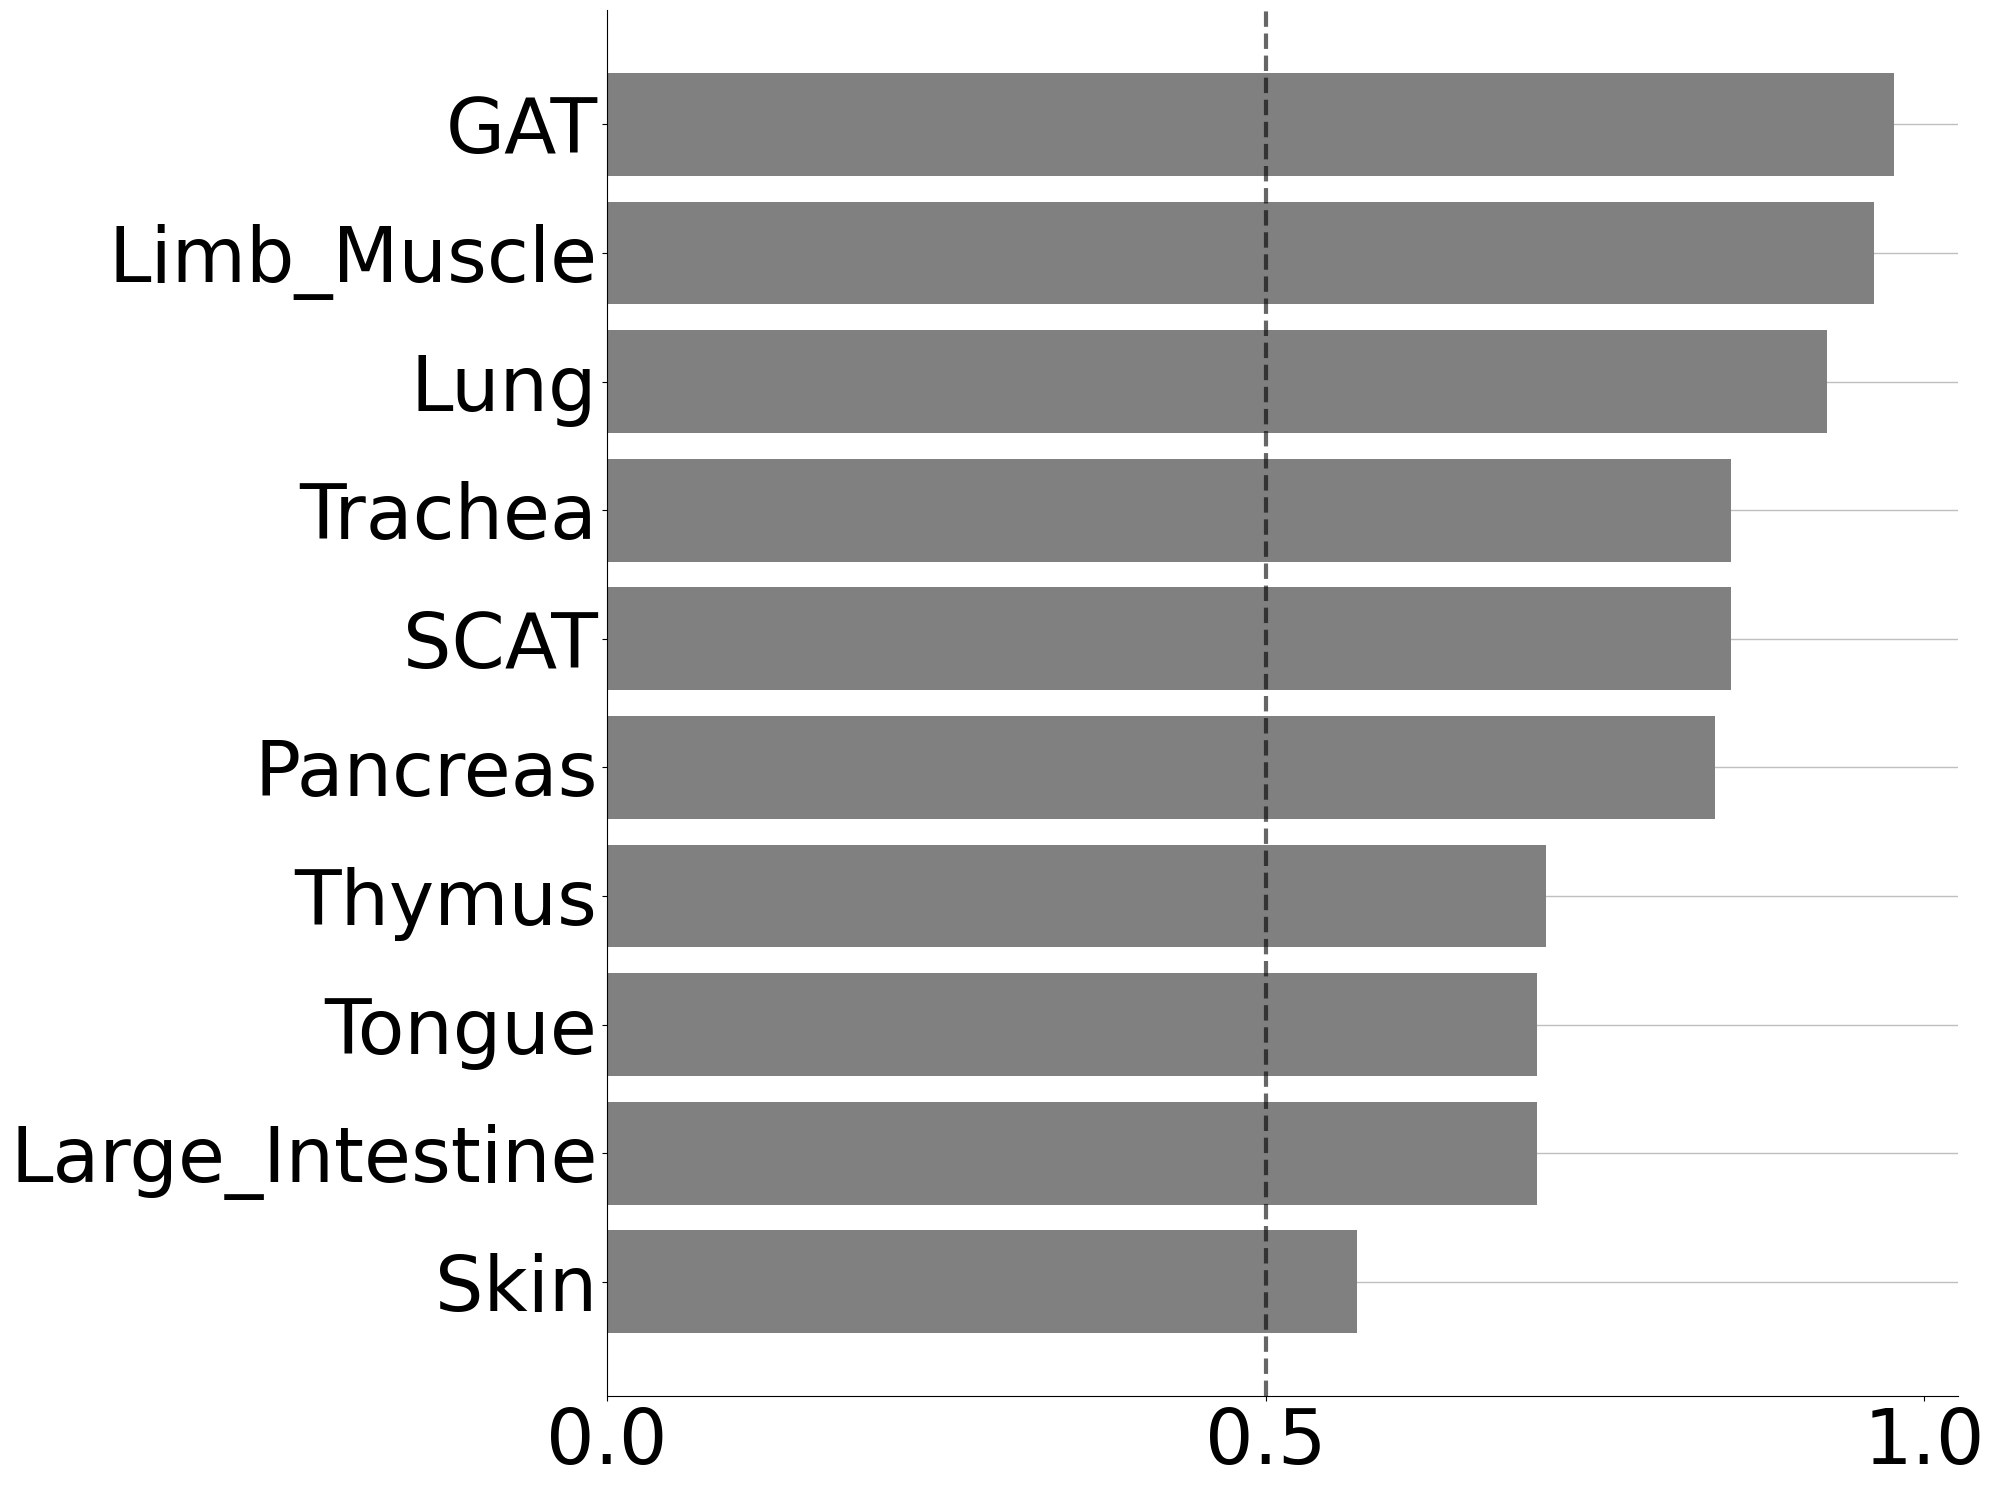

['GAT' 'Limb_Muscle' 'Lung' 'Trachea' 'SCAT' 'Pancreas' 'Thymus' 'Tongue'
 'Large_Intestine' 'Skin'] 10


In [94]:
# Bootstrap CI (returns: median, CI_low, CI_high)
tissues_filt = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

from scipy.stats import binomtest
import seaborn as sns

mi_no_swap = pd.read_csv('MI_diff_summary_final')
print(mi_no_swap['Tissue'].unique())
df_mi = mi_no_swap[mi_no_swap['Tissue'].isin(tissues_filt)]
print(df_mi['Tissue'].unique(), tissues_filt)
#df_mi = pd.read_csv('MI_diff_summary,csv')#df_mi_diff[df_mi_diff['Type']=='m3_network_in_24m_distribution']

# Proportion + p-value
summary_props = df_mi.groupby('Tissue').apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI_diff'] > 0),
    'Count': len(x),
    'P_value': binomtest(np.sum(x['MI_diff'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()

# Merge with median & CI
summary_stats = summary_props.merge(
    df_mi.groupby('Tissue')['MI_diff'].apply(bootstrap_ci).reset_index(name='CI_tuple'),
    on='Tissue'
)
summary_stats[['Mean', 'CI_lower', 'CI_upper']] = pd.DataFrame(
    summary_stats['CI_tuple'].tolist(), index=summary_stats.index
)

# Sort by proportion
summary_stats.sort_values('Proportion_Positive', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(20, 15))
colors = ['#2C3E50' if p < 0.05 else '#D35400' for p in summary_stats['P_value']]
bars = plt.barh(summary_stats['Tissue'], summary_stats['Proportion_Positive'], color='grey')
sns.despine(left=False, bottom=False)


plt.axvline(0.5, linestyle='--', linewidth=3, color='black', zorder=2, alpha=0.6)
#plt.title('Proportion of Genes with ΔMI > 0 (3m - 18m)', fontsize=18)
#plt.xlabel('Proportion Positive', fontsize=16)
#xs = max[]
plt.xticks([0, 0.5, 1],fontsize=55)
plt.yticks(fontsize=55)
plt.grid(axis='y', color='grey', linestyle='-', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.savefig('paper_figs_final/proportion_positive_MI_plot.pdf', dpi=600)
plt.show()
np.save(f'tissue_order_by_MI_prop', summary_stats['Tissue'].unique()[::-1])
print(summary_stats['Tissue'].unique()[::-1], len(summary_stats['Tissue'].unique()[::-1]))

In [89]:
from scipy.stats import binomtest
import seaborn as sns

df = df[df['Age']=='MI diff']
summary_props = df.groupby(['Tissue','Age']).apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI'] > 0),
    'Count': len(x),
    'P_value': binomtest(np.sum(x['MI'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()

# Merge with median & CI
summary_stats = summary_props.merge(
    df.groupby(['Tissue','Age'])['MI'].apply(bootstrap_ci).reset_index(name='CI_tuple'),
    on='Tissue'
)
summary_stats[['Mean', 'CI_lower', 'CI_upper']] = pd.DataFrame(
    summary_stats['CI_tuple'].tolist(), index=summary_stats.index
)

# Sort by proportion
summary_stats.sort_values('Proportion_Positive', inplace=True)

fig  = plt.figure(figsize=(10, 10))#plt.figure(figsize=(12, 10))
summary_stats['sort'] = summary_stats['Proportion_Positive']
summary_stats.sort_values('sort', inplace=True)
# Colors remain the same
dot_color = "#2C3E50"
line_color = "#95A5A6"
zero_line_color = "#7F8C8D"
'''
# Plot
plt.errorbar(
    summary_stats['Mean'],
    summary_stats['Tissue'],
    xerr=[summary_stats['Mean'] - summary_stats['CI_lower'], summary_stats['CI_upper'] - summary_stats['Mean']],
    fmt='o',
    markersize=6,
    color=dot_color,
    ecolor=line_color,
    capsize=3,
    elinewidth=1,
    markeredgecolor='black',
    markeredgewidth=0.5,
    linestyle='None'
)

# Zero reference line
plt.axvline(0, linestyle='--', color=zero_line_color, linewidth=1)
'''
# Subtle vertical line to ground tissues visually
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(1)

# Remove other spines for clean look
sns.despine(left=False, bottom=False, top=True, right=True)

# Title & labels
#plt.title('Median Δ Mutual Information (3m - 24m)', fontsize=16, fontweight='bold')
plt.xlabel('Mean ΔMI', fontsize=22)
plt.ylabel('')
plt.grid(False)

# Ticks style
#plt.xticks(fontsize=24)
plt.yticks(fontsize=24)



# 2) Inset axis in bottom‐right of the left plot
#    [left, bottom, width, height] in figure coordinates
inset_pos = [0.67, 0.18, 0.28, 0.41]
ax_inset = fig.add_axes(inset_pos)

# --- Right (inset): proportion bar chart ---
colors = ['#2C3E50' if p < 0.05 else '#D35400' for p in summary_stats['P_value']]
bars = ax_inset.barh(summary_stats['Tissue'], summary_stats['Proportion_Positive'], color=colors)
#ax_inset.set_ylim([-1,14.4])

for bar, pval in zip(bars, summary_stats['P_value']):
    if pval == 0:
        label = '*'
    elif pval < 1e-10:
        label = f'{pval:.1e}'
    else:
        label = f'{pval:.2f}'
    ax_inset.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                label, va='center', fontsize=15)
    
ax_inset.axvline(0.5, linestyle='--', color='gray')
ax_inset.set_xlabel('Proportion > 0', fontsize=18)
ax_inset.set_yticks([])
ax_inset.set_xticks([0.5])

ax_inset.tick_params(axis='x', labelsize=14)
sns.despine(ax=ax_inset, left=False, bottom=False)

plt.grid(False)
plt.tight_layout()

#plt.savefig('grant_figs_and_data/dot_whisker_MI_styled_with_yaxis_mean.pdf', bbox_inches='tight', transparent=True)
plt.show()
tissue_order = summary_stats['Tissue'].unique()[::-1]
np.save(f'tissue_order_by_MI_prop', summary_stats['Tissue'].unique()[::-1])
tissue_order

NameError: name 'df' is not defined

# Swaps

## Not KI

dict_keys(['__header__', '__version__', '__globals__', '3m vs 24m', '3m distribution in 24m network', '3m network in 24m distribution'])
0.036426324 0.062272433


(np.float32(0.09876782),
 dict_keys(['3m', '24m', '3m distribution in 24m network', '3m network in 24m distribution']))

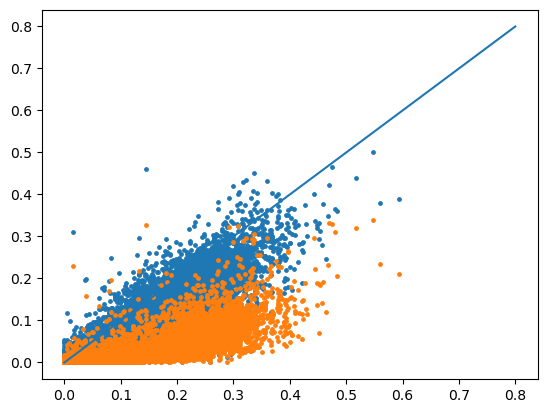

In [3]:
import pickle
data_mi_ki = loadmat(f'grant_figs_and_data/fig_MI_ki_scatter.mat')
data_mi_ki2 = loadmat(f'grant_figs_and_data/fig_MI_ki.mat')

data_mi_ki_by_mi = loadmat(f'grant_figs_and_data/fig_MI_ki_toptfs_by_mi.mat')
data_mi_swap_diff_all = loadmat(f'grant_figs_and_data/MI_swap_diff_all.mat')
data_mi_swap_all = loadmat(f'grant_figs_and_data/MI_swap_vals.mat')

with open("grant_figs_and_data/MI_swap_diff_all.pkl", "rb") as f:
    data_mi_swap_diff_all = pickle.load(f)

with open("grant_figs_and_data/MI_swap_vals.pkl", "rb") as f:
    data_mi_swap_all = pickle.load(f)

data_mi_swap_limb = loadmat(f'grant_figs_and_data/MI_swap_vals_limb.mat')
data_mi_swap_diff_limb = loadmat(f'grant_figs_and_data/MI_swap_diff_limb.mat')
print(data_mi_swap_diff_limb.keys())

mi_no_swap = pd.read_csv('MI_diff_summary_final')
tissues_needed = mi_no_swap['Tissue'].unique()

plt.scatter(data_mi_swap_all['Limb_Muscle']['3m'],data_mi_swap_all['Limb_Muscle']['3m distribution in 24m network'] , s=6)
plt.scatter(data_mi_swap_limb['3m'],data_mi_swap_limb['24m'] , s=6)
plt.plot([0,.8],[0,.8])
print(data_mi_swap_limb['3m network in 24m distribution'].mean(), data_mi_swap_limb['3m distribution in 24m network'].mean())
data_mi_swap_limb['3m'].mean(),  data_mi_swap_all['Thymus'].keys() #, data_mi_swap_diff_all['Thymus'].dtype

In [4]:
data_mi_ki_by_mi

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Jul 28 14:15:16 2025',
 '__version__': '1.0',
 '__globals__': [],
 'MI_3m': array([[1.7198262e-07, 2.6943409e-01, 2.7485409e-01, ..., 1.4531016e-01,
         3.0593252e-01, 1.3411444e-01]], shape=(1, 16394), dtype=float32),
 'MI_24m': array([[-9.9408066e-15,  8.3905585e-02,  5.0172091e-02, ...,
          9.4804866e-03,  8.9398146e-02,  1.5961889e-02]],
       shape=(1, 16394), dtype=float32),
 'MI_ki_top3': array([[-9.9408066e-15,  1.3668522e-01,  6.9749855e-02, ...,
          3.2550965e-02,  1.3986847e-01,  5.5351637e-02]],
       shape=(1, 16394), dtype=float32),
 'MI_ki_top5': array([[-9.9408066e-15,  1.3199550e-01,  1.0841533e-01, ...,
          8.6256154e-02,  1.7879012e-01,  1.1173227e-01]],
       shape=(1, 16394), dtype=float32),
 'MI_ki_top8': array([[-9.9408066e-15,  9.0652972e-02,  1.5912920e-01, ...,
          1.6517499e-01,  1.4054230e-01,  1.8118885e-01]],
       shape=(1, 16394), dtype=float32)}

In [24]:
tissues_filt = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

with open("mean_MI.txt", "w") as f:

    f.write('\\begin{table}[h!]\\n')
    f.write('\\centering \n\\caption{Chosen Regularization Parameter $\\lambda$}\n')
    f.write('\\begin{tabular}{l c c r}\n\\hline\n')
    f.write('Tissue & 3m & 24m & Rejuvinating Network & Rejuvinating Distribution\\ \n \\hline\n')

    for t in tissues_filt:
        #'3m vs 24m', '3m distribution in 24m network', '3m network in 24m distribution'
        # dict_keys(['3m', '24m', '3m distribution in 24m network', '3m network in 24m distribution']))
        mi_3m = data_mi_swap_all[t]['3m']
        mi_24m = data_mi_swap_all[t]['24m']
        mi_3m_24m = data_mi_swap_all[t]['3m distribution in 24m network']
        mi_24m_3m = data_mi_swap_all[t]['3m network in 24m distribution']
        diff = mi_3m_24m - mi_24m 
        diff2 = mi_24m_3m - mi_24m 
        print(diff.mean(), diff2.mean())
        
        f.write(f'{t} & {mi_3m.mean():.2f}, & {mi_24m.mean():.2f} & {mi_3m_24m.mean():.2f} & {mi_24m_3m.mean():.2f} & {diff.mean()} \\\\ \n')

    f.write('\\hline\n\\end{tabular}\n\\label{tab:fruit}\n\\end{table}')

f.close()

0.11730421 0.038835634
0.041986078 0.016139966
0.00526212 0.027102849
0.017968278 -0.00237601
0.13419098 0.00380784
0.07286904 -0.018615881
-0.0019745152 0.013451755
0.013762934 -0.000835749
0.02699696 -0.017115258
0.036098637 -0.031724


In [23]:
import seaborn as sns
tissues_filt = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
# mi_YY[t, g], mi_YO[t, g], mi_OY[t, g]  # arrays: tissue x gene

import numpy as np
from scipy.stats import wilcoxon


perc_improv_net = np.zeros(len(tissues_filt))
perc_improv_dist = np.zeros(len(tissues_filt))
pvals_t = np.zeros(len(tissues_filt))

count = 0
for t in tissues_filt:
    #fig, ax = plt.subplots()
    #'3m vs 24m', '3m distribution in 24m network', '3m network in 24m distribution'
    # dict_keys(['3m', '24m', '3m distribution in 24m network', '3m network in 24m distribution']))
    colors = sns.color_palette("colorblind", 3)
    mi_3m = data_mi_swap_all[t]['3m']
    mi_24m = data_mi_swap_all[t]['24m']
    mi_3m_24m = data_mi_swap_all[t]['3m distribution in 24m network']
    mi_24m_3m = data_mi_swap_all[t]['3m network in 24m distribution']
      
    print(f'{t} & {mi_3m.mean():.3f} & {mi_24m.mean():.3f} & {mi_3m_24m.mean():.3f} & {mi_24m_3m.mean():.4f}\\\\')

    perc_increase_dist = mi_3m_24m/mi_3m
    perc_increase_dist[perc_increase_dist>1]=1

    perc_increase_net = mi_24m_3m/mi_3m
    perc_increase_net[perc_increase_net>1]=1

    d_i = perc_increase_dist - perc_increase_net

    stat, p_two_sided = wilcoxon(d_i)
    p_one_sided = p_two_sided / 2 if d_i.mean() > 0 else 1 - p_two_sided / 2

    # Grab arrays (shape: genes,)
    mi_young = data_mi_swap_all[t]['3m']                               # YY
    mi_old   = data_mi_swap_all[t]['24m']                              # OO (not used in this test)
    mi_OY    = data_mi_swap_all[t]['3m distribution in 24m network']   # OY = young inputs through old/24m network? (double-check naming)
    mi_YO    = data_mi_swap_all[t]['3m network in 24m distribution']   # YO = old inputs through young/3m network? (double-check naming)

    # --- choose ONE of the two contrasts below ---

    # A) Raw difference (recommended for the paired test):
    d_i = mi_YO - mi_OY

    # B) Normalized by a CONSTANT per tissue (optional; keeps units as "fraction of youthful"):
    # denom = np.nanmean(mi_young) + 1e-12
    # d_i = (mi_OY - mi_YO) / denom

    # Clean up NaNs / infs and exact zeros if you used the normalized-by-gene approach (we didn't here)
    mask = np.isfinite(d_i)
    d_i = d_i[mask]

    # If all differences are zero/empty, skip safely
    if d_i.size == 0 or np.all(d_i == 0):
        stat, p_one_sided = np.nan, 1.0
    else:
        # One-sided Wilcoxon: H1 = median(d_i) > 0  (i.e., OY > YO)
        res = wilcoxon(d_i, alternative='greater', zero_method='wilcox')
        stat, p_one_sided = res.statistic, res.pvalue

    pvals_t[count] = p_one_sided

    # For reporting the "% of youthful" (caps are fine here for readability, NOT for the test):
    ratio_in  = mi_OY.mean() / mi_young.mean()
    ratio_grn = mi_YO.mean() / mi_young.mean()
    perc_improv_dist[count] = min(ratio_in, 1.0)
    perc_improv_net[count]  = min(ratio_grn, 1.0)

    count += 1

    '''
    plt.scatter(mi_3m[:4000], mi_24m[:4000], color='grey', label="Unchanged", s=10, zorder=4, alpha=0.6)
    plt.scatter(mi_3m[:4000], mi_3m_24m[:4000], color='pink', label="Rejuvinated Distribution", s=10, alpha=0.7)
    plt.scatter(mi_3m[:4000], mi_24m_3m[:4000], color='cornflowerblue', label="Rejuvinated Network" , s=10, alpha=0.9)

    #stat, pval = wilcoxon(mi_3, mi_24)

    xs = [0, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['3m distribution in 24m network'].max())]
    plt.plot(xs, xs, linestyle='--', color='black', alpha=0.6, linewidth=3)
    #plt.plot([0, 0.6], [0, 0.6])
        
    plt.xlim(0, xs[1]+0.05)
    plt.ylim(0, xs[1]+0.05)

    sns.despine(left=False, bottom=False, top=True, right=True)
    ax.set_xlim([0,xs[1]+0.05])
    ax.set_ylim([0,xs[1]+0.05])

    #plt.xlabel(f'MI 3m',fontsize=28)
    #plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
    #plt.xlabel("MI 3m", fontsize=23)
    #plt.ylabel("MI Swapped", fontsize=23)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    #plt.title(f'{t}', fontsize=32)

    colors = sns.color_palette("colorblind", 3)
    ax.set_aspect('equal', adjustable='box') 
    #plt.tight_layout()
    plt.legend(
        #labels=["Unchanged", "Rejuvinated Network", "Rejuvinated Distribution"],
        fontsize=12,
        markerscale=2.5
    )

    for coll in getattr(ax, "collections", []):  # collections = scatter plots
        coll.set_rasterized(True)

    plt.savefig(f'paper_figs_final/MI_swap_{t}.pdf', dpi=600)
    '''
ratio_in  = perc_improv_dist   # per tissue
ratio_grn = perc_improv_net
d = ratio_in - ratio_grn

# One-sided Wilcoxon: test median(d) > 0
stat, p_two_sided = wilcoxon(d)               # scipy returns two-sided
p_one_sided = p_two_sided/2 if d.mean()>0 else 1 - p_two_sided/2

perc_improv_net, perc_improv_net.mean(), perc_improv_dist, perc_improv_dist.mean()#, p_one_sided, pvals_t

GAT & 0.234 & 0.054 & 0.171 & 0.0925\\
Limb_Muscle & 0.099 & 0.020 & 0.062 & 0.0364\\
Lung & 0.065 & 0.026 & 0.032 & 0.0534\\
Trachea & 0.080 & 0.061 & 0.079 & 0.0587\\
SCAT & 0.256 & 0.095 & 0.229 & 0.0986\\
Pancreas & 0.132 & 0.076 & 0.149 & 0.0574\\
Thymus & 0.066 & 0.051 & 0.049 & 0.0644\\
Tongue & 0.100 & 0.088 & 0.101 & 0.0868\\
Large_Intestine & 0.100 & 0.091 & 0.118 & 0.0737\\
Skin & 0.083 & 0.089 & 0.125 & 0.0573\\


/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/1341481178.py:26: RuntimeWarning: divide by zero encountered in divide
  perc_increase_dist = mi_3m_24m/mi_3m
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/1341481178.py:26: RuntimeWarning: invalid value encountered in divide
  perc_increase_dist = mi_3m_24m/mi_3m
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/1341481178.py:29: RuntimeWarning: divide by zero encountered in divide
  perc_increase_net = mi_24m_3m/mi_3m
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/1341481178.py:29: RuntimeWarning: invalid value encountered in divide
  perc_increase_net = mi_24m_3m/mi_3m
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/1341481178.py:32: RuntimeWarning: invalid value encountered in subtract
  d_i = perc_increase_dist - perc_increase_net


(array([0.39555624, 0.36880764, 0.81612211, 0.73181742, 0.38484064,
        0.43570283, 0.96900415, 0.86608499, 0.73316383, 0.69278324]),
 np.float64(0.6393883109092713),
 array([0.7310431 , 0.63049316, 0.48220152, 0.98532724, 0.89378142,
        1.        , 0.73685586, 1.        , 1.        , 1.        ]),
 np.float64(0.845970231294632))

In [51]:
import numpy as np
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel


def test_input_vs_grn(data_mi_swap_all, young_key='3m',
                      input_key='3m distribution in 24m network',
                      grn_key='3m network in 24m distribution',
                      n_boot=10000, alternative='greater'):
    """
    Compare input rejuvenation vs GRN rejuvenation across tissues.

    Parameters
    ----------
    data_mi_swap_all : dict[tissue -> dict[str -> np.ndarray]]
        Each tissue maps to dicts with MI arrays for each condition.
    young_key : str
        Key for youthful baseline (e.g., '3m').
    input_key : str
        Key for input rejuvenation (old network, young inputs).
    grn_key : str
        Key for GRN rejuvenation (young network, old inputs).
    n_boot : int
        Number of bootstrap resamples for CI.
    alternative : str
        'greater' tests whether input rejuvenation > GRN rejuvenation.

    Returns
    -------
    summary : dict
        {
          'tissues': list,
          'frac_input': np.ndarray,
          'frac_grn': np.ndarray,
          'delta': np.ndarray,
          'p_cross_tissue': float,
          'ci_mean_delta': (low, high)
        }
    """

    tissues, frac_input, frac_grn, delta = [], [], [], []
    ts = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
    # --- per-tissue summaries ---
    for t in ts:
        mi_young = np.asarray(data_mi_swap_all[t][young_key])
        mi_OY = np.asarray(data_mi_swap_all[t][input_key])
        mi_YO = np.asarray(data_mi_swap_all[t][grn_key])

        # avoid nans and zeros
        mask = np.isfinite(mi_young) & np.isfinite(mi_OY) & np.isfinite(mi_YO)
        mi_young, mi_OY, mi_YO = mi_young[mask], mi_OY[mask], mi_YO[mask]

        if mi_young.size == 0:
            continue

        fi = min(np.nanmean(mi_OY) / np.nanmean(mi_young),1)
        fg = min(np.nanmean(mi_YO) / np.nanmean(mi_young),1)
        d  = fi - fg

        tissues.append(t)
        frac_input.append(fi)
        frac_grn.append(fg)
        delta.append(d)

    frac_input = np.array(frac_input)
    frac_grn   = np.array(frac_grn)
    delta      = np.array(delta)

    # --- cross-tissue paired test ---
    res = wilcoxon(delta, alternative=alternative)
    p_cross = res.pvalue

    # --- bootstrap CI for mean delta ---
    boot = [np.mean(np.random.choice(delta, size=len(delta), replace=True))
            for _ in range(n_boot)]
    ci_low, ci_high = np.percentile(boot, [2.5, 97.5])


    # delta is your array of tissue-level differences
    res_t = ttest_rel(frac_input, frac_grn, alternative='greater')


    # --- print summary ---
    print("Tissue-level MI restoration summary")
    print("----------------------------------------------------------")
    print(f"{'Tissue % restored':20s} {'Distribution':>12s} {'GRN':>6s} {'Δ (Input−GRN)':>17s}")
    for t, fi, fg, d in zip(tissues, frac_input, frac_grn, delta):
        print(f"{t:20s} {100*fi:8.1f}  {100*fg:10.1f} {100*d:13.1f}")
    print("----------------------------------------------------------")
    
    print(f"Across tissues: median % restored = {np.median(frac_input):.3f} for TF dist & {np.median(frac_grn):.3f} for GRN")
    print(f"Across tissues: mean % restored = {np.mean(frac_input):.3f} for TF dist & {np.mean(frac_grn):.3f} for GRN")

    print(f"Across tissues: median Δ %restored = {np.median(delta):.3f}, "
          f"mean Δ %restored = {np.mean(delta):.3f}")

    #print(f"95% bootstrap CI for mean Δ: [{ci_low:.3f}, {ci_high:.3f}]")
    print(f"Wilcoxon signed-rank, one-sided pval = {p_cross:.4g}")
    print(f"Paired t-test: statistic = {res_t.statistic:.3f}, p = {res_t.pvalue:.4f}")


    return {
        'tissues': tissues,
        'frac_input': frac_input,
        'frac_grn': frac_grn,
        'delta': delta,
        'p_cross_tissue': p_cross,
        'ci_mean_delta': (ci_low, ci_high)
    }

results = test_input_vs_grn(data_mi_swap_all)

Tissue-level MI restoration summary
----------------------------------------------------------
Tissue % restored    Distribution    GRN     Δ (Input−GRN)
GAT                      73.1        39.6          33.5
Limb_Muscle              63.0        36.9          26.2
Lung                     48.2        81.6         -33.4
Trachea                  98.5        73.2          25.4
SCAT                     89.4        38.5          50.9
Pancreas                100.0        43.6          56.4
Thymus                   73.7        96.9         -23.2
Tongue                  100.0        86.6          13.4
Large_Intestine         100.0        73.3          26.7
Skin                    100.0        69.3          30.7
----------------------------------------------------------
Across tissues: median % restored = 0.940 for TF dist & 0.712 for GRN
Across tissues: mean % restored = 0.846 for TF dist & 0.639 for GRN
Across tissues: median Δ %restored = 0.264, mean Δ %restored = 0.207
Wilcoxon signed-rank

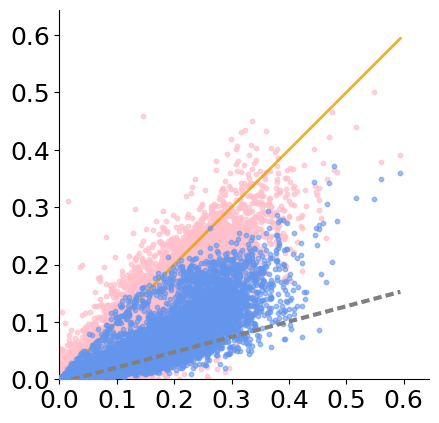

In [8]:
import seaborn as sns
fig, ax = plt.subplots()

colors = sns.color_palette("colorblind", 3)
mi_3m = data_mi_swap_limb['3m'][:2000]


mi_24m = data_mi_swap_limb['24m'][:2000]


mi_3m_24m = data_mi_swap_limb['3m distribution in 24m network'][:2000]


mi_24m_3m = data_mi_swap_limb['3m network in 24m distribution'][:2000]
m, b = np.polyfit(mi_3m[0], mi_24m[0], 1)
xs = [0, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['3m distribution in 24m network'].max())]
ys = m*np.array(xs) + b

#plt.scatter(mi_3m, mi_24m, color='grey', s=10, zorder=4, alpha=0.6)
plt.scatter(mi_3m, mi_3m_24m, color='pink', label='3m distribution in 24m network', s=10, alpha=0.7)
plt.scatter(mi_3m, mi_24m_3m, color='cornflowerblue', label='3m network in 24m distribution' , zorder=4, s=10, alpha=0.6)
#stat, pval = wilcoxon(mi_3, mi_24)

plt.plot(xs, ys, linestyle='--',  dashes=(2,1), color='grey', alpha=1, linewidth=3, zorder=5,label='Baseline Trend')
plt.plot(xs, xs, linestyle='-', color='#E69F00', alpha=0.8, linewidth=2, zorder=1)

#plt.plot([0, 0.6], [0, 0.6])
    
plt.xlim(0, xs[1]+0.05)
plt.ylim(0, xs[1]+0.05)

sns.despine(left=False, bottom=False, top=True, right=True)
ax.set_xlim([0,xs[1]+0.05])
ax.set_ylim([0,xs[1]+0.05])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
#plt.xlabel("MI 3m", fontsize=23)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
ax.set_aspect('equal', adjustable='box') 

#plt.tight_layout()
#plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
#    fontsize=12,
#    loc='lower right'
#)
for coll in getattr(ax, "collections", []):  # collections = scatter plots
        coll.set_rasterized(True)
plt.savefig('paper_figs_final/Limb_Muscle_MI_swap.pdf', dpi=600)


In [63]:
data_mi_ki.keys(), data_mi_swap.keys(), data_mi_swap_diff_limb.keys(), data_mi_ki_by_mi.keys()


(dict_keys(['__header__', '__version__', '__globals__', 'MI_3m', 'MI_24m', 'MI_ki_top3', 'MI_ki_top5', 'MI_ki_top8']),
 dict_keys(['__header__', '__version__', '__globals__', '3m', '24m', '3m distribution in 24m network', '3m network in 24m distribution']),
 dict_keys(['__header__', '__version__', '__globals__', '3m vs 24m', '3m distribution in 24m network', '3m network in 24m distribution']),
 dict_keys(['__header__', '__version__', '__globals__', 'MI_3m', 'MI_24m', 'MI_ki_top3', 'MI_ki_top5', 'MI_ki_top8']))

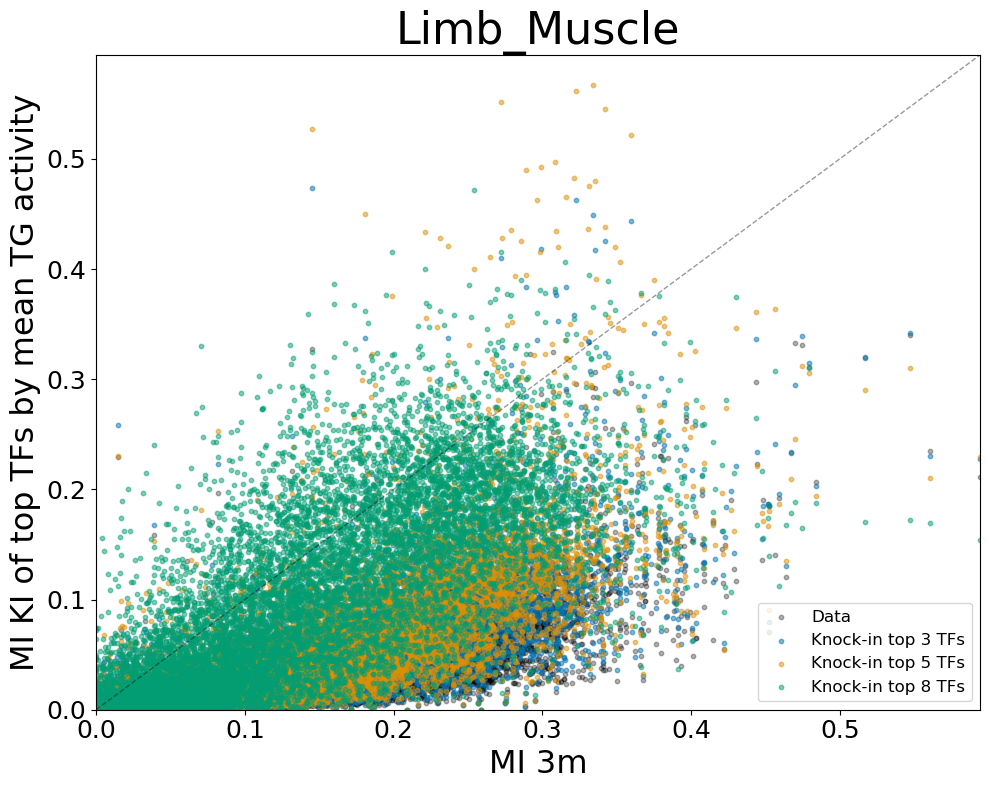

In [94]:
import seaborn as sns
plt.figure(figsize=(10,8))

colors = sns.color_palette("colorblind", 3)

plt.scatter(data_mi_ki['MI_3m'], data_mi_ki['MI_24m'], color='black', label='Data', s=10, alpha = 0.3)
plt.scatter(data_mi_ki['MI_3m'], data_mi_ki['MI_ki_top3'], color=colors[0], label='Knock-in top 3 TFs', s=10, alpha = 0.5)
plt.scatter(data_mi_ki['MI_3m'], data_mi_ki['MI_ki_top5'], color=colors[1], label='Knock-in top 5 TFs', s=10, alpha=0.5)
plt.scatter(data_mi_ki['MI_3m'], data_mi_ki['MI_ki_top8'], color=colors[2], label='Knock-in top 8 TFs' , s=10, alpha=0.5)

#stat, pval = wilcoxon(mi_3, mi_24)

xs = [0, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['3m distribution in 24m network'].max())]
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.4, linewidth=1)
#plt.plot([0, 0.6], [0, 0.6])
    
plt.xlim(0, xs[1])
plt.ylim(0, xs[1])
#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
plt.xlabel("MI 3m", fontsize=23)
plt.ylabel("MI KI of top TFs by mean TG activity", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(f'{t}', fontsize=32)
plt.tight_layout()
plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
    fontsize=12,
    loc='lower right'
)

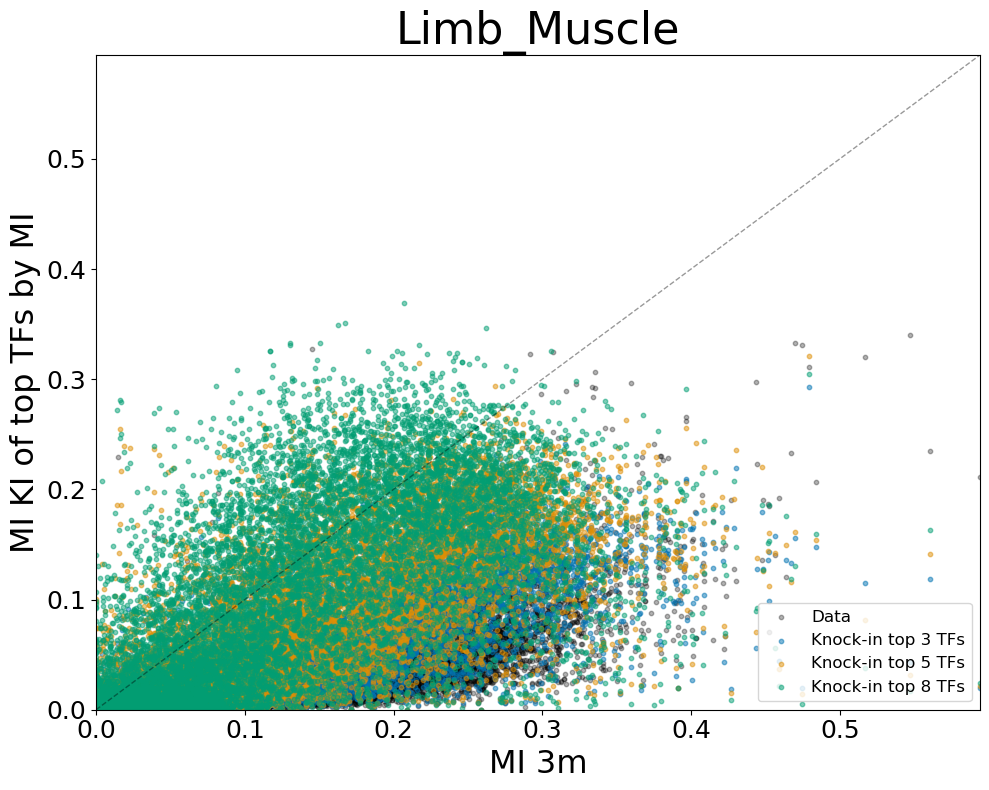

In [66]:
import seaborn as sns
plt.figure(figsize=(10,8))

colors = sns.color_palette("colorblind", 3)

plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_24m'], color='black', label='Data', s=10, alpha = 0.3)
plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_ki_top3'], color=colors[0], label='Knock-in top 3 TFs', s=10, alpha = 0.5)
plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_ki_top5'], color=colors[1], label='Knock-in top 5 TFs', s=10, alpha=0.5)
plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_ki_top8'], color=colors[2], label='Knock-in top 8 TFs' , s=10, alpha=0.5)

#stat, pval = wilcoxon(mi_3, mi_24)

xs = [0, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['3m distribution in 24m network'].max())]
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.4, linewidth=1)
#plt.plot([0, 0.6], [0, 0.6])
    
plt.xlim(0, xs[1])
plt.ylim(0, xs[1])
#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
plt.xlabel("MI 3m", fontsize=23)
plt.ylabel("MI KI of top TFs by MI", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(f'{t}', fontsize=32)
plt.tight_layout()
plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
    fontsize=12,
    loc='lower right'
)

<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:30: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
/tmp/tmp.TcJ1TL7MRL/ipykernel_2772503/2960137757.py:29: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$MI KI by MI", fontsize=23)
/tmp/tmp.TcJ1TL7MRL/ipykernel_2772503/2960137757.py:30: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta$MI KI by TG act", fontsize=23)
/tmp/tmp.TcJ1TL7MRL/ipykernel_2772503/2960137757.py:33: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f"$\Delta$MI (3m-KI)", fontsize=32)


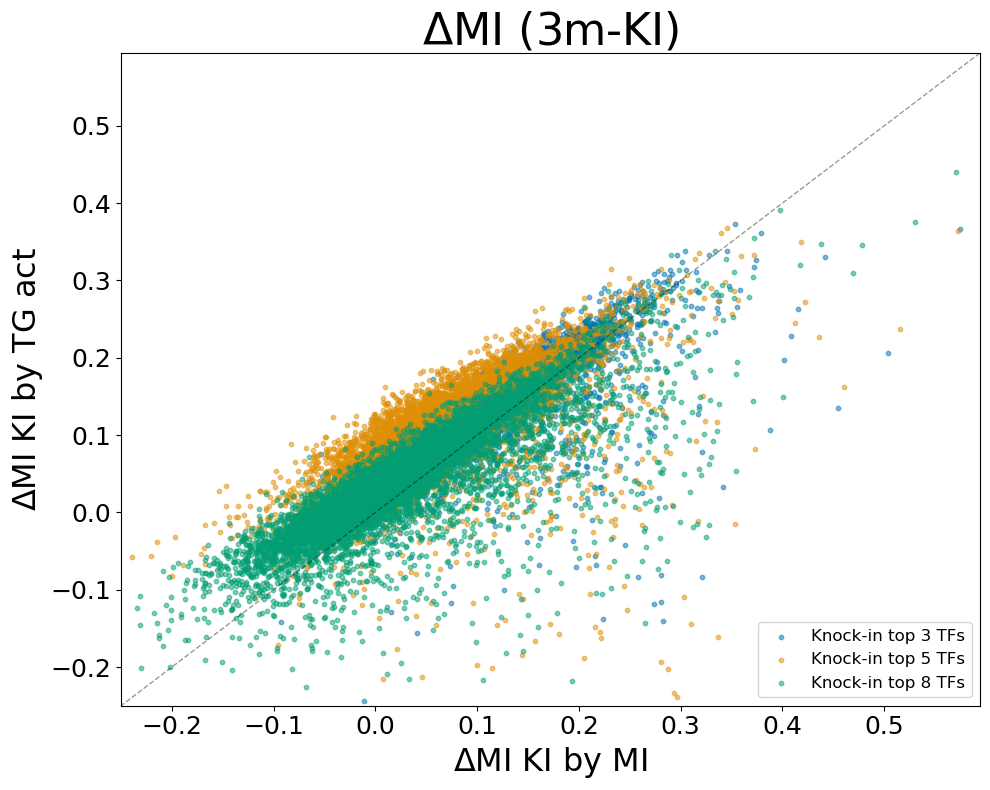

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))

colors = sns.color_palette("colorblind", 3)
#plt.axhline(0, c='black', zorder=2, alpha = 0.5)
#plt.axvline(0, c='black', zorder=2, alpha = 0.5)
#plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_24m'], color='black', label='Data', s=10, alpha = 0.3)
#plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_ki_top3'], color=colors[0], label='Knock-in top 3 TFs', s=10, alpha = 0.5)
plt.scatter(data_mi_ki_by_mi['MI_3m']-data_mi_ki_by_mi['MI_ki_top3'], data_mi_ki_by_mi['MI_3m']-data_mi_ki['MI_ki_top3'], 
            color=colors[0], label='Knock-in top 3 TFs', s=10, alpha = 0.5)
plt.scatter(data_mi_ki_by_mi['MI_3m']-data_mi_ki_by_mi['MI_ki_top5'], data_mi_ki_by_mi['MI_3m']-data_mi_ki['MI_ki_top5'], 
            color=colors[1], label='Knock-in top 5 TFs', s=10, alpha = 0.5)
plt.scatter(data_mi_ki_by_mi['MI_3m']-data_mi_ki_by_mi['MI_ki_top8'], data_mi_ki_by_mi['MI_3m']-data_mi_ki['MI_ki_top8'], 
            color=colors[2], label='Knock-in top 8 TFs', s=10, alpha = 0.5)
#plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_ki_top5'], color=colors[1], label='Knock-in top 5 TFs', s=10, alpha=0.5)
#plt.scatter(data_mi_ki_by_mi['MI_3m'], data_mi_ki_by_mi['MI_ki_top8'], color=colors[2], label='Knock-in top 8 TFs' , s=10, alpha=0.5)

#stat, pval = wilcoxon(mi_3, mi_24)

xs = [-1, max(data_mi_swap_limb['3m'].max(), data_mi_swap_limb['3m distribution in 24m network'].max())]
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.4, linewidth=1)
#plt.plot([0, 0.6], [0, 0.6])

plt.xlim(-.25, xs[1])
plt.ylim(-.25, xs[1])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
plt.xlabel("$\Delta$MI KI by MI", fontsize=23)
plt.ylabel("$\Delta$MI KI by TG act", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(f"$\Delta$MI (3m-KI)", fontsize=32)
plt.tight_layout()
plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
    fontsize=12,
    loc='lower right'
)  

In [13]:
age=3
t ='Limb_Muscle'
gene_data3 = np.load(f'data/{t}_tg_data_binary_{age}m_filt.npy')
tf_data3 = np.load(f'data/{t}_tf_data_binary_{age}m_filt.npy')
nG, nC = gene_data3.shape

age = 18 
gene_data18 = np.load(f'data/{t}_tg_data_binary_{age}m_filt.npy')
tf_data18 = np.load(f'data/{t}_tf_data_binary_{age}m_filt.npy')

age = 24
gene_data24 = np.load(f'data/{t}_tg_data_binary_{age}m_filt.npy')
tf_data24 = np.load(f'data/{t}_tf_data_binary_{age}m_filt.npy')

L1 = np.load(f'ki_mean/L1_ki_MI_{t}.npy')
diff = tf_data3.mean(axis=1) - tf_data24.mean(axis=1)

L1.shape, diff.shape

((849,), (849,))

((1, 16394), np.float64(0.09665253180708262), np.float32(0.47175735))

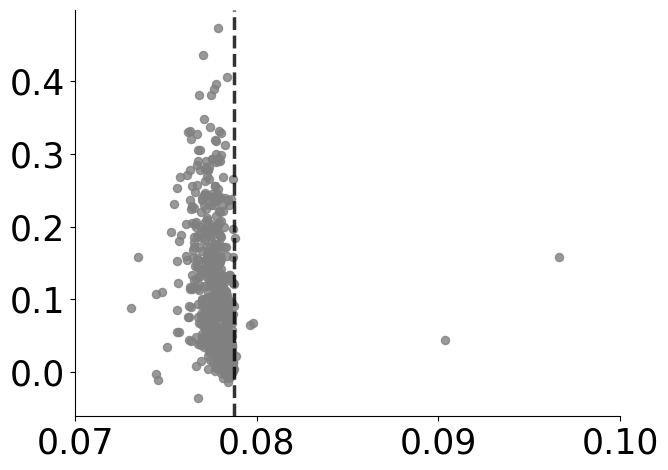

In [76]:
fig, ax = plt.subplots()

plt.scatter(L1/nG, diff, s=34, c='grey', alpha=0.8)
L1_data = np.sum(np.abs(data_mi_ki['MI_3m']-data_mi_ki['MI_24m']))
L1_combo = np.sum(np.abs(data_mi_ki['MI_3m']-data_mi_ki_by_mi['MI_ki_top8']))
L1_combo5 = np.sum(np.abs(data_mi_ki['MI_3m']-data_mi_ki_by_mi['MI_ki_top5']))
ax.axvline(L1_data/nG, c='black', label='L1 data', alpha=0.8, ls='--', linewidth=2.5)
#plt.axvline(L1_combo/nG, c='red', label='L1 KI top 8')
#plt.axvline(L1_combo5/nG, c='blue', label='L1 KI top 5')
#plt.xlabel('Average Difference in MI for TGs', fontsize=28)
#plt.ylabel('Difference in TF activity', fontsize=28)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
xs = [0.07, 0.08, 0.09, 0.1]
#plt.title(f"L1 MI (3m-KI)", fontsize=32)
plt.tight_layout()
sns.despine(left=False, bottom=False)
ax.set_xticks(xs)
ax.set_aspect('auto')#.06, adjustable='datalim') 

plt.savefig('grant_figs_and_data/L1_MI_vs_TF_diff2.pdf', dpi=600)
#plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
#    fontsize=16
#)  
data_mi_ki['MI_3m'].shape, (L1/nG).max(), diff.max()

[135 134   2 146 202 691 623  90] ['Ebf2' 'Ebf1' 'Aebp1' 'Elf3' 'Foxq1' 'Tcf7l1' 'Snai1' 'Creb5']
[ 0.00310533  0.00300958 -0.01097621  0.00362976  0.0067351   0.15831311
  0.12003706  0.00181488] [0.83981154 0.8409894  0.99646643 0.82685512 0.76089517 0.18492344
 0.26501767 0.89281508] ['Ebf2' 'Ebf1' 'Aebp1' 'Elf3' 'Foxq1' 'Tcf7l1' 'Snai1' 'Creb5']


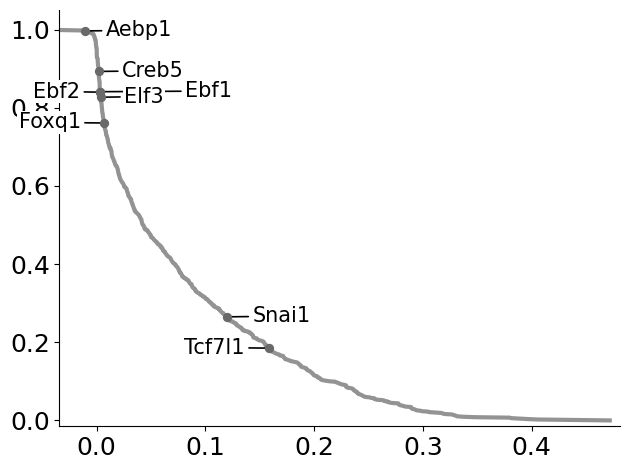

NameError: name 'texts' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as pe

# --- Prepare Data ---
sorted_data_dense = np.sort(diff)
ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

TF_names = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)

# --- Plot Setup ---
fig, ax = plt.subplots()

# Plot CCDF curve
ax.plot(sorted_data_dense, ccdf_dense, c='grey', lw=3, alpha=0.85, label='KI')

# Scatter for lowest 8 points
lowest_idx = np.argsort(L1)[:8]
ax.scatter(sorted_data_dense[lowest_idx], ccdf_dense[lowest_idx],
           s=30, c='dimgrey', edgecolor='dimgrey', linewidth=1.2, zorder=5)

test = [(0.08092224585836727, 0.8338661730887879, 'Ebf2'),
 (0.07830887627664393, 0.8736889337596051, 'Ebf1'),
 (0.07360563328610983, 1.0220090863200402, 'Aebp1'),
 (0.0761947238899916, 0.8001009591115597, 'Elf3'),
 (0.0792049110152264, 0.7579224858376802, 'Foxq1'),
 (0.08014745499220062, ccdf_dense[lowest_idx[5]]-0.01, 'Tcf7l1'),
 (0.08000683640321124, 0.297717202310842, 'Snai1'),
 (0.0791359304010507, 0.9552414605418139, 'Creb5')]
# --- Label points ---

print(lowest_idx, TF_names[lowest_idx])
'''
texts = []
for idx in lowest_idx:
    texts.append(ax.text(
        sorted_data_dense[idx], ccdf_dense[idx], TF_names[idx],
        fontsize=13, color='darkblue', weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
        zorder=4
    ))
'''

x = sorted_data_dense[lowest_idx]
y = ccdf_dense[lowest_idx]
label = TF_names[lowest_idx]

xtexts = [ 0.00310533-0.04,  0.00300958+0.1, -0.01097621+0.05,  0.00362976+.04,  0.0067351-0.05,   0.15831311-0.05,
  0.12003706+0.05,  0.00181488+0.05]
ytexts = [0.83981154-0.024, 0.8409894-0.024,  0.99646643-0.024, 0.82685512-0.024 ,0.76089517-0.024 ,0.18492344-0.024,
 0.26501767-0.024, 0.89281508-0.024] 
labels = ['Ebf2', 'Ebf1' ,'Aebp1' ,'Elf3' ,'Foxq1', 'Tcf7l1' ,'Snai1' ,'Creb5']

print(x, y, label)

i=0
for idx in lowest_idx:
    x = sorted_data_dense[idx]
    y = ccdf_dense[idx]
    label = TF_names[idx]

    # Example: move label straight up by 0.05
    x_text = xtexts[i]
    y_text = ytexts[i]

    i+=1

    ax.annotate(
        label,
        xy=(x, y),                # point
        xytext=(x_text, y_text),  # label position
        fontsize=15,
        color='black',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=1),
        arrowprops=dict(arrowstyle='-', color='black', lw=1.2),
        ha='center',              # horizontal alignment
        va='bottom',              # vertical alignment
    )
# --- Style & Axes ---
ax.set_xlim(sorted_data_dense.min() * 0.98, sorted_data_dense.max() * 1.02)
ax.set_ylim(-0.015, 1.05)
ax.tick_params(labelsize=18)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.savefig('paper_figs_final/labeled_top8_tfs.pdf', dpi=300)
plt.show()
texts

sum is -0.023856741605160426
[135 134   2 146 202] ['E2f6' 'E2f5' 'Aebp1' 'Egr3' 'Foxo4']
[0.07309537 0.07348026 0.07443292 0.07444063 0.07456075] [0.99882214 0.99764429 0.99646643 0.99528857 0.99411072] ['E2f6' 'E2f5' 'Aebp1' 'Egr3' 'Foxo4']
0 E2f6 0.07171947 0.87
1 E2f5 0.07348025960574371 0.77
2 Aebp1 0.0755 0.67
3 Egr3 0.07753292 0.97246643
4 Foxo4 0.08076572 0.77285512
[0.07309537 0.07348026 0.07443292 0.07444063 0.07456075] Foxo4 0.09665253180708262 [0.01060071 0.00942285 0.00824499 0.00706714 0.00588928 0.00471143
 0.00353357 0.00235571 0.00117786 0.        ]


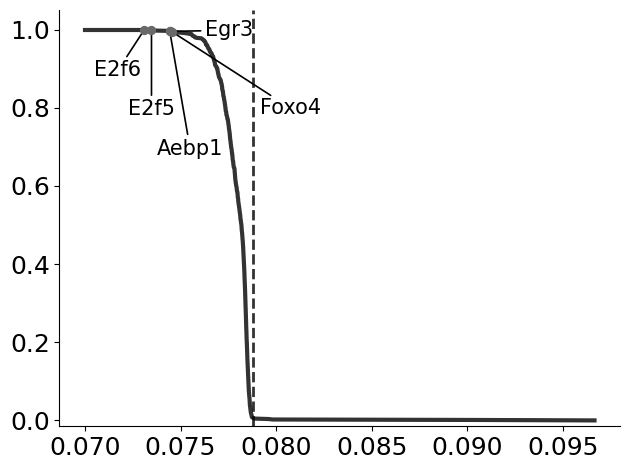

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as pe

# --- Prepare Data ---
sorted_data_dense = np.sort(L1/nG)
ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

TF_names = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)

# --- Plot Setup ---
fig, ax = plt.subplots()
L1_data = np.sum(np.abs(data_mi_ki['MI_3m'] - data_mi_ki['MI_24m']))
ax.axvline(L1_data/nG, c='black', label='L1 data', alpha=0.8, ls='--', linewidth=2)

# Plot CCDF curve
ax.plot(sorted_data_dense, ccdf_dense, c='black', lw=3, alpha=0.8, label='KI')
ax.plot([.07, sorted_data_dense[0]], [1,1], c='black', lw=3, alpha=0.8, label='KI')

# Scatter for lowest 8 points
lowest_idx = np.argsort(L1)[:5]
#ax.axvline((np.sum(L1[lowest_idx]-L1_data)+L1_data)/nG, c='red', label='L1 sum', alpha=0.8, ls='--', linewidth=2)
print('sum is', np.sum(L1[lowest_idx]-L1_data)/nG)
ax.scatter(sorted_data_dense[:5], ccdf_dense[:5],
           s=30, c='dimgrey', edgecolor='dimgrey', linewidth=1.2, zorder=5)

test = [(0.08092224585836727, 0.8338661730887879, 'Ebf2'),
 (0.07830887627664393, 0.8736889337596051, 'Ebf1'),
 (0.07360563328610983, 1.0220090863200402, 'Aebp1'),
 (0.0761947238899916, 0.8001009591115597, 'Elf3'),
 (0.0792049110152264, 0.7579224858376802, 'Foxq1'),
 #(0.08014745499220062, ccdf_dense[lowest_idx[5]]-0.01, 'Tcf7l1'),
 #(0.08000683640321124, 0.297717202310842, 'Snai1'),
 #(0.0791359304010507, 0.9552414605418139, 'Creb5')
 ]
# --- Label points ---

print(lowest_idx, TF_names[lowest_idx])
'''
texts = []
for idx in lowest_idx:
    texts.append(ax.text(
        sorted_data_dense[idx], ccdf_dense[idx], TF_names[idx],
        fontsize=13, color='darkblue', weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
        zorder=4
    ))
'''

x = sorted_data_dense[:5]#lowest_idx]
y = ccdf_dense[:5]#lowest_idx]
label = TF_names[lowest_idx]

xtexts = [0.07721947-.0055, x[1], 0.0755, 0.07753292, 0.08076572] 
ytexts = [0.87, 0.77, 0.67, 0.97246643 ,0.77285512] 
labels = ['Ebf2', 'Ebf1' ,'Aebp1' ,'Elf3' ,'Foxq1', 'Tcf7l1' ,'Snai1' ,'Creb5']

print(x, y, label)

i=0

for idx in lowest_idx:
    x = sorted_data_dense[i]
    y = ccdf_dense[i]
    label = TF_names[idx]
    # Example: move label straight up by 0.05
    x_text = xtexts[i]
    y_text = ytexts[i]
    print(i, label, x_text, y_text)
    i+=1

    ax.annotate(
        label,
        xy=(x, y),                # point
        xytext=(x_text, y_text),  # label position
        fontsize=15,
        color='black',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=1),
        arrowprops=dict(arrowstyle='-', color='black', lw=1.2),
        ha='center',              # horizontal alignment
        va='bottom',
        zorder = 5-i
    )
    
# --- Style & Axes ---
#ax.set_xlim(sorted_data_dense.min() * 0.98, sorted_data_dense.max() * 1.02)
ax.set_ylim(-0.015, 1.05)
#ax.set_xlim(0.0726, 0.076)

#ax.set_xticks([0.07, 0.08, 0.09, 0.10])
ax.tick_params(labelsize=18)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.savefig('paper_figs_final/labeled_top5_tfs.pdf', dpi=300)
print((L1/nG)[lowest_idx], label, sorted_data_dense[-1], ccdf_dense[-10:])

plt.show()


In [79]:
for idx in lowest_idx:
    x = sorted_data_dense[idx]
    y = ccdf_dense[idx]
    label = TF_names[idx]

    # Example: move label straight up by 0.05
    x_text = x
    y_text = y + 0.05

    ax.annotate(
        label,
        xy=(x, y),                # point
        xytext=(x_text, y_text),  # label position
        fontsize=13,
        color='darkblue',
        weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
        arrowprops=dict(arrowstyle='-', color='black', lw=1.2),
        ha='center',              # horizontal alignment
        va='bottom',              # vertical alignment
    )

NameError: name 'data_mi_ki' is not defined

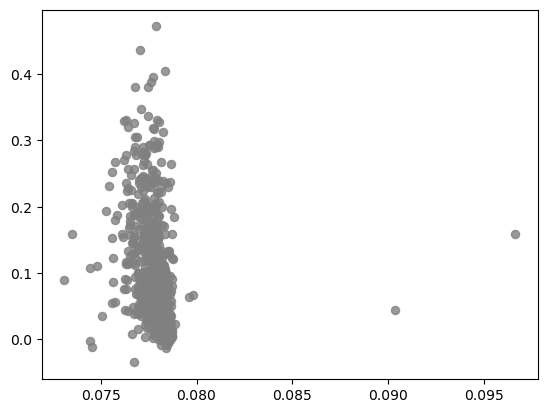

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # pip install adjustText

TF_names = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)

fig, ax = plt.subplots()

# Scatter plot
ax.scatter(L1/nG, diff, s=34, c='grey', alpha=0.8)


# Vertical line
L1_data = np.sum(np.abs(data_mi_ki['MI_3m'] - data_mi_ki['MI_24m']))
ax.axvline(L1_data/nG, c='black', label='L1 data', alpha=0.8, ls='--', linewidth=2.5)

# Tick styling
ax.set_xticks([0.07, 0.08, 0.09, 0.1])
ax.tick_params(labelsize=20)
sns.despine(left=False, bottom=False)
plt.tight_layout()

# ---- Label the lowest 8 L1 ----
lowest_idx = np.argsort(L1)[:5]          # indices of the 8 lowest L1
ax.scatter(L1[lowest_idx]/nG, diff[lowest_idx],
           s=70, c='royalblue', edgecolor='black', zorder=3)
'''
texts = []
for idx in lowest_idx:
    texts.append(a
        ax.text(
            L1[idx]/nG, diff[idx], TF_names[idx],
            fontsize=14, color='darkblue', weight='bold', zorder=4
        )
    )

adjust_text(
    texts, ax=ax,
    arrowprops=dict(arrowstyle='-', color='black', lw=0.5, zorder=5)
)
'''
texts = []
for idx in lowest_idx:
    texts.append(
        ax.text(
            L1[idx]/nG, diff[idx], TF_names[idx],
            fontsize=14, color='darkblue', weight='bold'
        )
    )

# Automatically adjust text to avoid overlap and add small arrows
adjust_text(
    texts, ax=ax, min_arrow_len=195,
    arrowprops=dict(arrowstyle='-', color='black', lw=5)
)

plt.show()

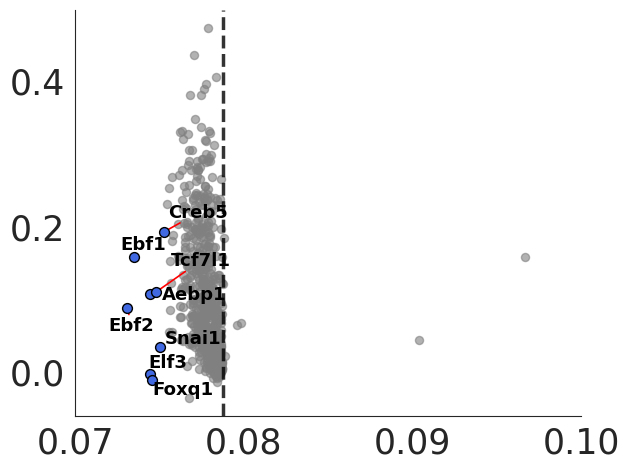

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # pip install adjustText

# --- Example setup (use your actual data) ---
# L1 = np.array([...])       # your L1 values
# diff = np.array([...])     # your diff values
# TF_names = [...]           # list of TF names
# nG = ...                   # your normalization constant
# data_mi_ki = {...}         # your MI data dictionary

fig, ax = plt.subplots()
sns.set_style("white")
sns.despine()

# Scatter plot (all points in light grey)
ax.scatter(L1/nG, diff, s=34, c='grey', alpha=0.6, zorder=1)

# Vertical reference line
L1_data = np.sum(np.abs(data_mi_ki['MI_3m'] - data_mi_ki['MI_24m']))
ax.axvline(L1_data/nG, c='black', label='L1 data', alpha=0.8, ls='--', linewidth=2.5)

# Highlight the lowest 8 L1 points
lowest_idx = np.argsort(L1)[:8]
ax.scatter(L1[lowest_idx]/nG, diff[lowest_idx],
           s=50, c='royalblue', edgecolor='black', zorder=3)

# Label the lowest 8 points
'''
texts = []
for idx in lowest_idx:
    texts.append(
        ax.text(
            L1[idx]/nG, diff[idx], TF_names[idx],
            fontsize=14, color='red', weight='bold'
        )
    )
    '''
texts2=[]
for idx in lowest_idx:
    texts2.append(
        ax.text(
            L1[idx]/nG, diff[idx], TF_names[idx],
            fontsize=13, color='black', weight='bold'
        )
    )

# Automatically adjust text to avoid overlap and add small arrows
'''
adjust_text(
    texts, ax=ax,force_text = (0.5,0.5),
    arrowprops=dict(arrowstyle='-', color='red', lw=1.2, zorder=2)
)
'''
a = adjust_text(
    texts2, ax=ax,force_text = (0.3,0.7),
    arrowprops=dict(arrowstyle='-', color='red', lw=1.2, zorder=2)
)

# Axis labels and styling
#ax.set_xlabel("Normalized L1", fontsize=20, weight='bold')
#ax.set_ylabel("Difference", fontsize=20, weight='bold')
ax.tick_params(labelsize=18)
ax.set_xticks([0.07, 0.08, 0.09, 0.10])
ax.set_aspect('auto')
ax.tick_params(labelsize=25)

plt.tight_layout()
plt.savefig(f'grant_figs_and_data/scatter_L1_mi_v_diff_labeled.pdf', dpi=600)

plt.show()

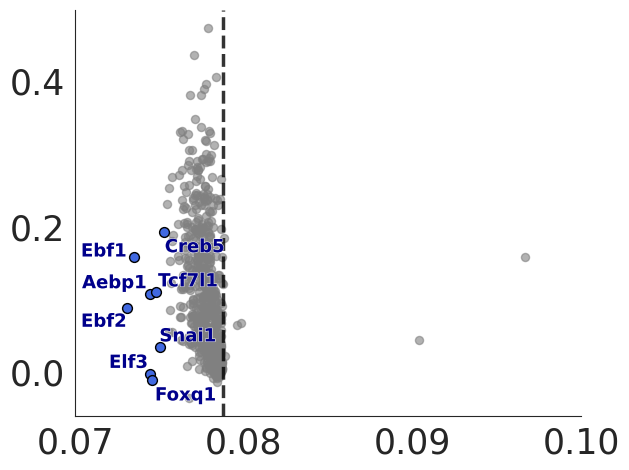

[Text(0.07035005466622396, 0.0626067311702172, 'Ebf2'),
 Text(0.07034840998723212, 0.158997581501802, 'Ebf1'),
 Text(0.0704122765242861, 0.11549916699528691, 'Aebp1'),
 Text(0.07201163054512948, 0.006199399987847, 'Elf3'),
 Text(0.0747366419767604, -0.03847100067138672, 'Foxq1'),
 Text(0.07492, 0.118, 'Tcf7l1'),
 Text(0.07499746281266179, 0.04252991936604181, 'Snai1'),
 Text(0.07531562081323136, 0.16487947613100204, 'Creb5')]

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  # pip install adjustText
import matplotlib.patheffects as pe

# --- Example setup (use your actual data) ---
# L1 = np.array([...])       # your L1 values
# diff = np.array([...])     # your diff values
# TF_names = [...]           # list of TF names
# nG = ...                   # your normalization constant
# data_mi_ki = {...}         # your MI data dictionary

fig, ax = plt.subplots()
sns.set_style("white")
sns.despine()

# Scatter plot (all points in light grey)
ax.scatter(L1/nG, diff, s=34, c='grey', alpha=0.6, zorder=1)

# Vertical reference line
L1_data = np.sum(np.abs(data_mi_ki['MI_3m'] - data_mi_ki['MI_24m']))
ax.axvline(L1_data/nG, c='black', label='L1 data', alpha=0.8, ls='--', linewidth=2.5)

# Highlight the lowest 8 L1 points
lowest_idx = np.argsort(L1)[:8]
ax.scatter(L1[lowest_idx]/nG, diff[lowest_idx],
           s=50, c='royalblue', edgecolor='black', zorder=3)


# Label the lowest 8 points
'''
texts = []
for idx in lowest_idx:
    texts.append(
        ax.text(
            L1[idx]/nG, diff[idx], TF_names[idx],
            fontsize=14, color='red', weight='bold'
        )
    )
    '''
test = [(0.07035005466622396, 0.062606731170217195, 'Ebf2'),
  (0.07034840998723211, 0.158997581501802, 'Ebf1'),
  (0.0704122765242861, 0.11549916699528691, 'Aebp1'),
    (0.07201163054512947, 0.006199399987847, 'Elf3'),
  (0.0747366419767604, -0.03847100067138672, 'Foxq1'),
  (0.07492, 0.118, 'Tcf7l1'),
  (0.07499746281266179, 0.04252991936604181, 'Snai1'),
  (0.07531562081323136, 0.16487947613100204, 'Creb5')]

texts=[]
i=0
for idx in lowest_idx:
    texts.append(
        ax.text(
            test[i][0], test[i][1], test[i][2],
            fontsize=13, color='darkblue', weight='bold',path_effects=[pe.withStroke(linewidth=1, foreground='white', alpha=0.7)]
        )
    )
    i+=1
'''
i = 0
for idx in lowest_idx:
    ax.annotate(
        test[i][2],                             # TF name
        xy=(L1[idx]/nG, diff[idx]),             # point to annotate (arrow tip)
        xytext=(test[i][0], test[i][1]),        # manual text position
        fontsize=13, color='black', weight='bold',
        arrowprops=dict(
    arrowstyle='->',
    color='black',
    lw=0.8,
    shrinkA=1, shrinkB=3
)
    )
    i += 1
'''
#bels and styling
#ax.set_xlabel("Normalized L1", fontsize=20, weight='bold')
#ax.set_ylabel("Difference", fontsize=20, weight='bold')
ax.tick_params(labelsize=18)
ax.set_xticks([0.07, 0.08, 0.09, 0.10])
ax.set_aspect('auto')
ax.tick_params(labelsize=25)

plt.tight_layout()
plt.savefig(f'grant_figs_and_data/scatter_L1_mi_v_diff_labeled.pdf', dpi=600)

plt.show()
texts

# Now make those dot plot with all tissues

In [84]:
def bootstrap_ci(x, n_boot=1000, ci=95):
    means = np.array([np.mean(np.random.choice(x, size=len(x), replace=True)) for _ in range(n_boot)])
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(x), lower, upper

data_mi_swap_diff_all['Limb_Muscle'], tissues_needed

({'3m vs 24m': array([1.7198263e-07, 1.8552852e-01, 2.2468200e-01, ..., 1.3582967e-01,
         2.1653438e-01, 1.1815256e-01], shape=(16394,), dtype=float32),
  '3m distribution in 24m network': array([-5.6843419e-14,  6.3066453e-02,  1.0384430e-01, ...,
          7.3111117e-02,  6.5380067e-02,  3.5715155e-02],
        shape=(16394,), dtype=float32),
  '3m network in 24m distribution': array([1.71982620e-07, 1.70169413e-01, 1.96557537e-01, ...,
         1.12154186e-01, 1.70099333e-01, 9.29386020e-02],
        shape=(16394,), dtype=float32)},
 array(['Thymus', 'Brain_Non-Myeloid', 'Limb_Muscle', 'Skin', 'Pancreas',
        'Diaphragm', 'Trachea', 'Tongue', 'Bladder', 'Large_Intestine',
        'GAT', 'MAT', 'SCAT', 'Lung'], dtype=object))

In [85]:
all_diffs = []
tissues_needed = np.load(f'tissue_order_by_MI_prop.npy', allow_pickle=True)

all_labels = []
all_tissues = []
count=0
print(type(tissues_needed))
for tissue in data_mi_swap_diff_all.keys():
    if not np.any(tissues_needed == tissue):
        print(f'{tissue} not in the needed ones')
        continue
    print(tissue)
    arr = data_mi_swap_diff_all[tissue]
    #print(arr.dtype.names)
    count+=1
    for field in arr.keys():
        #print(arr[field][0])
        values = arr[field].flatten()
        all_diffs.append(values)
        all_labels += [field] * len(values)
        all_tissues += [tissue] * len(values)

df_mi = pd.DataFrame({
    'Tissue': all_tissues,
    'Type': all_labels,
    'MI_diff': np.concatenate(all_diffs)
})
df_mi['Tissue'].unique(), np.mean(df_mi[(df_mi['Tissue']=='GAT') & (df_mi['Type'] == '3m distribution in 24m network')]['MI_diff']>0)

<class 'numpy.ndarray'>
Thymus
Brain_Non-Myeloid not in the needed ones
Limb_Muscle
Skin
Pancreas
Diaphragm not in the needed ones
Trachea
Tongue
Bladder not in the needed ones
Large_Intestine
GAT
MAT not in the needed ones
SCAT
Lung


(array(['Thymus', 'Limb_Muscle', 'Skin', 'Pancreas', 'Trachea', 'Tongue',
        'Large_Intestine', 'GAT', 'SCAT', 'Lung'], dtype=object),
 np.float64(0.8941417691857059))

In [86]:
tissue_order = np.load(f'tissue_order_by_MI_prop.npy', allow_pickle=True)
df_subset = df_mi[(df_mi['Type'] == 'm3_vs_24m')]
print(tissue_order)
for t in tissue_order: 
    print(t, np.mean(df_subset[df_subset['Tissue']==t]['MI_diff'] > 0))
#summary_stats[summary_stats['Type'] == 'm3_vs_24m']
summary_stats = df_mi.groupby(['Tissue','Type']).apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI_diff'] > 0),
    'Count': len(x),
    #'P_value': binomtest(np.sum(x['MI_diff'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()
#summary_stats.loc[summary_stats['Type'] == types[1]], 
summary_stats['sort'] = -1*summary_stats['Proportion_Positive']
for t in summary_stats['Tissue'].unique():
    summary_stats.loc[(summary_stats['Tissue']==t),'sort'] = [summary_stats[(summary_stats['Tissue']==t)&(summary_stats['Type']==type_sort)]['sort']]*3

summary_stats.sort_values('sort', inplace=True)
summary_stats.loc[summary_stats['Type'] == 'm3_distribution_in_24m_network']['Tissue'], summary_stats.loc[summary_stats['Type'] == types[2]]['Tissue']

summary_stats
tissue_order, len(tissue_order)



['GAT' 'Limb_Muscle' 'Lung' 'Trachea' 'SCAT' 'Pancreas' 'Thymus' 'Tongue'
 'Large_Intestine' 'Skin']
GAT nan
Limb_Muscle nan
Lung nan
Trachea nan
SCAT nan
Pancreas nan
Thymus nan
Tongue nan
Large_Intestine nan
Skin nan


/tmp/ipykernel_2298980/1494900334.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats = df_mi.groupby(['Tissue','Type']).apply(lambda x: pd.Series({


NameError: name 'type_sort' is not defined

# different plot

In [50]:
summary_stats

Tissue                            Type  Proportion_Positive  \
0               GAT  3m distribution in 24m network             0.894142   
1               GAT  3m network in 24m distribution             0.975220   
2               GAT                       3m vs 24m             0.976801   
3   Large_Intestine  3m distribution in 24m network             0.341313   
4   Large_Intestine  3m network in 24m distribution             0.865951   
5   Large_Intestine                       3m vs 24m             0.706035   
6       Limb_Muscle  3m distribution in 24m network             0.873978   
7       Limb_Muscle  3m network in 24m distribution             0.977919   
8       Limb_Muscle                       3m vs 24m             0.961632   
9              Lung  3m distribution in 24m network             0.937652   
10             Lung  3m network in 24m distribution             0.875188   
11             Lung                       3m vs 24m             0.925900   
12         Pancreas  3m distribution in 24m network             0.385815   
13         Pancreas  3m network in 24m distribution             0.981040   
14         Pancreas                       3m vs 24m             0.841186   
15             SCAT  3m distribution in 24m network             0.621415   
16             SCAT  3m network in 24m distribution             0.936874   
17             SCAT                       3m vs 24m             0.853453   
18             Skin  3m distribution in 24m network             0.351084   
19             Skin  3m network in 24m distribution             0.887529   
20             Skin                       3m vs 24m             0.569279   
21           Thymus  3m distribution in 24m network             0.771270   
22           Thymus  3m network in 24m distribution             0.571215   
23           Thymus                       3m vs 24m             0.712701   
24           Tongue  3m distribution in 24m network             0.539279   
25           Tongue  3m network in 24m distribution             0.745784   
26           Tongue                       3m vs 24m             0.706355   
27          Trachea  3m distribution in 24m network             0.605334   
28          Trachea  3m network in 24m distribution             0.932067   
29          Trachea                       3m vs 24m             0.853545   

      Count      sort  
0   17070.0 -0.894142  
1   17070.0 -0.975220  
2   17070.0 -0.976801  
3   20761.0 -0.341313  
4   20761.0 -0.865951  
5   20761.0 -0.706035  
6   16394.0 -0.873978  
7   16394.0 -0.977919  
8   16394.0 -0.961632  
9   17274.0 -0.937652  
10  17274.0 -0.875188  
11  17274.0 -0.925900  
12  17511.0 -0.385815  
13  17511.0 -0.981040  
14  17511.0 -0.841186  
15  17885.0 -0.621415  
16  17885.0 -0.936874  
17  17885.0 -0.853453  
18  16751.0 -0.351084  
19  16751.0 -0.887529  
20  16751.0 -0.569279  
21  18030.0 -0.771270  
22  18030.0 -0.571215  
23  18030.0 -0.712701  
24  16663.0 -0.539279  
25  16663.0 -0.745784  
26  16663.0 -0.706355  
27  17473.0 -0.605334  
28  17473.0 -0.932067  
29  17473.0 -0.853545

/tmp/tmp.aTF91EuWss/ipykernel_64356/1807064348.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats = df_mi.groupby(['Tissue','Type']).apply(lambda x: pd.Series({


['GAT' 'Large_Intestine' 'Limb_Muscle' 'Lung' 'Pancreas' 'SCAT' 'Skin'
 'Thymus' 'Tongue' 'Trachea']
0     3m distribution in 24m network
1     3m network in 24m distribution
2                          3m vs 24m
3     3m distribution in 24m network
4     3m network in 24m distribution
5                          3m vs 24m
6     3m distribution in 24m network
7     3m network in 24m distribution
8                          3m vs 24m
9     3m distribution in 24m network
10    3m network in 24m distribution
11                         3m vs 24m
12    3m distribution in 24m network
13    3m network in 24m distribution
14                         3m vs 24m
15    3m distribution in 24m network
16    3m network in 24m distribution
17                         3m vs 24m
18    3m distribution in 24m network
19    3m network in 24m distribution
20                         3m vs 24m
21    3m distribution in 24m network
22    3m network in 24m distribution
23                         3m vs 24m
24    3m di

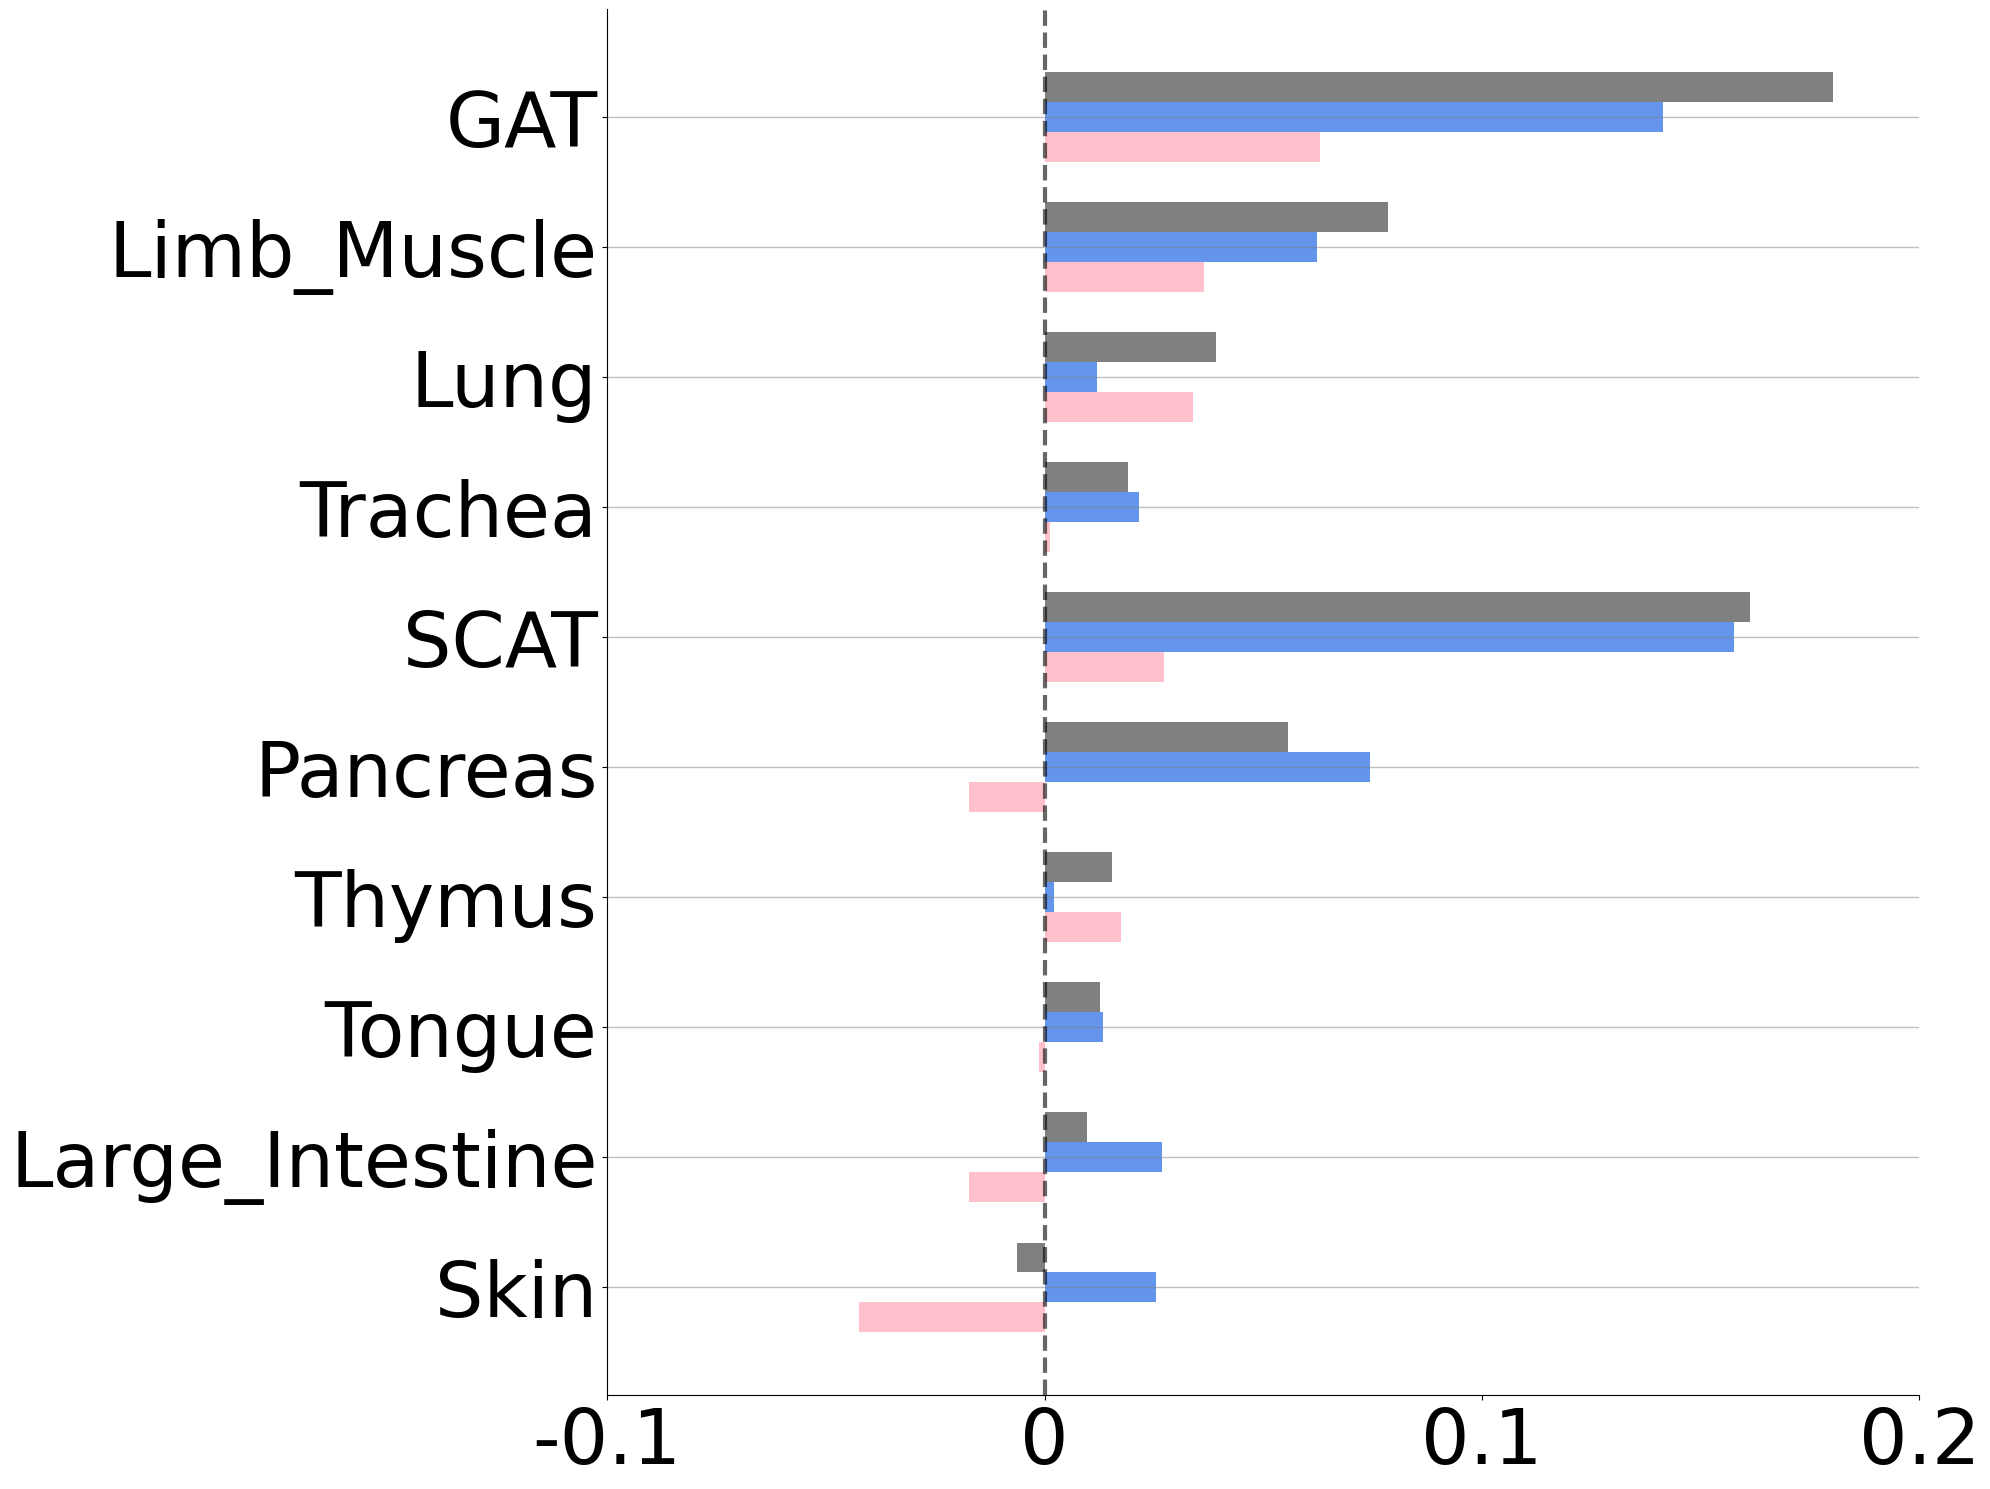

In [52]:
import seaborn as sns


summary_stats = df_mi.groupby(['Tissue','Type']).apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI_diff']),
    'Count': len(x),
    'std' : np.std(x['MI_diff']),
    'se' : np.std(x['MI_diff'])/np.sqrt(len(x['MI_diff']))
    #'P_value': binomtest(np.sum(x['MI_diff'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()
#print(summary_stats)
#print([summary_stats['Type']=='m3_vs_24m'])
#print(summary_stats.head())
type_sort = 'm3_distribution_in_24m_network'
test = np.array(-1*summary_stats[summary_stats['Type']==type_sort]['Proportion_Positive'])
#summary_stats['sort'] = -1*summary_stats['Proportion_Positive']


#for t in summary_stats['Tissue'].unique():
#    summary_stats.loc[(summary_stats['Tissue']==t), 'sort'] = [summary_stats[(summary_stats['Tissue']==t)&(summary_stats['Type']==type_sort)]['sort']]*3

types = summary_stats['Type'].unique()
#summary_stats.sort_values('sort', inplace=True)

#print(summary_stats)
tissues = summary_stats['Tissue'].unique()
print(tissues)

#tissues = summary_stats['Tissue'].unique()

palette = sns.color_palette("colorblind", n_colors=len(types))
colors = dict(zip(types, palette))
print(summary_stats['Type'])

type_colors = {
    '3m vs 24m': 'grey',  # light green
    '3m distribution in 24m network': 'pink',  # orange
    '3m network in 24m distribution': 'cornflowerblue'  # blue
}

summary_stats['Color'] = summary_stats['Type'].map(type_colors)

# turn the Tissue column into a categorical with that order
summary_stats["Tissue"] = pd.Categorical(summary_stats["Tissue"],
                                         categories=tissue_order[::-1],
                                         ordered=True)

# then sort by that column
summary_stats.sort_values("Tissue", inplace=True)

# regenerate tissues list & y positions
tissues = summary_stats["Tissue"].cat.categories
#print(tissues, tissue_order)

y_pos = np.arange(len(tissues))
# Set bar parameters
bar_height = 0.23


fig, ax = plt.subplots(figsize=(20, 15))
plt.grid(axis='y', color='grey', linestyle='-', linewidth=1, alpha=0.5)

#ns = np.array([2,0,1])
for i, type_label in enumerate(types):
    #print(type_label)
    m = i#ns[i]
    # Offset each type's bars so they don't overlap
    subset = summary_stats[summary_stats['Type'] == type_label]
    #tissues_curr = subset['Tissue'].unique()
    #print(summary_stats[summary_stats['Type']==type_label])
    heights = np.array(subset['Proportion_Positive'])
    #print(len(subset['std']))
    xerr = [heights - subset['std'], heights+subset['std']]

    #print([(tissue_order[n], heights[n]) for n in range(len(tissue_order))])
    #print(xerr)
    #print(y_pos.shape)
    offset = (m - (len(types)-1)/2) * bar_height  # center offsets
    ax.barh(y_pos + offset, heights, height=bar_height,
            label=type_label, color=subset['Color'], zorder=1)
    '''
    ax.errorbar(
        heights, y_pos + offset,
        xerr=subset['std'],
        fmt='none', elinewidth=1.5, capsize=3, capthick=1.5, ecolor='black', zorder=0
    )
    '''

y_pos = np.arange(len(tissues))  # one per tissue


ax.set_yticks(y_pos)
ax.set_yticklabels(tissues, fontsize=55)
xs = [-0.1, 0, 0.1, 0.2]
ax.set_xticks(xs)
#ax.set_xlim([-0.075, 0.075])
#ax.set_xlim([-0.11, 0.11])

plt.axvline(0, linestyle='--', linewidth=3, color='black', zorder=2, alpha=0.6)

ax.set_xticklabels(xs, fontsize=55)

#ax.set_xlabel(r"Mean $\Delta MI$", fontsize=50)
#($MI_{3m} - MI_{x}$
#plt.legend(labels= ['Restoring Distribution', 'Data', 'Restoring Network'],
#            fontsize=13)

#handles, labels = plt.gca().get_legend_handles_labels()
#label = ['Data', 'Restoring Network', 'Restoring Distribution']
# Reverse both
#handle = [handles[n] for n in [0,2,1]]
#label = [label[n] for n in ns[::-1]]
#plt.grid(axis='x', linestyle=':', alpha=0.6)

sns.despine(left=False, bottom=False, top=True, right=True)
#plt.legend(handles[::-1], label, fontsize=30)

plt.tight_layout()
plt.savefig('paper_figs_final/MI_swap_summary.pdf', dpi=300)
plt.show()

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1) Aggregate: mean diff + 95% CI ----
agg = (
    df_mi
    .groupby(['Tissue','Type'])['MI_diff']
    .agg(Mean_Diff='mean', N='size', SD='std')
    .reset_index()
)
agg['SE'] = agg['SD'] / np.sqrt(agg['N'].clip(lower=1))
agg['CI_lo'] = agg['Mean_Diff'] - 1.96*agg['SE']
agg['CI_hi'] = agg['Mean_Diff'] + 1.96*agg['SE']

# Optional: rename to reflect it’s no longer a proportion
agg.rename(columns={'Mean_Diff': 'MeanDiff'}, inplace=True)

# ---- 2) Pivot for consistent ordering & easy indexing ----
pivot_mean = agg.pivot(index='Tissue', columns='Type', values='MeanDiff')
pivot_lo   = agg.pivot(index='Tissue', columns='Type', values='CI_lo')
pivot_hi   = agg.pivot(index='Tissue', columns='Type', values='CI_hi')

# Choose the type to sort by (as you had)
#type_sort = 'm3_distribution_in_24m_network'
# Some tissues may be missing this column; fill to avoid errors
#if type_sort not in pivot_mean.columns:
#    raise ValueError(f"{type_sort} not found in agg Types: {list(pivot_mean.columns)}")

order = pivot_mean[type_sort].sort_values(ascending=False).index
tissues = order.tolist()
types = list(pivot_mean.columns)


palette = [type_colors.get(t, 'lightgray') for t in types]

# ---- 4) Plot grouped barh with error bars ----
fig, ax = plt.subplots(figsize=(10, 12))
bar_height = 0.23
y_pos = np.arange(len(tissues))

for i, tlabel in enumerate(types):
    offset = (i - (len(types)-1)/2) * bar_height

    means = pivot_mean.loc[order, tlabel].values
    lo    = pivot_lo.loc[order, tlabel].values
    hi    = pivot_hi.loc[order, tlabel].values

    # xerr wants symmetric or [neg, pos]; we provide asymmetric deltas
    xerr = np.vstack([means - lo, hi - means])

    ax.barh(
        y_pos + offset, means,
        height=bar_height, label=tlabel, color=palette[i], edgecolor='none'
    )
    ax.errorbar(
        means, y_pos + offset,
        xerr=xerr,
        fmt='none', elinewidth=1.5, capsize=3, capthick=1.5, ecolor='black'
    )

# ---- 5) Aesthetics ----
ax.set_yticks(y_pos)
ax.set_yticklabels(tissues, fontsize=14)

# Mean diff label (change sign/wording if your diff is MI_3m - MI_x)
ax.set_xlabel(r"Mean $\Delta MI$ (3m $-$ x)", fontsize=16)

# Legend (custom order if you like)
#custom_order = ['m3_vs_24m', 'm3_network_in_24m_distribution', 'm3_distribution_in_24m_network']
#handles, labels = ax.get_legend_handles_labels()
#label_to_handle = {lab: h for h, lab in zip(handles, labels)}
#ordered = [label_to_handle[l] for l in custom_order if l in label_to_handle]
#ax.legend(ordered, [l.replace('_', ' ') for l in custom_order if l in label_to_handle],
#          fontsize=12, frameon=False, loc='lower right')

sns.despine(left=False, bottom=False, top=True, right=True)
plt.tight_layout()
#plt.savefig('paper_figs_final/MI_swap_summary.png', dpi=300)  # add extension
plt.show()

KeyError: 'm3_distribution_in_24m_network'

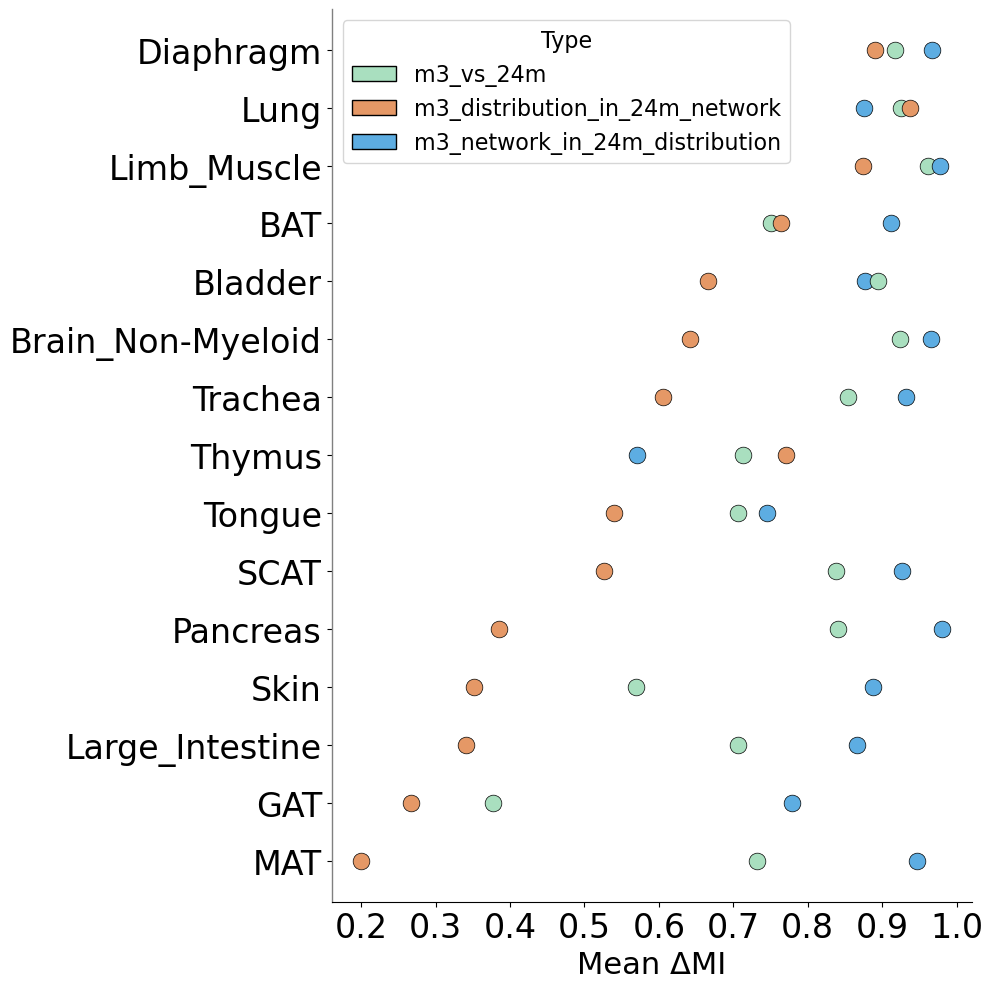

Tissue                            Type  Proportion_Positive  \
24                MAT  m3_distribution_in_24m_network             0.199416   
12                GAT  m3_distribution_in_24m_network             0.267252   
15    Large_Intestine  m3_distribution_in_24m_network             0.341313   
33               Skin  m3_distribution_in_24m_network             0.351084   
14                GAT                       m3_vs_24m             0.377270   
27           Pancreas  m3_distribution_in_24m_network             0.385815   
30               SCAT  m3_distribution_in_24m_network             0.526475   
39             Tongue  m3_distribution_in_24m_network             0.539279   
35               Skin                       m3_vs_24m             0.569279   
37             Thymus  m3_network_in_24m_distribution             0.571215   
42            Trachea  m3_distribution_in_24m_network             0.605334   
6   Brain_Non-Myeloid  m3_distribution_in_24m_network             0.642079   
3             Bladder  m3_distribution_in_24m_network             0.665561   
17    Large_Intestine                       m3_vs_24m             0.706035   
41             Tongue                       m3_vs_24m             0.706355   
38             Thymus                       m3_vs_24m             0.712701   
26                MAT                       m3_vs_24m             0.731556   
40             Tongue  m3_network_in_24m_distribution             0.745784   
2                 BAT                       m3_vs_24m             0.750966   
0                 BAT  m3_distribution_in_24m_network             0.763474   
36             Thymus  m3_distribution_in_24m_network             0.771270   
13                GAT  m3_network_in_24m_distribution             0.778793   
32               SCAT                       m3_vs_24m             0.837573   
29           Pancreas                       m3_vs_24m             0.841186   
44            Trachea                       m3_vs_24m             0.853545   
16    Large_Intestine  m3_network_in_24m_distribution             0.865951   
18        Limb_Muscle  m3_distribution_in_24m_network             0.873978   
22               Lung  m3_network_in_24m_distribution             0.875188   
4             Bladder  m3_network_in_24m_distribution             0.876866   
34               Skin  m3_network_in_24m_distribution             0.887529   
9           Diaphragm  m3_distribution_in_24m_network             0.891004   
5             Bladder                       m3_vs_24m             0.895054   
1                 BAT  m3_network_in_24m_distribution             0.912497   
11          Diaphragm                       m3_vs_24m             0.916920   
8   Brain_Non-Myeloid                       m3_vs_24m             0.924512   
23               Lung                       m3_vs_24m             0.925900   
31               SCAT  m3_network_in_24m_distribution             0.926419   
43            Trachea  m3_network_in_24m_distribution             0.932067   
21               Lung  m3_distribution_in_24m_network             0.937652   
25                MAT  m3_network_in_24m_distribution             0.946859   
20        Limb_Muscle                       m3_vs_24m             0.961632   
7   Brain_Non-Myeloid  m3_network_in_24m_distribution             0.965374   
10          Diaphragm  m3_network_in_24m_distribution             0.966334   
19        Limb_Muscle  m3_network_in_24m_distribution             0.977919   
28           Pancreas  m3_network_in_24m_distribution             0.981040   

      Count        P_value                                           CI_tuple  \
24  16428.0   1.000000e+00  (0.19941563184806427, 0.19941563184806427, 0.1...   
12  17070.0   1.000000e+00  (0.26725248974809607, 0.26725248974809607, 0.2...   
15  20761.0   1.000000e+00  (0.34131303887096, 0.34131303887096, 0.3413130...   
33  16751.0   1.000000e+00  (0.35108351740194615, 0.35108351740194615, 0.3...   
14  17070.0   1.00000

In [ ]:
from scipy.stats import binomtest

df = df_mi_diff

'''
summary_props = df.groupby(['Tissue','Type']).apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI_diff'] > 0),
    'Count': len(x),
    'P_value': binomtest(np.sum(x['MI_diff'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()

# Merge with median & CI
summary_stats = summary_props.merge(
    summary_props.groupby(['Tissue','Type'])['Proportion_Positive'].apply(bootstrap_ci).reset_index(name='CI_tuple'),
    on=['Tissue','Type']
)
summary_stats[['Mean', 'CI_lower', 'CI_upper']] = pd.DataFrame(
    summary_stats['CI_tuple'].tolist(), index=summary_stats.index
)

# Sort by proportion
summary_stats.sort_values('Proportion_Positive', inplace=True)

# Define color map (colorblind friendly)

'''
summary_stats['sort'] = summary_stats['Mean']
summary_stats.sort_values('sort', inplace=True)

fig  = plt.figure(figsize=(10, 10))#plt.figure(figsize=(12, 10))

# Colors remain the same
dot_color = "#2C3E50"
line_color = "#95A5A6"
zero_line_color = "#7F8C8D"


type_colors = {
    'm3_vs_24m': '#A9DFBF',  # light green
    'm3_distribution_in_24m_network': '#E59866',  # orange
    'm3_network_in_24m_distribution': '#5DADE2'  # blue
}

summary_stats['Color'] = summary_stats['Type'].map(type_colors)

'''
# Plot
plt.errorbar(
    summary_stats['Mean'],
    summary_stats['Tissue'],
    xerr=[summary_stats['Mean'] - summary_stats['CI_lower'], summary_stats['CI_upper'] - summary_stats['Mean']],
    fmt='o',
    markersize=6,
    color=summary_stats['Color'],
    ecolor=line_color,
    capsize=3,
    elinewidth=1,
    markeredgecolor='black',
    markeredgewidth=0.5,
    linestyle='None'
)
'''
for _, row in summary_stats.iterrows():
    plt.errorbar(
        row['Mean'],
        row['Tissue'],
        xerr=[[row['Mean'] - row['CI_lower']], [row['CI_upper'] - row['Mean']]],
        fmt='o',
        markersize=12,
        color=row['Color'],
        ecolor=line_color,
        capsize=3,
        elinewidth=1,
        markeredgecolor='black',
        markeredgewidth=0.5,
        linestyle='None'
    )


# Zero reference line
#plt.axvline(0, linestyle='--', color=zero_line_color, linewidth=1)

# Subtle vertical line to ground tissues visually
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['left'].set_linewidth(1)

# Remove other spines for clean look
sns.despine(left=False, bottom=False, top=True, right=True)

# Title & labels
#plt.title('Median Δ Mutual Information (3m - 24m)', fontsize=16, fontweight='bold')
plt.xlabel('Mean ΔMI', fontsize=22)
plt.ylabel('')
plt.grid(False)

# Ticks style
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

from matplotlib.patches import Patch

legend_elements = [Patch(facecolor=col, edgecolor='black', label=typ) 
                   for typ, col in type_colors.items()]
plt.legend(handles=legend_elements, title='Type', fontsize=16, title_fontsize=16)

# 2) Inset axis in bottom‐right of the left plot
#    [left, bottom, width, height] in figure coordinates
#inset_pos = [0.67, 0.18, 0.28, 0.41]
#ax_inset = fig.add_axes(inset_pos)
'''
# --- Right (inset): proportion bar chart ---
colors = ['#2C3E50' if p < 0.05 else '#D35400' for p in summary_stats['P_value']]
bars = ax_inset.barh(summary_stats['Tissue'], summary_stats['Proportion_Positive'], color=colors)
ax_inset.set_ylim([-1,14.4])

for bar, pval in zip(bars, summary_stats['P_value']):
    if pval == 0:
        label = '*'
    elif pval < 1e-10:
        label = f'{pval:.1e}'
    else:
        label = f'{pval:.2f}'
    ax_inset.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                label, va='center', fontsize=15)
    
ax_inset.axvline(0.5, linestyle='--', color='gray')
ax_inset.set_xlabel('Proportion > 0', fontsize=18)
ax_inset.set_yticks([])
ax_inset.set_xticks([0.5])

ax_inset.tick_params(axis='x', labelsize=14)
'''
sns.despine(ax=ax_inset, left=False, bottom=False)

plt.grid(False)
plt.tight_layout()
#plt.legend(fontsize=20)
plt.savefig('grant_figs_and_data/dot_whisker_MI_styled_with_yaxis_mean_all_types.pdf', bbox_inches='tight', transparent=True)
plt.show()
summary_stats

/tmp/tmp.zzbzi86TIk/ipykernel_1870995/1184457920.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_props = df_mi.groupby('Tissue').apply(lambda x: pd.Series({


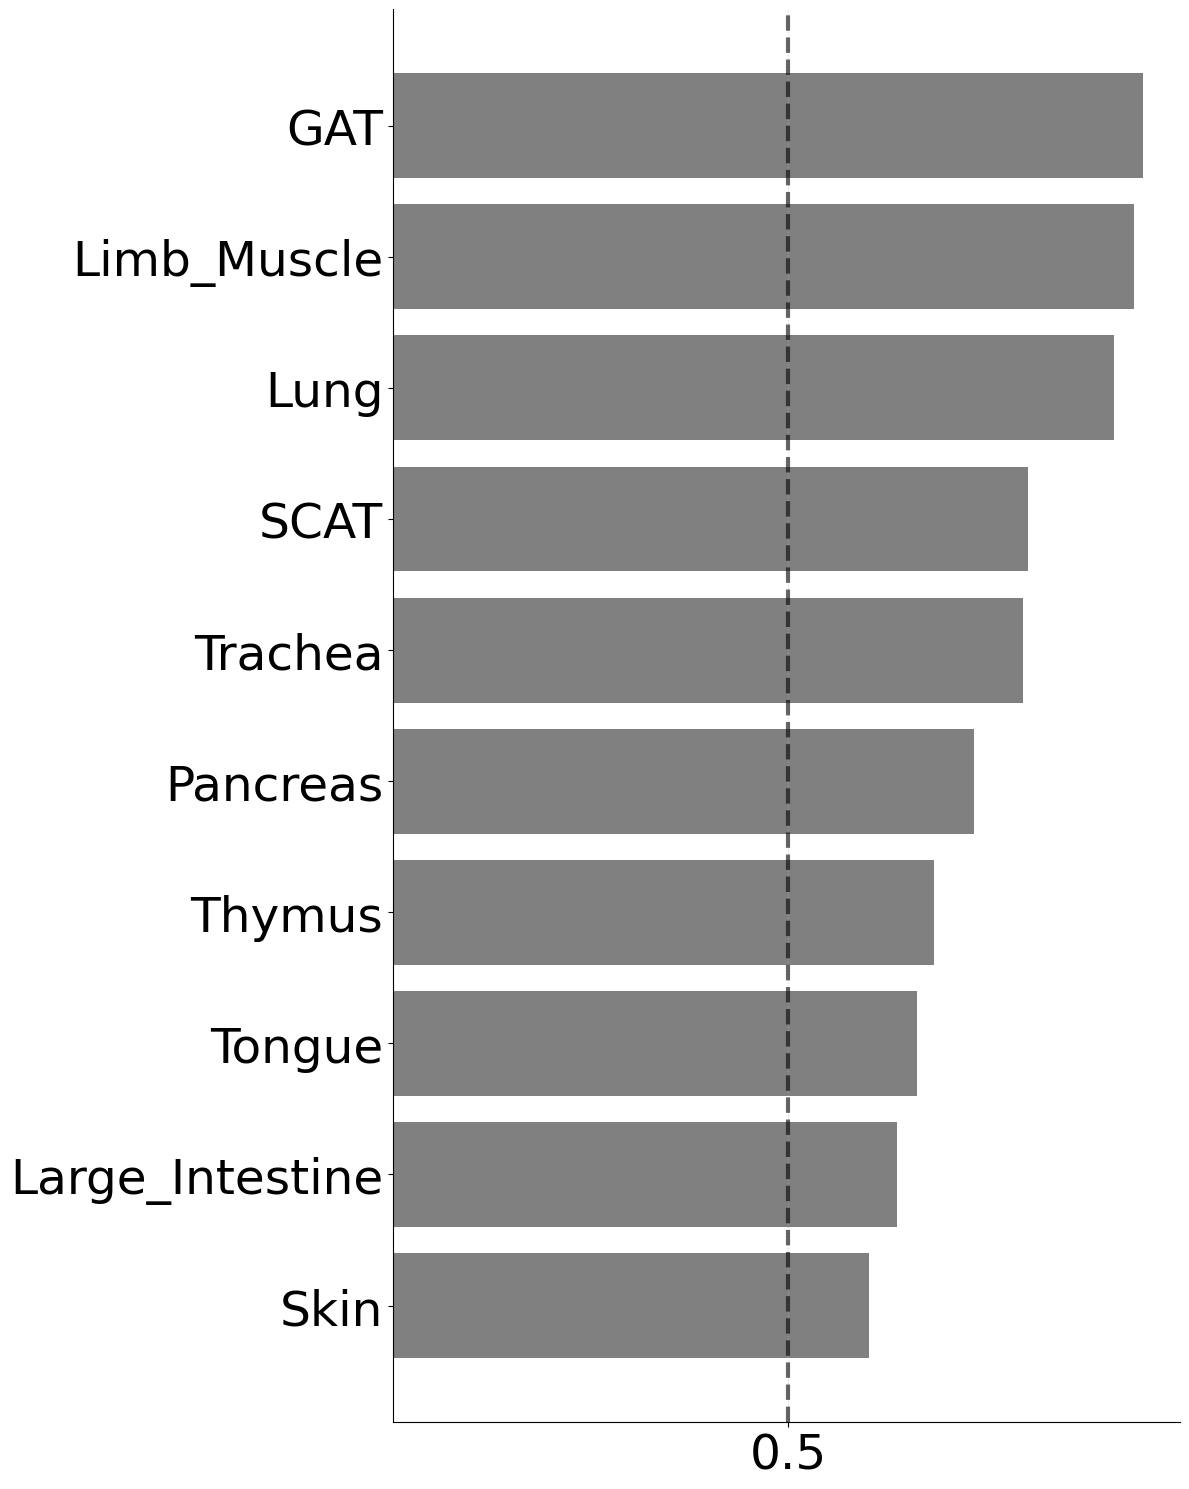

In [96]:
# Bootstrap CI (returns: median, CI_low, CI_high)
from scipy.stats import binomtest
import seaborn as sns
#df_mi = pd.read_csv('MI_diff_summary,csv')#df_mi_diff[df_mi_diff['Type']=='m3_network_in_24m_distribution']
# Proportion + p-value
summary_props = df_mi.groupby('Tissue').apply(lambda x: pd.Series({
    'Proportion_Positive': np.mean(x['MI_diff'] > 0),
    'Count': len(x),
    'P_value': binomtest(np.sum(x['MI_diff'] > 0), n=len(x), p=0.5, alternative='greater').pvalue
})).reset_index()

# Merge with median & CI
summary_stats = summary_props.merge(
    df_mi.groupby('Tissue')['MI_diff'].apply(bootstrap_ci).reset_index(name='CI_tuple'),
    on='Tissue'
)
summary_stats[['Mean', 'CI_lower', 'CI_upper']] = pd.DataFrame(
    summary_stats['CI_tuple'].tolist(), index=summary_stats.index
)

# Sort by proportion
summary_stats.sort_values('Proportion_Positive', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 15))
colors = ['#2C3E50' if p < 0.05 else '#D35400' for p in summary_stats['P_value']]
bars = plt.barh(summary_stats['Tissue'], summary_stats['Proportion_Positive'], color='grey')
sns.despine(left=False, bottom=False)


plt.axvline(0.5, linestyle='--', linewidth=3, color='black', zorder=2, alpha=0.6)
#plt.title('Proportion of Genes with ΔMI > 0 (3m - 18m)', fontsize=18)
#plt.xlabel('Proportion Positive', fontsize=16)
plt.xticks([0.5],fontsize=35)
plt.yticks(fontsize=35)
plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('paper_figs_final/proportion_positive_MI_plot.pdf', dpi=600)
plt.show()


# knock-in

(1, 16394)


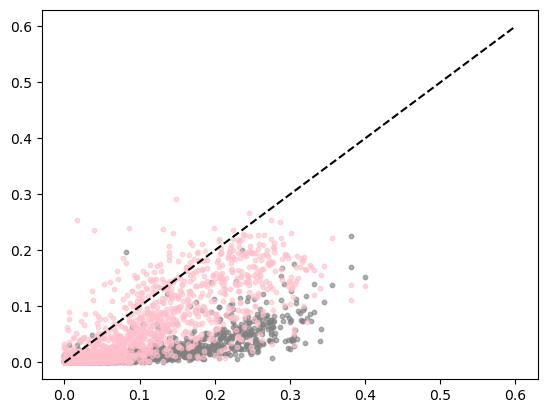

In [51]:
# alsp MI of below n
plt.figure()
print(data_mi_ki_by_mi['MI_3m'].shape)
plt.scatter(data_mi_ki_by_mi['MI_3m'][0, :2000], data_mi_ki_by_mi['MI_24m'][0, :2000], c = 'grey', alpha=0.6, s=10)
plt.scatter(data_mi_ki_by_mi['MI_3m'][0, :2000], data_mi_ki_by_mi['MI_ki_top5'][0, :2000], c = 'pink', alpha=0.6, s=10)
ax.set_aspect('equal')
plt.plot([0,.6], [0,.6],'--', c='black')


(849, 1232)


ValueError: x and y must be the same size

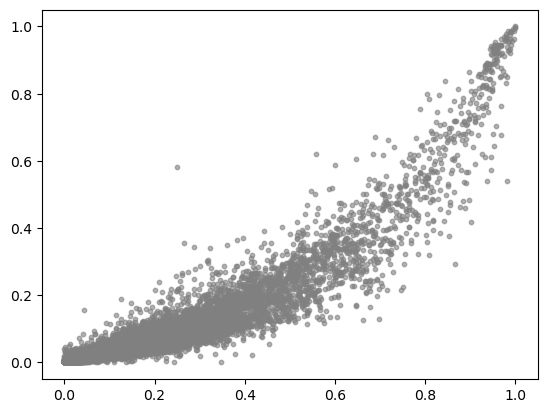

In [15]:
import seaborn as sns
fig, ax = plt.subplots()

colors = sns.color_palette("colorblind", 3)
mi_3m = data_mi_swap_limb['3m'][:2000]
np.random.shuffle(mi_3m)

mi_24m = data_mi_swap_limb['24m'][:2000]
np.random.shuffle(mi_3m)

mi_3m_24m = data_mi_swap_limb['3m distribution in 24m network'][:2000]
np.random.shuffle(mi_3m)

mi_24m_3m = data_mi_swap_limb['3m network in 24m distribution'][:2000]
np.random.shuffle(mi_3m)
tg_samples = np.load('../project/Aging/ki_samples/samples_ki_tf_top5_Limb_Muscle_fact_0.01_no_ho.npy')#np.load('samples_tg_top5_by_mi_v2.npy')
print(tg_samples.shape)
plt.scatter(gene_data3.mean(axis=1), gene_data24.mean(axis=1), color='grey', label='Data', s=10, zorder=4, alpha=0.6)
plt.scatter(gene_data3.mean(axis=1), tg_samples.mean(axis=1), color='pink', label='Data', s=10, zorder=0, alpha=0.6)

#stat, pval = wilcoxon(mi_3, mi_24)

xs = [0, 1]
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.6, linewidth=3)
#plt.plot([0, 0.6], [0, 0.6])
    


sns.despine(left=False, bottom=False, top=True, right=True)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
#plt.xlabel("MI 3m", fontsize=23)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
ax.set_aspect('equal', adjustable='box') 
#plt.savefig('paper_figs_final/top8_by_MI_tg_act_scatter', dpi=200)
#plt.tight_layout()
#plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
#    fontsize=12,
#    loc='lower right'


#)

In [ ]:
tf_names = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)
L1 = np.load(f'ki_mean/L1_ki_MI_{t}.npy')

tf_names[L1.argsort()[:10]] ,

module reset
ycrc_conda_env.sh update

array(['Ebf2', 'Ebf1', 'Aebp1', 'Elf3', 'Foxq1', 'Tcf7l1', 'Snai1',
       'Creb5', 'Atf1', 'Bhlhe40'], dtype=object)

(6000,) (6000,)


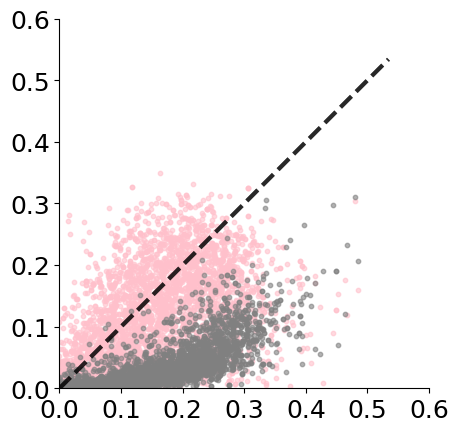

In [122]:
import seaborn as sns
fig, ax = plt.subplots()
elements = np.random.randint(0, data_mi_ki_by_mi['MI_3m'].shape[1], 6000)
colors = sns.color_palette("colorblind", 3)
mi_3m = data_mi_ki_by_mi['MI_3m'][0, elements]

mi_24m = data_mi_ki_by_mi['MI_24m'][0, elements]

mi_ki = data_mi_ki_by_mi['MI_ki_top8'][0, elements]

#mi_24m_3m = data_mi_swap_limb['3m network in 24m distribution'][:2000]
print(mi_3m.shape, mi_ki.shape)

plt.scatter(mi_3m, mi_ki, color='pink', label='Data', s=10, zorder=0, alpha=0.6)
plt.scatter(mi_3m, mi_24m, color='grey', label='Data', s=10, zorder=1, alpha=0.6)

#stat, pval = wilcoxon(mi_3, mi_24)
big = max(mi_3m.max(), mi_24m.max())
big_big = max(big, mi_ki.max())
#xs = [0, 1]
xs = [0, big_big+0.05]
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.6, linewidth=3)
#plt.plot([0, 0.6], [0, 0.6])
    
plt.xlim(0, xs[1]+0.05)
plt.ylim(0, xs[1]+0.05)
plt.plot(xs, xs, linestyle='--', color='black', alpha=0.6, linewidth=3)
#plt.plot([0, 0.6], [0, 0.6])
    


sns.despine(left=False, bottom=False, top=True, right=True)
ax.set_xlim([0,xs[1]+0.06])
ax.set_ylim([0,xs[1]+0.06])
ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
#plt.xlabel("MI 3m", fontsize=23)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(ticks, fontsize=18)
plt.yticks(ticks, fontsize=18)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
ax.set_aspect('equal', adjustable='box') 
for coll in getattr(ax, "collections", []):  # collections = scatter plots
    coll.set_rasterized(True)

#fig.savefig(f'paper_figs_final/mi_top8_ki',
#            dpi=150,         # controls rasterized resolution
#            bbox_inches='tight')

#plt.tight_layout()
#plt.legend(
    #labels=["3m vs 24m (true)", "3m TFs swapped in 24m GRN", "3m GRN swapped in 24m TFs"],
#    fontsize=12,
#    loc='lower right'
#)

# Now out degrees

In [ ]:
# Out degree of 3m to 24m : green vs grey (square)
# Plot for IFFL motifs and IFL (sum all types)
    # Seperate for 3m and 24m (same colors as above)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.patheffects as pe
mi_ki = data_mi_ki_by_mi['MI_ki_top5']

# --- Prepare Data ---
sorted_data_dense = np.sort(L1/nG)
ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

TF_names = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)

# --- Plot Setup ---
fig, ax = plt.subplots()
L1_data = np.sum(np.abs(data_mi_ki['MI_3m'] - data_mi_ki['MI_24m']))
L1_ki = np.sum(np.abs(data_mi_ki_by_mi['MI_ki_top5'] - data_mi_ki_by_mi['MI_3m']))

ax.axvline(L1_data/nG, c='black', label='L1 data', alpha=0.8, ls='--', linewidth=2)
ax.axvline(L1_ki/nG, c='blue', label='L1 top 5', alpha=0.8, ls='--', linewidth=2)

# Plot CCDF curve
ax.plot(sorted_data_dense, ccdf_dense, c='black', lw=3, alpha=0.8)

# Scatter for lowest 8 points
lowest_idx = np.argsort(L1)[:5]
diff_top5 = L1[lowest_idx]-L1_data
print('diff', TF_names[lowest_idx], L1[lowest_idx])
ax.axvline((np.sum(L1[lowest_idx]-L1_data)+L1_data)/nG, c='red', label='L1 sum', alpha=0.8, ls='--', linewidth=2)

ax.scatter(sorted_data_dense[lowest_idx], ccdf_dense[lowest_idx],
           s=30, c='dimgrey', edgecolor='dimgrey', linewidth=1.2, zorder=5)

test = [(0.08092224585836727, 0.8338661730887879, 'Ebf2'),
 (0.07830887627664393, 0.8736889337596051, 'Ebf1'),
 (0.07360563328610983, 1.0220090863200402, 'Aebp1'),
 (0.0761947238899916, 0.8001009591115597, 'Elf3'),
 (0.0792049110152264, 0.7579224858376802, 'Foxq1'),
 #(0.08014745499220062, ccdf_dense[lowest_idx[5]]-0.01, 'Tcf7l1'),
 #(0.08000683640321124, 0.297717202310842, 'Snai1'),
 #(0.0791359304010507, 0.9552414605418139, 'Creb5')
 ]
cMuscle24 = np.load('data/cell_type_idxs_Limb_Muscle_24m_skeletal muscle satellite cell.npy')
cMuscle3 = np.load('data/cell_type_idxs_Limb_Muscle_3m_skeletal muscle satellite cell.npy')
# --- Label points ---
mi_means = []
for i in lowest_idx:
    mi = np.load(f'mi_stuff/MIki_in_24m_tg_lam_3_10_Limb_Muscle_tf_{i}.npy')
    mi_means.append(mi.mean())
    print('mean is ', mi.mean())
mi_means = np.array(mi_means)
mean24 = data_mi_ki['MI_24m'].mean()

print(mi_means, 'actual', mean24)
mi_means_diff = (mi_means - mean24).sum()
print(lowest_idx, TF_names[lowest_idx])
print('combined', L1_ki/nG ,  L1_ki/nG, mi_means_diff)
print('not combo', L1_data - np.sum(L1[lowest_idx]-L1_data)/nG, np.sum(L1[lowest_idx]-L1_data)/nG+L1_data/nG,
     mi_ki.mean() - mean24)
'''
texts = []
for idx in lowest_idx:
    texts.append(ax.text(
        sorted_data_dense[idx], ccdf_dense[idx], TF_names[idx],
        fontsize=13, color='darkblue', weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
        zorder=4
    ))
'''

x = sorted_data_dense[lowest_idx]
y = ccdf_dense[lowest_idx]
label = TF_names[lowest_idx]

xtexts = [0.07721947-.0035, 0.07721829+.0065, 0.07443292+.0045, 0.07726572+.0035, 0.07750373-.0035, 0.07847566+.0035,
    0.0784232-.0035,  0.07694496 + .0035] 
ytexts = [0.83981154-0.024, 0.8409894-0.024,  0.99646643-0.024, 0.82685512-0.054 ,0.76089517-0.024 ,0.18492344-0.024,
 0.26501767-0.024, 0.89281508-0.024] 
labels = ['Ebf2', 'Ebf1' ,'Aebp1' ,'Elf3' ,'Foxq1', 'Tcf7l1' ,'Snai1' ,'Creb5']

print(x, y, label)

i=0
for idx in lowest_idx:
    x = sorted_data_dense[idx]
    y = ccdf_dense[idx]
    label = TF_names[idx]

    # Example: move label straight up by 0.05
    x_text = xtexts[i]
    y_text = ytexts[i]

    i+=1

    ax.annotate(
        label,
        xy=(x, y),                # point
        xytext=(x_text, y_text),  # label position
        fontsize=15,
        color='black',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none', pad=1),
        arrowprops=dict(arrowstyle='-', color='black', lw=1.2),
        ha='center',              # horizontal alignment
        va='bottom',     
    )
# --- Style & Axes ---
#ax.set_xlim(sorted_data_dense.min() * 0.98, sorted_data_dense.max() * 1.02)
ax.set_ylim(-0.015, 1.02)
plt.legend()
#ax.set_xticks([0.07, 0.08, 0.09, 0.10])
ax.tick_params(labelsize=18)
sns.despine(left=False, bottom=False)
plt.tight_layout()
#plt.savefig('paper_figs_final/labeled_top5_tfs_with_sums', dpi=300)
print('actual ki mean mi', mi_ki.mean(), mi_means_diff + mean24)
plt.show()
mi_ki = data_mi_ki_by_mi['MI_ki_top5']
mi_ki.mean(), L1_data/nG
data_mi_ki_by_mi.keys()

: 

## Regular

In [11]:
import argparse
from importlib import reload
import numpy as np
import torch
import get_st_funcs_generalized as gs
import h5py
import os
import functools
import random
import matplotlib.pyplot as plt
reload(gs)
dict_tissue={}
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

with open("tissue_names_with_lam.txt", "r") as f:
    for line in f:
        parts = line.strip().split()  # split by whitespace
        t = parts[0]
        if np.any(tissues == t):
            lam3 = float(parts[1]) if "." in parts[1] else int(parts[1])
            lam24 = float(parts[2]) if "." in parts[2] else int(parts[2])#int(parts[2])
            print(f'3 is {lam3}, 24 is {lam24}')
            dict_tissue[t] = [lam3, lam24]

factor = 0.01 # Cutoff for analysis

with open("sparsities.txt", 'w') as f:
    f.write(f'Format is tissue, sp tf 3m, sp tf 24m, sp tg 3m, sp tg 24m\n')

for t in tissues:
    gene_data3 = np.load(f'data/{t}_tg_data_binary_3m_filt.npy') # Actual TG data
    tf_data3 = np.load(f'data/{t}_tf_data_binary_3m_filt.npy') # Actual TF data
    gene_data24 = np.load(f'data/{t}_tg_data_binary_24m_filt.npy')
    tf_data24 = np.load(f'data/{t}_tf_data_binary_24m_filt.npy')
    lam3 = dict_tissue[t][0]
    lam24 = dict_tissue[t][1]
    print(f'on tissue {t}, lam3 = {lam3}, lam24 = {lam24}')


    names_tf = np.load(f'data/final_tf_names_{t}.npy', allow_pickle=True)

    nTF, nC3 = tf_data3.shape
    nTF, nC24 = tf_data24.shape
    nG, _ = gene_data3.shape
    
    age = 24
    ################ Load parameters for 24m ###################
    directory_path = f'../project/Aging/output_tf_{t}/{age}m/'
    pi_tf24, theta_tf24, m_tf24 = gs.load_h5_param(t, directory_path, age, lam24) 
    #### TG model parameters
    directory_path = f'../project/Aging/output_tg_{t}/{age}m/'
    pi_tg24, theta_tg24, m_tg24 = gs.load_h5_param(t, directory_path, age, lam24) 

    ################ Load parameters for 3m ###################
    print('Loading model paramters....')
    age = 3

    #### TG model parameters
    directory_path = f'../project/Aging/output_tg_{t}/{age}m/'
    pi_tg3, theta_tg3, m_tg3 = gs.load_h5_param(t, directory_path, age, lam3) 
    print('theta tg', theta_tg3.shape)
    #### TF model parameters
    directory_path = f'../project/Aging/output_tf_{t}/{age}m/'
    pi_tf3, theta_tf3, m_tf3 = gs.load_h5_param(t, directory_path, age, lam3) 
    print('theta tf', theta_tf3.shape)


    #### Cut off theta to take away weak connections
    theta_tf3[np.abs(theta_tf3) < factor] = 0; theta_tf24[np.abs(theta_tf24) < factor] = 0
    theta_tg3[np.abs(theta_tg3) < factor] = 0; theta_tg24[np.abs(theta_tg24) < factor] = 0

    sp3_tf = np.where(theta_tf3 != 0)[0].shape[0]/theta_tf3.flatten().shape[0]
    sp24_tf = np.where(theta_tf24 != 0)[0].shape[0]/theta_tf24.flatten().shape[0]
    sp3_tg = np.where(theta_tg3 != 0)[0].shape[0]/theta_tg3.flatten().shape[0]
    sp24_tg = np.where(theta_tg24 != 0)[0].shape[0]/theta_tg24.flatten().shape[0]

    #with open("sparsities.txt", "a", encoding="utf-8") as f:
    #    f.write(f"{t}, TF 3m: {sp3_tf} | TF 24m: {sp24_tf} | TG 3m: {sp3_tg} | TG 24m: {sp24_tg}\n")

    with open("sparsities.txt", 'a') as f:
        f.write(f'{t} & {sp3_tf:.3f} & {sp24_tf:.3f} & {sp3_tg:.3f} & {sp24_tg:.3f}\n')

    if sp3_tf < sp24_tf:
        print('Lowest sparsity for tf is 3m....')
        theta_tf_sparse = theta_tf3; theta_tf_dense = theta_tf24
        age_tf_sparse = 3; age_tf_dense = 24
        sp_sparse_tf = sp3_tf
    else:
        print('Lowest sparsity for tf is 24m....')
        theta_tf_sparse = theta_tf24; theta_tf_dense = theta_tf3   
        age_tf_sparse = 24; age_tf_dense = 3
        sp_sparse_tf = sp24_tf

    if sp3_tg < sp24_tg:
        print('and Lowest sparsity for tg is 3m....')
        theta_tg_sparse = theta_tg3; theta_tg_dense = theta_tg24
        age_tg_sparse = 3; age_tg_dense = 24 
        sp_sparse_tg = sp3_tg
    else:
        print('and Lowest sparsity for tg is 24m....')
        theta_tg_sparse = theta_tg24; theta_tg_dense = theta_tg3 
        age_tg_sparse = 24; age_tg_dense = 3 
        sp_sparse_tg = sp24_tg
            
    print(f'current sparsity for 3m is {sp3_tf} for TF and {sp3_tg} for TG')
    print(f'current sparsity for 24m is {sp24_tf} for TF and {sp24_tg} for TG')



    theta_tf_sparse_bin = theta_tf_sparse.copy(); theta_tf_sparse_bin[np.abs(theta_tf_sparse_bin) > 0] = 1
    #theta_tg_sparse_bin = theta_tg_sparse.copy(); theta_tg_sparse_bin[np.abs(theta_tg_sparse_bin) > 0] = 1

    # Correct for sparsity 
    theta_tf_sp, out_deg_tf_dense, out_deg_tf_dense_eff, n0_diff_tf, sp_new_tf = gs.correct_sparsity(theta_tf_dense, theta_tf_sparse, nTF, niters=50)
    #theta_tg_sp, out_deg_tg_dense, out_deg_tg_dense_eff, n0_diff_tg, sp_new_tg = gs.correct_sparsity(theta_tg_dense, theta_tg_sparse, nTF, niters=50)
    theta_tf_sp_bin = theta_tf_sp.copy(); theta_tf_sp_bin[np.abs(theta_tf_sp_bin) > 0] = 1
    #theta_tg_sp_bin = theta_tg_sp.copy(); theta_tg_sp_bin[np.abs(theta_tg_sp_bin) > 0] = 1

    print(f'remaining sparsity for sparse TF is {sp_sparse_tf} and {sp_new_tf}')
    #print(f'remaining sparsity for sparse TG is {sp_sparse_tg} and {sp_new_tg}')

    
    #np.save(f'out_deg_{t}_{age_tg_dense}m_tg_corrected_sp', out_deg_tg_dense)

    null_out_deg_tf = gs.get_null(theta_tf3, theta_tf24, nTF, niters=50)
    #null_out_deg_tg = gs.get_null(theta_tg3, theta_tg24, nTF, niters=100)
    

    out_deg_tf_sparse = theta_tf_sparse_bin.sum(axis=1)# out_deg_tg_sparse = theta_tg_sparse_bin.sum(axis=1)
    out_deg_tf_sparse_eff = np.abs(theta_tf_sparse).sum(axis=1)#; out_deg_tg_sparse_eff = np.abs(theta_tg_sparse).sum(axis=1)
    np.save(f'out_deg_{t}_{age_tf_dense}m_tf_corrected_sp_sp_age_{age_tf_sparse}m', out_deg_tf_dense)
    np.save(f'out_deg_{t}_{age_tf_sparse}m_tf_corrected_sp_dense_age_{age_tf_dense}m', out_deg_tf_sparse)
    np.save(f'out_deg_{t}_null_tf', null_out_deg_tf)

    

print('WOOT WOOT')
'''
############ Now plot out degrees ###########
# TF real
gs.plot_out_deg(out_deg_tf_dense, out_deg_tf_sparse, null_out_deg_tf, t, 'tf',
)
# TG real
gs.plot_out_deg(out_deg_tg_dense, out_deg_tg_sparse, null_out_deg_tg, t, 'tg', dense_age = 3, sparse_age = 24)

# TF effective
gs.plot_out_deg_eff(out_deg_tf_dense_eff, out_deg_tf_sparse_eff, t, 'tf')
# TG effectie
gs.plot_out_deg_eff(out_deg_tg_dense_eff, out_deg_tg_sparse_eff, t, 'tg')
'''


3 is 2, 24 is 3
3 is 2, 24 is 3
3 is 3, 24 is 2
3 is 3, 24 is 2
3 is 2, 24 is 2
3 is 3, 24 is 3
3 is 5, 24 is 3
3 is 0.98, 24 is 2
3 is 1, 24 is 1.3
3 is 2, 24 is 5
on tissue GAT, lam3 = 0.98, lam24 = 2
loading...
loading...
Loading model paramters....
theta tg (855, 17070)
loading...
theta tf (855, 855)
Lowest sparsity for tf is 24m....
and Lowest sparsity for tg is 24m....
current sparsity for 3m is 0.3711295783317944 for TF and 0.3609159395266138 for TG
current sparsity for 24m is 0.15711090591977017 for TF and 0.1513644196411748 for TG
156453.0
156453
remaining sparsity for sparse TF is 0.15711090591977017 and 0.15711090591977017
on tissue Limb_Muscle, lam3 = 2, lam24 = 3
loading...
loading...
Loading model paramters....
loading...
theta tg (849, 16394)
loading...
theta tf (849, 849)
Lowest sparsity for tf is 24m....
and Lowest sparsity for tg is 24m....
current sparsity for 3m is 0.1795516376919566 for TF and 0.17497107807404041 for TG
current sparsity for 24m is 0.056041820141758

"\n############ Now plot out degrees ###########\n# TF real\ngs.plot_out_deg(out_deg_tf_dense, out_deg_tf_sparse, null_out_deg_tf, t, 'tf',\n)\n# TG real\ngs.plot_out_deg(out_deg_tg_dense, out_deg_tg_sparse, null_out_deg_tg, t, 'tg', dense_age = 3, sparse_age = 24)\n\n# TF effective\ngs.plot_out_deg_eff(out_deg_tf_dense_eff, out_deg_tf_sparse_eff, t, 'tf')\n# TG effectie\ngs.plot_out_deg_eff(out_deg_tg_dense_eff, out_deg_tg_sparse_eff, t, 'tg')\n"

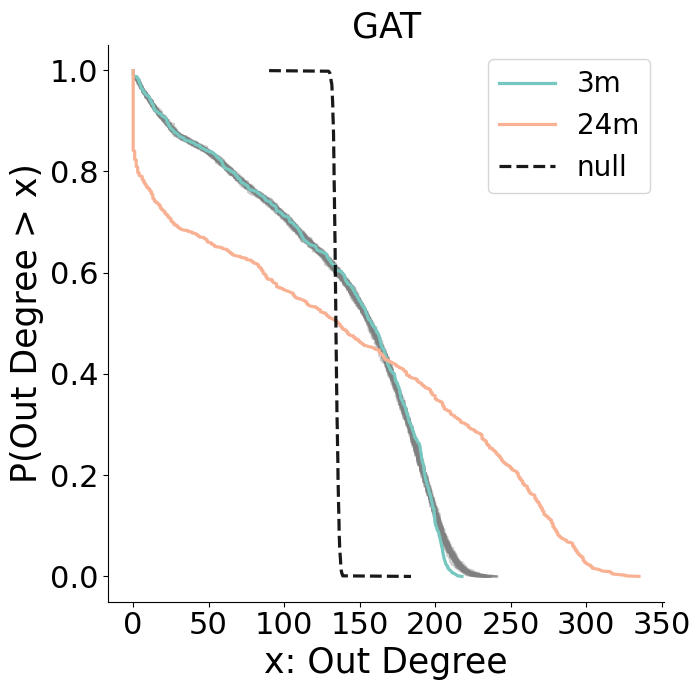

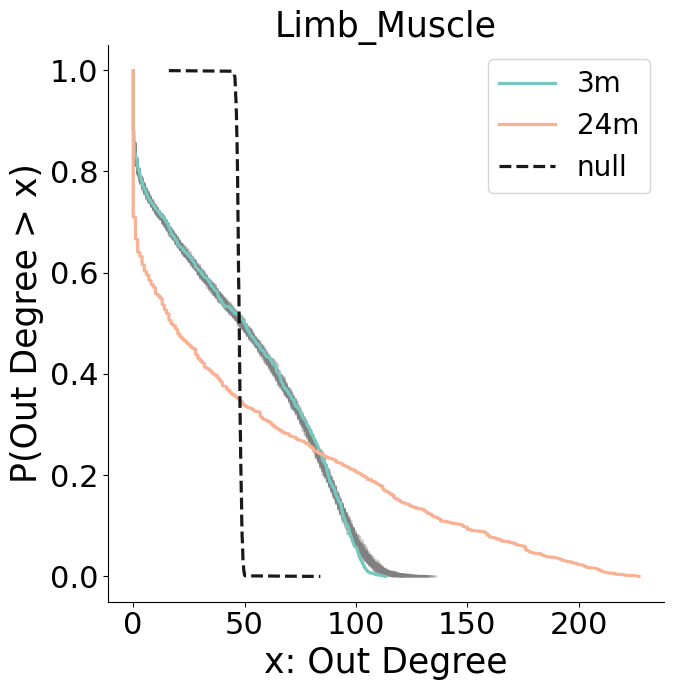

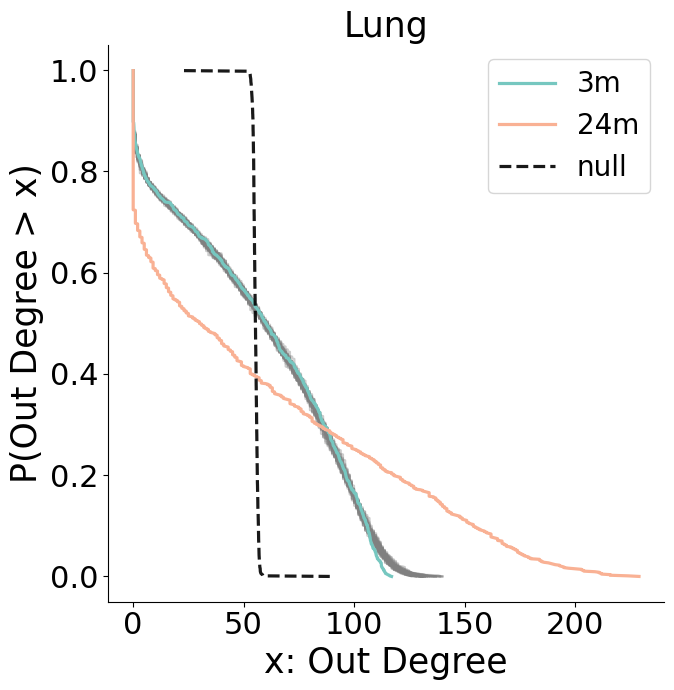

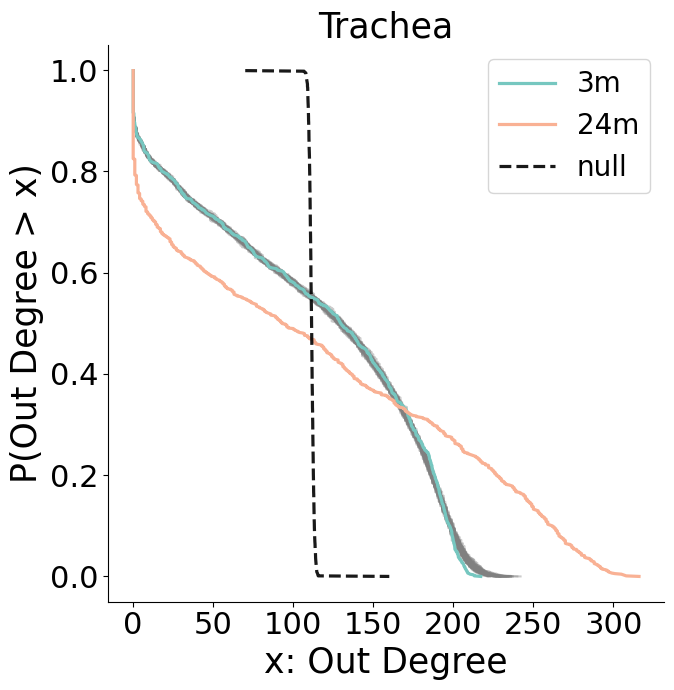

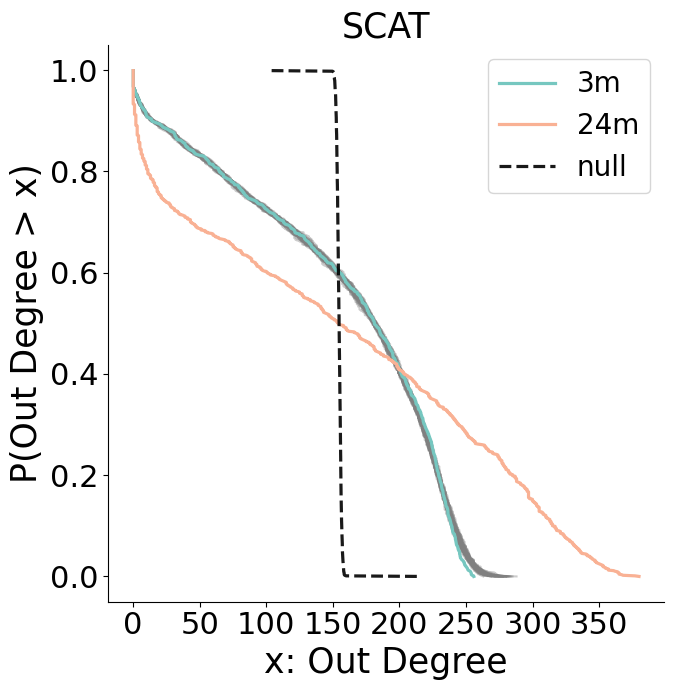

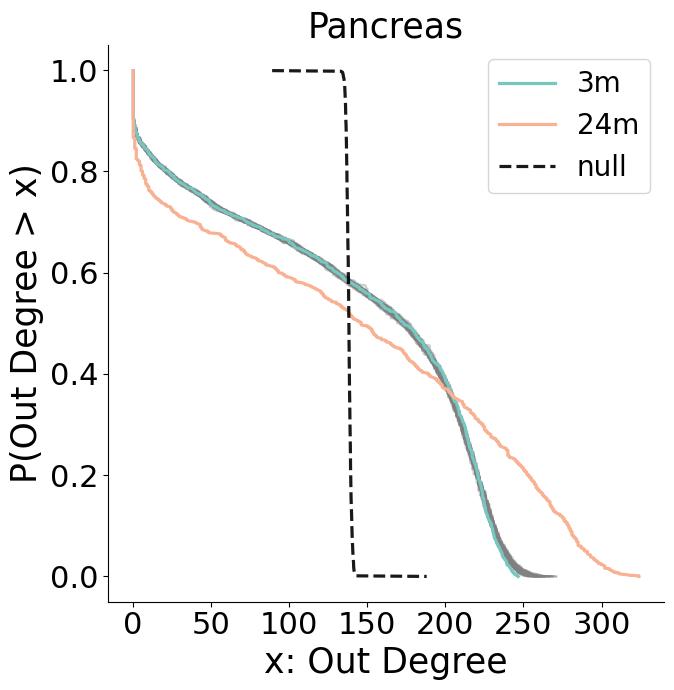

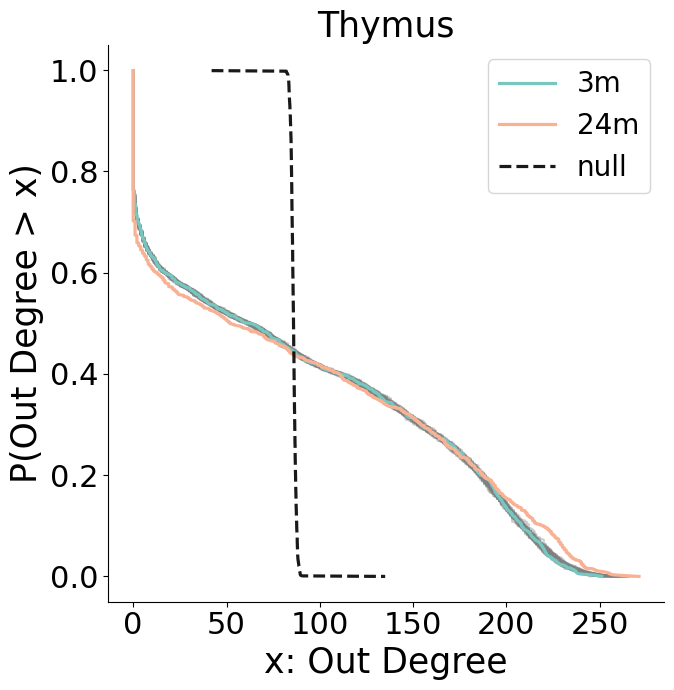

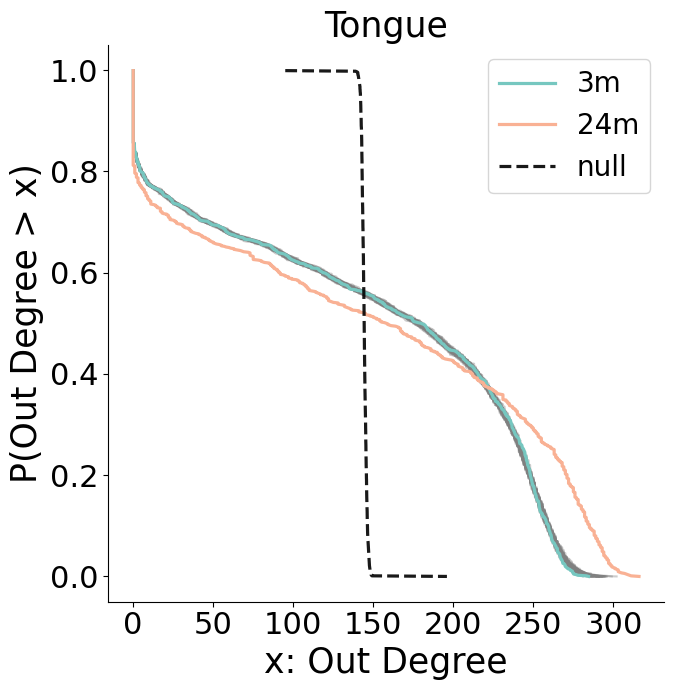

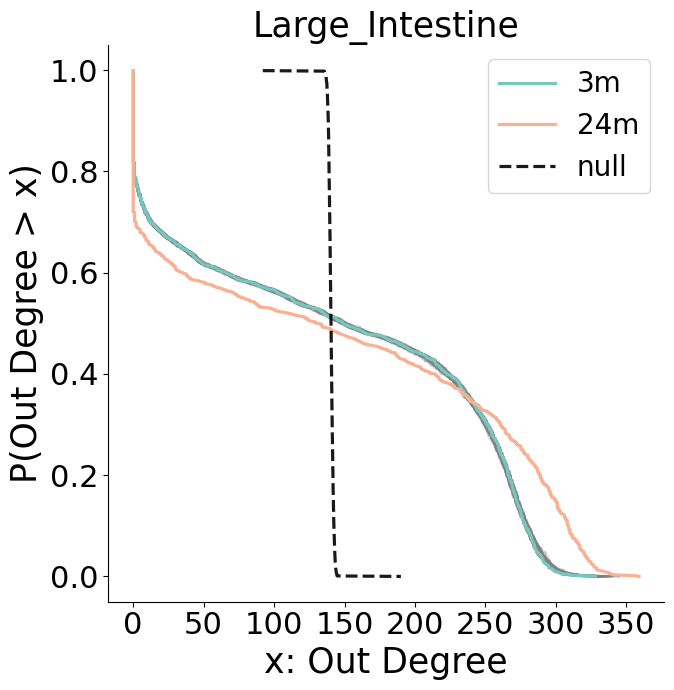

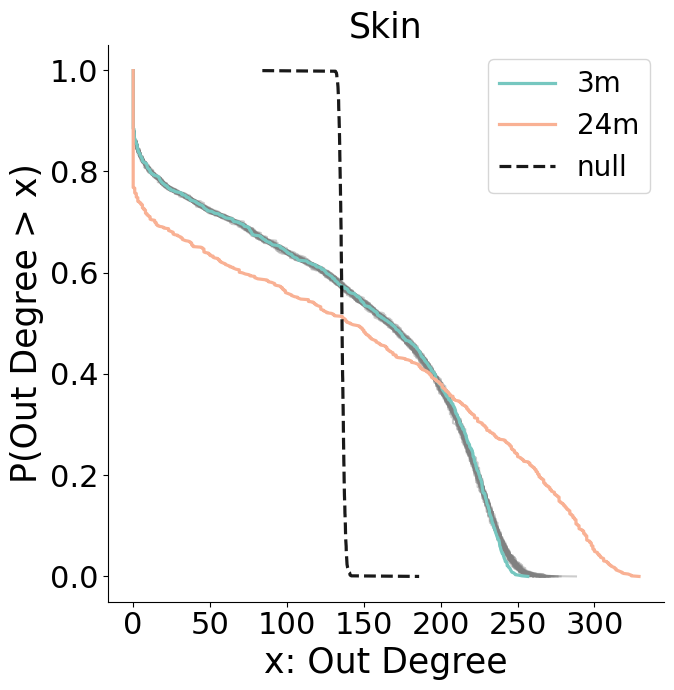

In [47]:
import seaborn as sns
palette = ['#76c7c0', '#f9b194']  
age_tf_dense = 3
age_tf_sparse = 24


for t in tissues:
    fig1, ax = plt.subplots(figsize=(11,7))
    out_deg_tf3m = np.load(f'out_deg_{t}_{age_tf_dense}m_tf_corrected_sp_sp_age_{age_tf_sparse}m.npy')
    out_deg_tf24m = np.load(f'out_deg_{t}_{age_tf_sparse}m_tf_corrected_sp_dense_age_{age_tf_dense}m.npy')
    out_deg_null = np.load(f'out_deg_{t}_null_tf.npy')[1::2]

    extend_null = np.append(out_deg_null.min()-5 , np.sort(out_deg_null.mean(axis=0)))
    final_null = np.append(extend_null, out_deg_null.max()+5)
    niters = out_deg_tf3m.shape[0]
    
    for i in range(niters):
        sorted_data_dense = np.sort(out_deg_tf3m[i]) 
        ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense) 

        #sorted_data_null = np.sort(out_deg_null[i])
        #ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

        # Plot each iteration as very light
        plt.figure(fig1)
        plt.plot(sorted_data_dense, ccdf_dense , markersize=4, c = 'grey', alpha = 0.4)
        #plt.plot(sorted_data_null, ccdf_null, markersize=2,c='lightgrey', alpha = 0.4)


    sorted_data_dense = np.sort(out_deg_tf3m.mean(axis=0)) 
    sorted_data_sparse = np.sort(out_deg_tf24m) 
    sorted_data_null = final_null #np.sort(out_deg_null.mean(axis=0)) 

    ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense) 
    ccdf_sparse = 1.0 - np.arange(1, len(sorted_data_sparse)+1) / len(sorted_data_sparse) 
    ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

    plt.plot(sorted_data_dense, ccdf_dense  , c=palette[0],label=f'{age_tf_dense}m', linewidth=2.3)
    plt.plot(sorted_data_sparse, ccdf_sparse  , c=palette[1],label=f'{age_tf_sparse}m', linewidth=2.3)
    plt.plot(sorted_data_null, ccdf_null  , '--',label='null', linewidth=2.3,c='black', alpha =.9)


    plt.legend(fontsize = 20)
    plt.title(f'{t}', fontsize=25)
    plt.ylabel('P(Out Degree > x)',fontsize = 25)
    plt.xlabel('x: Out Degree',fontsize = 25)
    plt.grid(False)

    ax.set_box_aspect(1)

    sns.despine(left=False, bottom=False, top=True, right=True)

    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)

    plt.tight_layout()
    plt.savefig(f'paper_figs_final/out_deg_TF_{t}.pdf', dpi=200)


    

In [57]:
out_deg_dense.shape


(849,)

(849, 16394)


<Figure size 600x400 with 0 Axes>

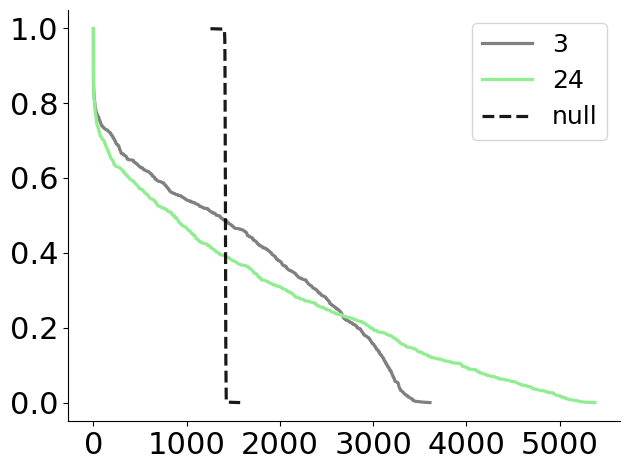

In [59]:
# Plot
import seaborn as sns
fig1 = plt.figure(figsize=(6, 4)) # to plot TGs
out_deg_dense = out_deg_tf_dense
out_deg_sparse = out_deg_tf_sparse

theta_tf_sp_bin = theta_tf_sp.copy(); theta_tf_sp_bin[np.abs(theta_tf_sp_bin) > 0] = 1
theta_tg_sp_bin = theta_tg_sp.copy(); theta_tg_sp_bin[np.abs(theta_tg_sp_bin) > 0] = 1
out_deg_dense = theta_tg_sp_bin.sum(axis=1)
out_deg_sparse = theta_tg_sparse_bin.sum(axis=1)

print(theta_tg3.shape)

out_deg_null = null_out_deg_tg
niters=out_deg_dense.shape[0]
dense_age = 3; sparse_age = 24
'''
for i in range(niters):
    sorted_data_dense = np.sort(out_deg_dense[i])
    ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

    sorted_data_null = np.sort(out_deg_null[i])
    ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

    # Plot each iteration as very light
    plt.figure(fig1)
    plt.plot(sorted_data_dense, ccdf_dense, markersize=4, c = 'grey', alpha = 0.4)
    plt.plot(sorted_data_null, ccdf_null, markersize=2,c='lightgrey', alpha = 0.4)
'''
# 73, 82
test = np.append(out_deg_null.min()-5 , np.sort(out_deg_null.mean(axis=0)))
test2 = np.append(test, out_deg_null.max()+5)
# Plot the mean for ones with iterations and the full thing otherwise
sorted_data_dense = np.sort(out_deg_dense)
sorted_data_sparse = np.sort(out_deg_sparse)
sorted_data_null = test2#np.sort(out_deg_null.mean(axis=0)) 

ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)
ccdf_sparse = 1.0 - np.arange(1, len(sorted_data_sparse)+1) / len(sorted_data_sparse)
ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)


fig, ax = plt.subplots()
plt.plot(sorted_data_dense, ccdf_dense, c='grey',label=f'{dense_age}', linewidth=2.3)
plt.plot(sorted_data_sparse, ccdf_sparse, c='lightgreen',label=f'{sparse_age}', linewidth=2.3)
plt.plot(sorted_data_null, ccdf_null, '--',label='null', linewidth=2.3,c='black', alpha =.9)


#plt.xlabel('Out degree', fontsize = 14)
#plt.ylabel('P(out degree > x)', fontsize = 14)
#plt.title(f'Out Degree Distribution TF', fontsize = 16)
plt.legend(fontsize = 18)
plt.grid(False)
plt.tight_layout()

sns.despine(left=False, bottom=False, top=True, right=True)
#ax.set_xlim([0,xs[1]+0.05])
#ax.set_ylim([0,xs[1]+0.05])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
#plt.xlabel("MI 3m", fontsize=23)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
#ax.set_aspect('auto') 
plt.tight_layout()

plt.savefig(f'grant_figs_and_data/out_deg_{t}_comparison_tf.pdf', dpi=600)

<Figure size 600x400 with 0 Axes>

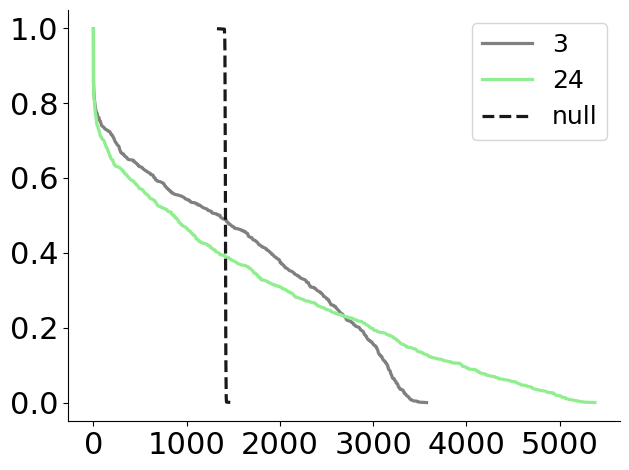

In [44]:
# Plot
import seaborn as sns
fig1 = plt.figure(figsize=(6, 4)) # to plot TGs
out_deg_dense = out_deg_tg_dense
out_deg_sparse = out_deg_tg_sparse

out_deg_null = null_out_deg_tg
niters=out_deg_dense.shape[0]
dense_age = 3; sparse_age = 24
'''
for i in range(niters):
    sorted_data_dense = np.sort(out_deg_dense[i])
    ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

    sorted_data_null = np.sort(out_deg_null[i])
    ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

    # Plot each iteration as very light
    plt.figure(fig1)
    plt.plot(sorted_data_dense, ccdf_dense, markersize=4, c = 'grey', alpha = 0.4)
    plt.plot(sorted_data_null, ccdf_null, markersize=2,c='lightgrey', alpha = 0.4)
'''
test = np.append(out_deg_null.mean(axis=0).min()-80 , np.sort(out_deg_null.mean(axis=0)))
test2 = np.append(test, out_deg_null.mean(axis=0).max()+80)

# 73, 82
# Plot the mean for ones with iterations and the full thing otherwise
sorted_data_dense = np.sort(out_deg_dense.mean(axis=0))
sorted_data_sparse = np.sort(out_deg_sparse)
sorted_data_null = test2#np.sort(out_deg_null.mean(axis=0)) 

ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)
ccdf_sparse = 1.0 - np.arange(1, len(sorted_data_sparse)+1) / len(sorted_data_sparse)
ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)


fig, ax = plt.subplots()
plt.plot(sorted_data_dense, ccdf_dense, c='grey',label=f'{dense_age}', linewidth=2.3)
plt.plot(sorted_data_sparse, ccdf_sparse, c='lightgreen',label=f'{sparse_age}', linewidth=2.3)
plt.plot(sorted_data_null, ccdf_null, '--',label='null', linewidth=2.3,c='black', alpha =.9)


#plt.xlabel('Out degree', fontsize = 14)
#plt.ylabel('P(out degree > x)', fontsize = 14)
#plt.title(f'Out Degree Distribution TF', fontsize = 16)
plt.legend(fontsize = 18)
plt.grid(False)
plt.tight_layout()

sns.despine(left=False, bottom=False, top=True, right=True)
#ax.set_xlim([0,xs[1]+0.05])
#ax.set_ylim([0,xs[1]+0.05])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
#plt.xlabel("MI 3m", fontsize=23)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
ax.set_aspect('auto') 
plt.tight_layout()


plt.savefig(f'grant_figs_and_data/out_deg_{t}_comparison_tg.pdf', dpi=600)

## Effective

(849, 16394)


<Figure size 600x400 with 0 Axes>

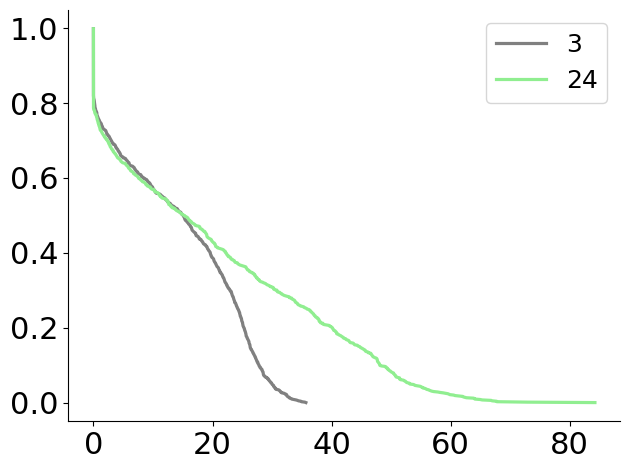

In [65]:
# Plot
import seaborn as sns
fig1 = plt.figure(figsize=(6, 4)) # to plot TGs
out_deg_dense = out_deg_tf_dense_eff
out_deg_sparse = out_deg_tf_sparse_eff


print(theta_tg3.shape)

#out_deg_null = null_out_deg_tf_eff
niters=out_deg_dense.shape[0]
dense_age = 3; sparse_age = 24
'''
for i in range(niters):
    sorted_data_dense = np.sort(out_deg_dense[i])
    ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

    sorted_data_null = np.sort(out_deg_null[i])
    ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

    # Plot each iteration as very light
    plt.figure(fig1)
    plt.plot(sorted_data_dense, ccdf_dense, markersize=4, c = 'grey', alpha = 0.4)
    plt.plot(sorted_data_null, ccdf_null, markersize=2,c='lightgrey', alpha = 0.4)
'''
# 73, 82
test = np.append(out_deg_null.mean(axis=0).min()-5 , np.sort(out_deg_null.mean(axis=0)))
test2 = np.append(test, out_deg_null.mean(axis=0).max()+5)
# Plot the mean for ones with iterations and the full thing otherwise
sorted_data_dense = np.sort(out_deg_dense.mean(axis=0))
sorted_data_sparse = np.sort(out_deg_sparse)
#sorted_data_null = np.sort(out_deg_null.mean(axis=0)) 

ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)
ccdf_sparse = 1.0 - np.arange(1, len(sorted_data_sparse)+1) / len(sorted_data_sparse)
#ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)


fig, ax = plt.subplots()
plt.plot(sorted_data_dense, ccdf_dense, c='grey',label=f'{dense_age}', linewidth=2.3)
plt.plot(sorted_data_sparse, ccdf_sparse, c='lightgreen',label=f'{sparse_age}', linewidth=2.3)
#plt.plot(sorted_data_null, ccdf_null, '--',label='null', linewidth=2.3,c='black', alpha =.9)


#plt.xlabel('Out degree', fontsize = 14)
#plt.ylabel('P(out degree > x)', fontsize = 14)
#plt.title(f'Out Degree Distribution TF', fontsize = 16)
plt.legend(fontsize = 18)
plt.grid(False)
plt.tight_layout()

sns.despine(left=False, bottom=False, top=True, right=True)
#ax.set_xlim([0,xs[1]+0.05])
#ax.set_ylim([0,xs[1]+0.05])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
#plt.xlabel("MI 3m", fontsize=23)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
#ax.set_aspect('auto') 
plt.tight_layout()

#plt.savefig(f'grant_figs_and_data/out_deg_{t}_comparison_tf.pdf', dpi=600)

(849, 16394)


<Figure size 600x400 with 0 Axes>

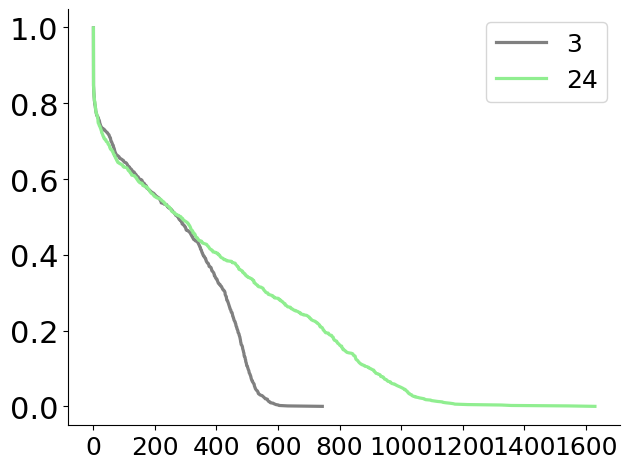

In [68]:
# Plot
import seaborn as sns
fig1 = plt.figure(figsize=(6, 4)) # to plot TGs
out_deg_dense = out_deg_tg_dense_eff
out_deg_sparse = out_deg_tg_sparse_eff


print(theta_tg3.shape)

#out_deg_null = null_out_deg_tf_eff
niters=out_deg_dense.shape[0]
dense_age = 3; sparse_age = 24
'''
for i in range(niters):
    sorted_data_dense = np.sort(out_deg_dense[i])
    ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)

    sorted_data_null = np.sort(out_deg_null[i])
    ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)

    # Plot each iteration as very light
    plt.figure(fig1)
    plt.plot(sorted_data_dense, ccdf_dense, markersize=4, c = 'grey', alpha = 0.4)
    plt.plot(sorted_data_null, ccdf_null, markersize=2,c='lightgrey', alpha = 0.4)
'''
# 73, 82
test = np.append(out_deg_null.mean(axis=0).min()-5 , np.sort(out_deg_null.mean(axis=0)))
test2 = np.append(test, out_deg_null.mean(axis=0).max()+5)
# Plot the mean for ones with iterations and the full thing otherwise
sorted_data_dense = np.sort(out_deg_dense.mean(axis=0))
sorted_data_sparse = np.sort(out_deg_sparse)
#sorted_data_null = np.sort(out_deg_null.mean(axis=0)) 

ccdf_dense = 1.0 - np.arange(1, len(sorted_data_dense)+1) / len(sorted_data_dense)
ccdf_sparse = 1.0 - np.arange(1, len(sorted_data_sparse)+1) / len(sorted_data_sparse)
#ccdf_null = 1.0 - np.arange(1, len(sorted_data_null)+1) / len(sorted_data_null)


fig, ax = plt.subplots()
plt.plot(sorted_data_dense, ccdf_dense, c='grey',label=f'{dense_age}', linewidth=2.3)
plt.plot(sorted_data_sparse, ccdf_sparse, c='lightgreen',label=f'{sparse_age}', linewidth=2.3)
#plt.plot(sorted_data_null, ccdf_null, '--',label='null', linewidth=2.3,c='black', alpha =.9)


#plt.xlabel('Out degree', fontsize = 14)
#plt.ylabel('P(out degree > x)', fontsize = 14)
#plt.title(f'Out Degree Distribution TF', fontsize = 16)
plt.legend(fontsize = 18)
plt.grid(False)
plt.tight_layout()

sns.despine(left=False, bottom=False, top=True, right=True)
#ax.set_xlim([0,xs[1]+0.05])
#ax.set_ylim([0,xs[1]+0.05])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
#plt.xlabel("MI 3m", fontsize=23)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=18)
plt.yticks(fontsize=22)
#plt.title(f'{t}', fontsize=32)

colors = sns.color_palette("colorblind", 3)
#ax.set_aspect('auto') 
plt.tight_layout()

#plt.savefig(f'grant_figs_and_data/out_deg_{t}_comparison_tf.pdf', dpi=600)

In [2]:
tissues = ['Kidney',
'Thymus',
'Brain_Non-Myeloid',
'Limb_Muscle',
'Skin',
'Pancreas',
'Heart',
'Spleen',
'Diaphragm',
'Trachea',
'Tongue',
'Brain_Myeloid',
'Bladder',
'Large_Intestine',
'BAT',
'GAT',
'MAT',
'SCAT',
'Lung',
'Liver',
'Marrow',
'Aorta']


lams = [2, 3, 3, 3, 2, 2, 6, 2, 3, 2,3, 9, 1, 3, 3, 1, 1, 2, 5, 3, 3, 1]

# Loops

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
t='Limb_Muscle'
keep = ['+++', '-+-', '+--','--+']
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

records_IFL=[]
records_IFFL=[]
for t in tissues:
    if not os.path.exists(f'IFFL_df_{t}.csv'):
        continue
    motif_df = pd.read_csv(f'IFFL_df_{t}.csv')
    counts_df = pd.read_csv(f'IFFL_counts_df_{t}.csv')

    motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :]
    counts_df_filtered = counts_df.loc[counts_df['pattern'].isin(keep), :]
    
    
    for pattern in counts_df_filtered['pattern'].unique():
        sub = counts_df_filtered[counts_df_filtered['pattern'] == pattern]
        
        count_3m = sub[sub['age'] == 3]['count'].sum() if 3 in sub['age'].values else 0
        count_24m = sub[sub['age'] == 24]['count'].sum() if 24 in sub['age'].values else 0
        
        delta = count_3m - count_24m  # or count_3m - count_24m depending on what you want
        pattern = pattern.replace('+++', '---')
        pattern = pattern.replace('-+-', '+-+')
        pattern = pattern.replace('+--', '-++')
        pattern = pattern.replace('--+', '++-')

        records_IFFL.append({
            'Tissue': t.replace('_', ' '),
            'Pattern': pattern,
            'count 24m': count_24m,
            'count 3m': count_3m,
            'ΔCount (3m - 24m)': delta
        })

    ###########################
    if not os.path.exists(f'IFL_df_{t}.csv'):
        continue
    motif_df = pd.read_csv(f'IFL_df_{t}.csv')
    counts_df = pd.read_csv(f'IFL_counts_df_{t}.csv')

    motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :]
    counts_df_filtered = counts_df.loc[counts_df['pattern'].isin(keep), :]
    
    
    for pattern in counts_df_filtered['pattern'].unique():
        sub = counts_df_filtered[counts_df_filtered['pattern'] == pattern]
        
        count_3m = sub[sub['age'] == 3]['count'].sum() if 3 in sub['age'].values else 0
        count_24m = sub[sub['age'] == 24]['count'].sum() if 24 in sub['age'].values else 0
        
        delta = count_3m - count_24m  # or count_3m - count_24m depending on what you want
        pattern = pattern.replace('+++', '---')
        pattern = pattern.replace('-+-', '+-+')
        pattern = pattern.replace('+--', '-++')
        pattern = pattern.replace('--+', '++-')

        records_IFL.append({
            'Tissue': t.replace('_', ' '),
            'Pattern': pattern,
            'count 24m': count_24m,
            'count 3m': count_3m,
            'ΔCount (3m - 24m)': delta
        })
    
# Convert to DataFrame
diff_df_IFFL = pd.DataFrame(records_IFFL)
diff_df_IFL = pd.DataFrame(records_IFL)

# Optional: pick a specific pattern if you want to show just one
# diff_df = diff_df[diff_df['Pattern'] == '++']
pallete = ['grey', 'lightgreen', 'pink', 'cornflowerblue']
'''
# Pivot to get patterns as columns (optional)
pivot_df = diff_df.pivot(index='Tissue', columns='Pattern', values='ΔCount (3m - 24m)').fillna(0)
plt.legend(
        fontsize=12,
        markerscale=2.5
    )
'''

counts_df.head, motif_df.head

(<bound method NDFrame.head of     age pattern          count
 0     3     +++  540345.714286
 1     3     ++-      20.000000
 2     3     +-+      12.380952
 3     3     +--  721813.333333
 4     3     -++  654006.666667
 5     3     -+-      20.952381
 6     3     --+      20.952381
 7     3     ---  872861.904762
 8    24     +++  385915.238095
 9    24     ++-      85.714286
 10   24     +-+     115.238095
 11   24     +--  517660.952381
 12   24     -++  435904.761905
 13   24     -+-     102.857143
 14   24     --+     114.285714
 15   24     ---  581306.666667>,
 <bound method NDFrame.head of          age      A      B      C pattern
 0          3  Ikzf4  Cebpz  Mypop     +--
 1          3   Spen  Rexo4  Atf6b     -++
 2          3   Arnt  Hoxa4  Safb2     ---
 3          3  Clock    Mlx   Lhx2     -++
 4          3  Grhl2  Dzip1   Etv6     +--
 ...      ...    ...    ...    ...     ...
 4945818   24   Nfib   Atf6  Foxj2     +++
 4945819   24  Prdm4  Klf11  Fosl1     ---
 494582

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/4175330749.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)
/tmp/tmp.cMjE63Lw9l/ipykernel_3903777/4175330749.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)


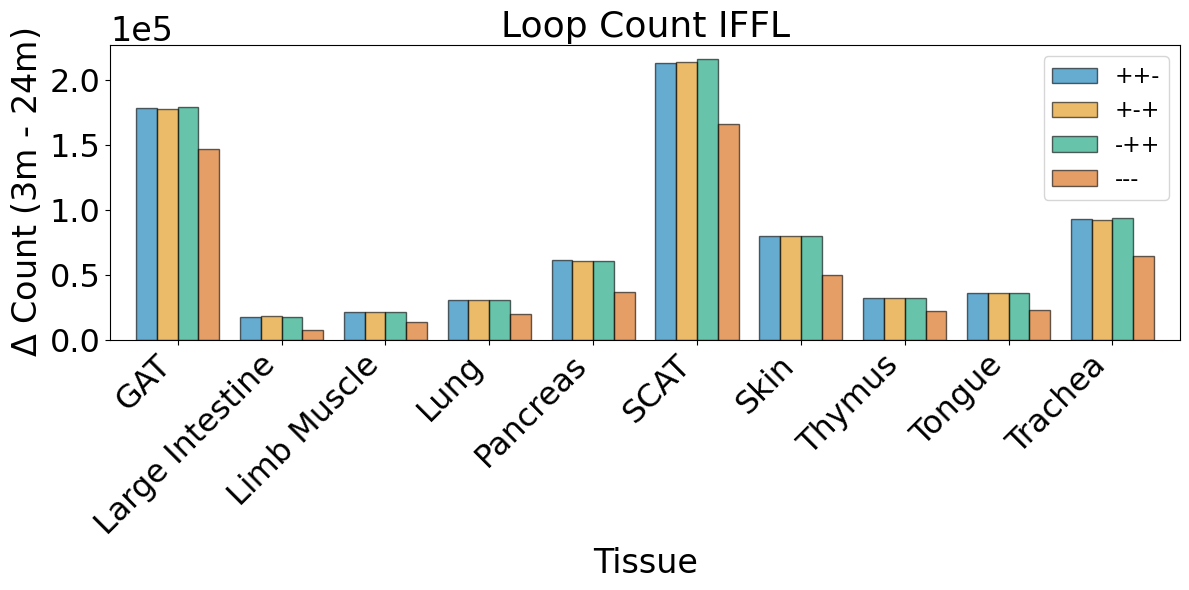

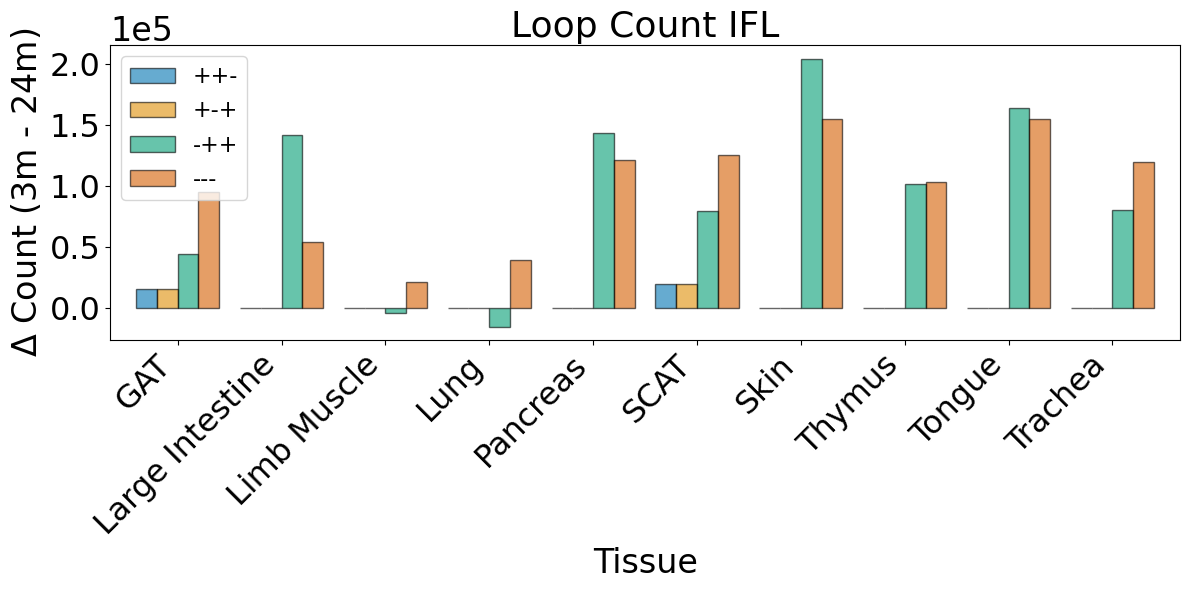

In [145]:
colors = sns.color_palette("colorblind", 12)
# Plot
#['+++', '-+-', '+--','--+']
pivot_df_IFFL = diff_df_IFFL.pivot(index='Tissue', columns='Pattern', values='ΔCount (3m - 24m)').fillna(0)

fig, ax = plt.subplots(figsize=(12, 7))
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)
pivot_df_IFFL.plot(kind='bar', width=0.8, figsize=(12, 6),ax=ax, color=colors[:4], alpha=0.6,edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=23)
plt.yticks(fontsize=23)
plt.xlabel('Tissue', fontsize=24)
plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)
plt.title('Loop Count IFFL', fontsize=26)
plt.legend(
        fontsize=16,
        markerscale=2.5
    )
plt.tight_layout()
plt.savefig('paper_figs_final/Tissue_IFFL_count_summary.pdf', dpi=300)


pivot_df_IFL = diff_df.pivot(index='Tissue', columns='Pattern', values='ΔCount (3m - 24m)').fillna(0)

fig, ax = plt.subplots(figsize=(12, 7))
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.yaxis.get_offset_text().set_fontsize(24)
pivot_df_IFL.plot(kind='bar', width=0.8, figsize=(12, 6),ax=ax, color=colors[:4], alpha=0.6,edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=23)
plt.yticks(fontsize=23)
plt.xlabel('Tissue', fontsize=24)
plt.ylabel('$\Delta$ Count (3m - 24m)', fontsize=24)
plt.title('Loop Count IFL', fontsize=26)
plt.legend(
        fontsize=16,
        markerscale=2.5
    )
plt.tight_layout()
plt.savefig('paper_figs_final/Tissue_IFL_count_summary.pdf', dpi=300)


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


t='Limb_Muscle'
keep = ['+++', '-+-', '+--','--+']
#keep = ['--+']
loop_type = 'IFFL'

tissues_needed = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
tissues_needed = ['Limb_Muscle']#np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)
tissues = np.load('tissue_order_by_MI_prop.npy', allow_pickle=True)

count_3m_tot = np.zeros((len(tissues), 2))
count_24m_tot = np.zeros((len(tissues), 2))
nt = 0
for t in tissues:
    records=[]
    n = 0
    for loop_type in ['IFFL', 'IFL']:

        if not os.path.exists(f'{loop_type}_df_{t}.csv'):
            print(f'test, {t}')
            continue
        #print(f'tissue is {t}')
        motif_df = pd.read_csv(f'{loop_type}_df_{t}.csv')
        counts_df = pd.read_csv(f'{loop_type}_counts_df_{t}.csv')
        #print(counts_df)
        motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :]
        counts_df_filtered = counts_df.loc[counts_df['pattern'].isin(keep), :]
        
        
        for pattern in counts_df_filtered['pattern'].unique():
            sub = counts_df_filtered[counts_df_filtered['pattern'] == pattern]
            
            count_3m = sub[sub['age'] == 3]['count'].sum() if 3 in sub['age'].values else 0
            count_24m = sub[sub['age'] == 24]['count'].sum() if 24 in sub['age'].values else 0
            count_3m_tot[nt, n] += count_3m
            count_24m_tot[nt, n] += count_24m

            delta = count_3m - count_24m  # or count_3m - count_24m depending on what you want
            ts = t.replace('_', ' ')
            norm = count_24m + count_3m
            print(f'{ts} & {loop_type} & {pattern} & {count_3m} & {count_24m} \\\\')
            records.append({
                'Tissue': ts,
                'Pattern': pattern,
                'count 24m': count_24m/norm,
                'count 3m': count_3m/norm,
                'Loop Type': loop_type
            })
    
        palette = ['#76c7c0', '#f9b194']  # you can pass just 2 colors too
        n+=1
    diff_df = pd.DataFrame(records)
    nt += 1
        # 1) Collapse patterns → totals per tissue for each age
        #    (If diff_df already has one row per tissue, groupby will just pass-through.)
    df_totals = (diff_df
                .groupby(['Tissue', 'Loop Type'])[['count 3m', 'count 24m']]
                .sum()
                .reset_index())
    #print(df_totals.head())
    # 2) Long (tidy) format for seaborn
    df_long = df_totals.melt(
        id_vars=['Tissue','Loop Type'],
        value_vars=['count 3m', 'count 24m'],
        var_name='Age',
        value_name='Count'
    )
    # Optional: prettify legend labels
    df_long['Age'] = df_long['Age'].str.replace('count ', '', regex=False)  # -> '3m' / '24m'
    df_long['Tissue'] = df_long['Tissue'].str.replace('_', ' ', regex=False)  # -> '3m' / '24m'
    # 3) Plot grouped bars
    # 3) Plot grouped bars
    '''
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    ax.yaxis.get_offset_text().set_fontsize(27)
    sns.barplot(data=df_long, x='Loop Type', y='Count', hue='Age', palette=palette, alpha=1)
    sns.despine(left=False, bottom=False, top=True, right=True)
    plt.xlabel("", fontsize=0)
    plt.ylabel(f"Total Loop Count", fontsize=27)
    #plt.ylabel("MI Swapped", fontsize=23)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.title(f'{ts}', fontsize = 27)
    '''
    #plt.legend(
    #    fontsize=20,
    #    loc='upper left',
    #    bbox_to_anchor=(0.235, 1)  # 75% of width, same top line
    #)
    '''
    plt.legend(fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'paper_figs_final/both_loops_counts_summed_summary_{t}.pdf', dpi=200)
    plt.show()
    '''

counts_df.head, motif_df.head, tissues_needed, count_24m_tot

GAT & IFFL & +++ & 159015.6862745098 & 12395.098039215687 \\
GAT & IFFL & +-- & 194536.27450980392 & 15494.117647058823 \\
GAT & IFFL & -+- & 194230.39215686277 & 16523.529411764706 \\
GAT & IFFL & --+ & 194494.11764705885 & 16239.21568627451 \\
GAT & IFL & +++ & 526340.9523809524 & 431140.0 \\
GAT & IFL & +-- & 626433.3333333334 & 582480.0 \\
GAT & IFL & -+- & 15466.666666666666 & 64.76190476190476 \\
GAT & IFL & --+ & 15283.809523809525 & 46.66666666666666 \\
Limb Muscle & IFFL & +++ & 14562.745098039217 & 487.2549019607843 \\
Limb Muscle & IFFL & +-- & 22122.549019607843 & 956.8627450980392 \\
Limb Muscle & IFFL & -+- & 22645.098039215685 & 1243.137254901961 \\
Limb Muscle & IFFL & --+ & 22155.88235294117 & 979.4117647058824 \\
Limb Muscle & IFL & +++ & 74967.61904761905 & 54140.0 \\
Limb Muscle & IFL & +-- & 99728.57142857143 & 103730.47619047618 \\
Lung & IFFL & +++ & 20885.29411764706 & 522.5490196078431 \\
Lung & IFFL & +-- & 31920.58823529412 & 1038.235294117647 \\
Lung & IFFL 

(<bound method NDFrame.head of     age pattern          count
 0     3     +++  540345.714286
 1     3     ++-      20.000000
 2     3     +-+      12.380952
 3     3     +--  721813.333333
 4     3     -++  654006.666667
 5     3     -+-      20.952381
 6     3     --+      20.952381
 7     3     ---  872861.904762
 8    24     +++  385915.238095
 9    24     ++-      85.714286
 10   24     +-+     115.238095
 11   24     +--  517660.952381
 12   24     -++  435904.761905
 13   24     -+-     102.857143
 14   24     --+     114.285714
 15   24     ---  581306.666667>,
 <bound method NDFrame.head of          age      A      B      C pattern
 0          3  Ikzf4  Cebpz  Mypop     +--
 1          3   Spen  Rexo4  Atf6b     -++
 2          3   Arnt  Hoxa4  Safb2     ---
 3          3  Clock    Mlx   Lhx2     -++
 4          3  Grhl2  Dzip1   Etv6     +--
 ...      ...    ...    ...    ...     ...
 4945818   24   Nfib   Atf6  Foxj2     +++
 4945819   24  Prdm4  Klf11  Fosl1     ---
 494582

In [111]:
for t, a, b,c, d in zip(tissues, count_3m_tot_IFL, count_24m_tot_IFL, count_3m_tot_IFFL, count_24m_tot_IFFL):
    print(f"{t} & {a:.2e} & {b:.2e} & {c:.2e} & {d:.2e} & re {a-b}\\\\")

for t, a, b,c, d in zip(tissues, count_3m_tot_IFL, count_24m_tot_IFL, count_3m_tot_IFFL, count_24m_tot_IFFL):
    n = 1e-4
    t = t.replace('_', ' ')
    print(f"{t} & {a*n:.2f} & {b*n:.2f} & {(a-b)*n:.2f} & {c*n:.2f} & {d*n:.2f} & {(c-d)*n:.2f}\\\\")

GAT & 1.18e+06 & 1.01e+06 & 7.42e+05 & 6.07e+04 & re 169793.3333333336\\
Limb_Muscle & 1.75e+05 & 1.58e+05 & 8.15e+04 & 3.67e+03 & re 16825.71428571429\\
Lung & 2.23e+05 & 1.99e+05 & 1.17e+05 & 4.54e+03 & re 24086.666666666657\\
Trachea & 1.01e+06 & 8.10e+05 & 3.91e+05 & 4.73e+04 & re 199757.14285714272\\
SCAT & 1.63e+06 & 1.38e+06 & 9.33e+05 & 1.26e+05 & re 244141.90476190462\\
Pancreas & 1.31e+06 & 1.05e+06 & 2.83e+05 & 6.28e+04 & re 264528.5714285716\\
Thymus & 7.07e+05 & 5.02e+05 & 1.36e+05 & 1.71e+04 & re 205060.95238095243\\
Tongue & 1.26e+06 & 9.41e+05 & 1.63e+05 & 3.22e+04 & re 318189.5238095238\\
Large_Intestine & 1.32e+06 & 1.12e+06 & 1.04e+05 & 4.26e+04 & re 195544.76190476213\\
Skin & 1.26e+06 & 9.04e+05 & 3.36e+05 & 4.49e+04 & re 358407.61904761905\\
GAT & 118.35 & 101.37 & 16.98 & 74.23 & 6.07 & 68.16\\
Limb Muscle & 17.47 & 15.79 & 1.68 & 8.15 & 0.37 & 7.78\\
Lung & 22.33 & 19.93 & 2.41 & 11.67 & 0.45 & 11.22\\
Trachea & 100.96 & 80.99 & 19.98 & 39.10 & 4.73 & 34.37\\
SC

In [94]:
count_24m_tot_IFFL = count_24m_tot[:, 0] 
count_3m_tot_IFFL = count_3m_tot[:, 0]
print('TEST')
count_24m_tot_IFL = count_24m_tot[:, 1] 
count_3m_tot_IFL = count_3m_tot[:, 1]

delta_IFFL = count_3m_tot_IFFL - count_24m_tot_IFFL
delta_IFL = count_3m_tot_IFL - count_24m_tot_IFL
delta_diff = delta_IFFL - delta_IFL  # positive => IFFL increased more

res_all = wilcoxon(delta_diff, alternative='greater')  # “IFFL > IFL?”
print('pval', res_all.pvalue)
n_boot = 100
alternative = 'greater'
# --- cross-tissue paired test ---
res_IFFL = wilcoxon(delta_IFFL, alternative=alternative)
res_IFL = wilcoxon(delta_IFL, alternative=alternative)

p_cross_IFFL = res_IFFL.pvalue
p_cross_IFL = res_IFL.pvalue
print(p_cross_IFFL, p_cross_IFL)
# --- bootstrap CI for mean delta ---
boot_IFFL = [np.mean(np.random.choice(delta_IFFL, size=len(delta_IFFL), replace=True))
        for _ in range(n_boot)]
ci_low, ci_high = np.percentile(boot_IFFL, [2.5, 97.5])

# --- bootstrap CI for mean delta ---
boot_IFL = [np.mean(np.random.choice(delta_IFL, size=len(delta_IFL), replace=True))
        for _ in range(n_boot)]
ci_low, ci_high = np.percentile(boot_IFL, [2.5, 97.5])


# delta is your array of tissue-level differences
res_t_IFL = ttest_rel(count_3m_tot_IFL, count_24m_tot_IFL, alternative='greater')
res_t_IFFL = ttest_rel(count_3m_tot_IFFL, count_24m_tot_IFFL, alternative='greater')


# --- print summary ---
print("Tissue-level MI restoration summary")
print("----------------------------------------------------------")
print('--------------------------- IFL --------------------------')
print(f"{'Tissue # Loops':2s} {'3m':>13s} {'24m':>11s} {'Δ Num Loops':>17s}")
for t, fi, fg, d in zip(tissues, count_3m_tot_IFL, count_24m_tot_IFL, delta_IFL):
    print(f"{t:20s} {100*fi:8.1f}  {100*fg:10.1f} {100*d:13.1f}")

print(f"Across tissues: median # loop IFL = {np.median(count_3m_tot_IFL):.3f} for 3m & {np.median(count_24m_tot_IFL):.3f} for 24m")
print(f"Across tissues: mean # loops IFL = {np.mean(count_3m_tot_IFL):.3f} for 3m &  {np.mean(count_24m_tot_IFL):.3f} for 24m")
print(f"Across tissues: median Δ # loops = {np.median(delta_IFL):.3f}, "
        f"mean Δ # loops = {np.mean(delta_IFL):.3f}")
print(f"Wilcoxon signed-rank, one-sided pval = {p_cross_IFL:.4g} for IFL")
print("-----------------------------------------------------------")


print('--------------------------- IFFL --------------------------')
print(f"{'Tissue # Loops':2s} {'3m':>13s} {'24m':>11s} {'Δ Num Loops':>17s}")
for t, fi, fg, d in zip(tissues, count_3m_tot_IFFL, count_24m_tot_IFFL, delta_IFFL):
    print(f"{t:20s} {100*fi:8.1f}  {100*fg:10.1f} {100*d:13.1f}")
print("----------------------------------------------------------")


print(f"Across tissues: median # loop IFFL = {np.median(count_3m_tot_IFFL):.3f} for 3m & {np.median(count_24m_tot_IFFL):.3f} for 24m")
print(f"Across tissues: mean # loops IFFL = {np.mean(count_3m_tot_IFFL):.3f} for 3m &  {np.mean(count_24m_tot_IFFL):.3f} for 24m")
print(f"Across tissues: median Δ %restored = {np.median(delta_IFFL):.3f}, "
        f"mean Δ %restored = {np.mean(delta_IFFL):.3f}")


#print(f"95% bootstrap CI for mean Δ: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"Wilcoxon signed-rank, one-sided pval = {p_cross_IFL:.8g} for IFL and {p_cross_IFFL:.8g} for IFFL")
print(f"Paired t-test: statistic = {res_t_IFL.statistic:.3f} for IFL, p = {res_t_IFFL.pvalue:.4f} for IFFL")

#0   Skin      IFFL  3.356157e+05   44874.509804
#1   Skin       IFL  1.262201e+06  903793.333333
np.corrcoef(delta_IFL, delta_IFFL)[0,1]


TEST
pval 0.3125
0.0009765625 0.0009765625
Tissue-level MI restoration summary
----------------------------------------------------------
--------------------------- IFL --------------------------
Tissue # Loops            3m         24m       Δ Num Loops
GAT                  118352476.2  101373142.9    16979333.3
Limb_Muscle          17469619.0  15787047.6     1682571.4
Lung                 22333714.3  19925047.6     2408666.7
Trachea              100961523.8  80985809.5    19975714.3
SCAT                 162650095.2  138235904.8    24414190.5
Pancreas             131343428.6  104890571.4    26452857.1
Thymus               70735619.0  50229523.8    20506095.2
Tongue               125944761.9  94125809.5    31818952.4
Large_Intestine      131692190.5  112137714.3    19554476.2
Skin                 126220095.2  90379333.3    35840761.9
Across tissues: median # loop IFL = 1221486.190 for 3m & 922525.714 for 24m
Across tissues: mean # loops IFL = 1007703.524 for 3m &  808069.905 for 24m
A

np.float64(0.22326126795780585)

In [95]:
import numpy as np
from scipy.stats import wilcoxon, ttest_rel, binomtest
from statsmodels.stats.multitest import multipletests

def cohens_dz(delta):
    """Paired Cohen's d (a.k.a. dz): mean(delta)/sd(delta)."""
    delta = np.asarray(delta)
    delta = delta[np.isfinite(delta)]
    return np.mean(delta) / (np.std(delta, ddof=1) + 1e-12)

def boot_ci(x, agg=np.mean, B=10000, pct=(2.5, 97.5)):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    if len(x) == 0: return (np.nan, np.nan)
    b = [agg(np.random.choice(x, size=len(x), replace=True)) for _ in range(B)]
    return tuple(np.percentile(b, pct))

def paired_sign_p(delta):
    """One-sided sign test P(Δ>0)."""
    delta = np.asarray(delta)
    k = int(np.sum(delta > 0))
    n = int(np.sum(np.isfinite(delta)))
    return binomtest(k, n=n, p=0.5, alternative='greater').pvalue

def summarize_paired(x3, x24, label="", use_log2fc=False, eps=1.0, alternative='greater'):
    """
    x3, x24: arrays over tissues (same length).
    use_log2fc: if True, analyze log2((3m+eps)/(24m+eps)); else analyze delta = 3m-24m.
    Returns dict of stats and prints a short summary.
    """
    x3 = np.asarray(x3); x24 = np.asarray(x24)
    mask = np.isfinite(x3) & np.isfinite(x24)
    x3, x24 = x3[mask], x24[mask]
    if use_log2fc:
        delta = np.log2((x3 + eps) / (x24 + eps))
        eff_label = "log2 fold-change (3m/24m)"
    else:
        delta = x3 - x24
        eff_label = "paired difference (3m - 24m)"

    # Tests
    res_w = wilcoxon(delta, alternative=alternative, zero_method='wilcox')
    res_t = ttest_rel(x3, x24, alternative=alternative)
    p_sign = paired_sign_p(delta)

    # Effect size & CIs
    dz = cohens_dz(delta)
    ci_mean = boot_ci(delta, agg=np.mean)
    ci_med  = boot_ci(delta, agg=np.median)

    out = dict(
        n=len(delta),
        mean_delta=float(np.mean(delta)),
        median_delta=float(np.median(delta)),
        ci_mean=ci_mean,
        ci_median=ci_med,
        dz=float(dz),
        p_wilcoxon=float(res_w.pvalue),
        p_ttest=float(res_t.pvalue),
        p_sign=float(p_sign),
        effect_label=eff_label,
        label=label
    )

    print(f"[{label}] {eff_label}:")
    print(f"  n={out['n']}, mean={out['mean_delta']:.3g} (95% CI {ci_mean[0]:.3g},{ci_mean[1]:.3g}), "
          f"median={out['median_delta']:.3g} (95% CI {ci_med[0]:.3g},{ci_med[1]:.3g})")
    print(f"  Cohen's dz={dz:.3f}  |  Wilcoxon p={out['p_wilcoxon']:.3g}  |  paired t p={out['p_ttest']:.3g}  |  sign p={out['p_sign']:.3g}\n")
    return out

# Example: use raw differences; set use_log2fc=True if you prefer log2 fold-change
res_ifl  = summarize_paired(count_3m_tot_IFL,  count_24m_tot_IFL,  label="IFL",  use_log2fc=False)
res_iff  = summarize_paired(count_3m_tot_IFFL, count_24m_tot_IFFL, label="IFFL", use_log2fc=False)

# Collect p-values you want to correct (define your “family”; here: both motifs)
pvals = np.array([res_ifl['p_wilcoxon'], res_iff['p_wilcoxon']])

# FDR (BH) and Holm FWER corrections
rej_bh,  p_bh,  _, _ = multipletests(pvals, alpha=0.05, method='fdr_bh')
rej_holm, p_holm, _, _ = multipletests(pvals, alpha=0.05, method='holm')

print("Raw Wilcoxon p:", pvals)
print("BH q-values   :", p_bh, "Reject?", rej_bh)
print("Holm adj p    :", p_holm, "Reject?", rej_holm)

[IFL] paired difference (3m - 24m):
  n=10, mean=2e+05 (95% CI 1.31e+05,2.62e+05), median=2.02e+05 (95% CI 1.1e+05,2.81e+05)
  Cohen's dz=1.801  |  Wilcoxon p=0.000977  |  paired t p=0.000148  |  sign p=0.000977

[IFFL] paired difference (3m - 24m):
  n=10, mean=2.84e+05 (95% CI 1.47e+05,4.5e+05), median=1.75e+05 (95% CI 9.85e+04,4.86e+05)
  Cohen's dz=1.091  |  Wilcoxon p=0.000977  |  paired t p=0.00364  |  sign p=0.000977

Raw Wilcoxon p: [0.00097656 0.00097656]
BH q-values   : [0.00097656 0.00097656] Reject? [ True  True]
Holm adj p    : [0.00195312 0.00195312] Reject? [ True  True]


['→→→', '→⊣⊣', '⊣→⊣', '⊣⊣→']
['A→B, B→C→B']
['A→B, B⊣C⊣B']
['A⊣B, B→C⊣B']
['A⊣B, B⊣C→B']


['#E69F00', '#56B4E9', '#009E73', '#F0E442']

<Figure size 1600x700 with 0 Axes>

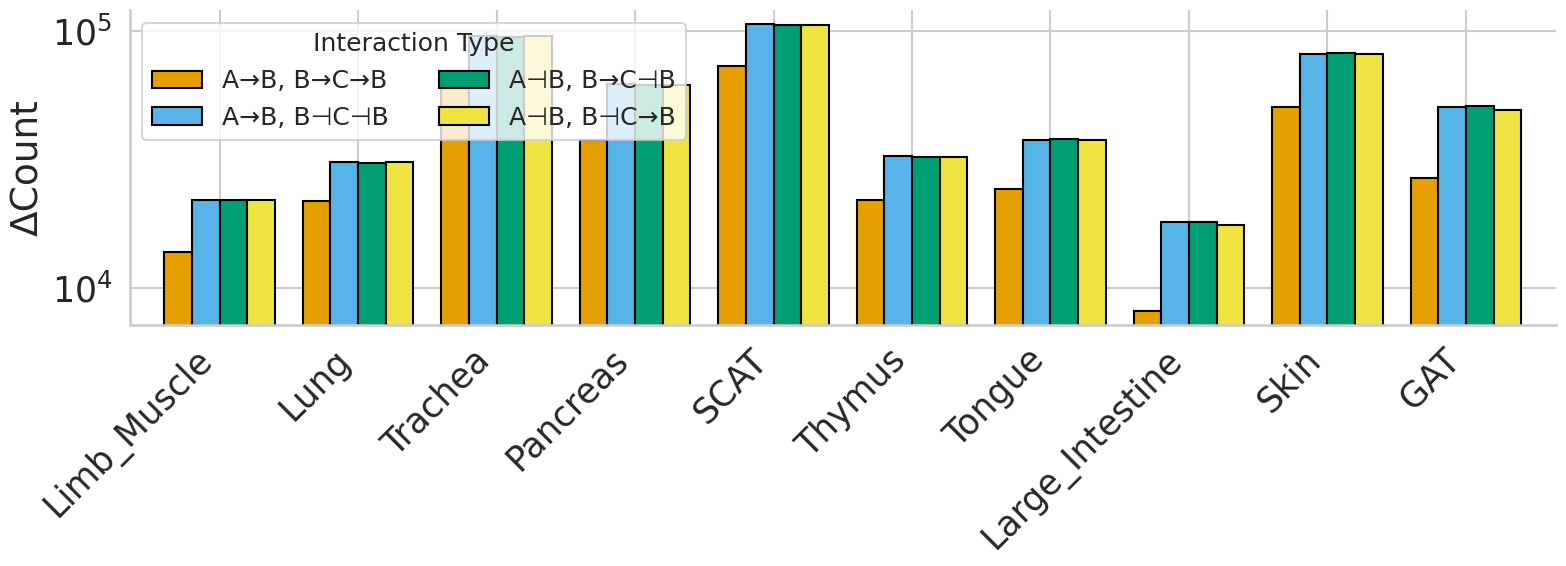

In [126]:
palette = ['#949494', '#cc78bc', '#fbafe4', '#56b4e9']
palette = ['#E69F00', '#56B4E9', '#009E73', '#F0E442']
# Pivot to get patterns as columns (optional)
#palette = sns.color_palette("colorblind")

plt.rcParams['font.family'] = 'DejaVu Sans'  # current default
pivot_df = diff_df.pivot(index='Tissue', columns='Pattern', values='ΔCount (3m - 24m)').fillna(0)

# Plot
plt.figure(figsize=(16, 7))

pivot_df.plot(kind='bar', width=0.8, figsize=(16, 6), color=palette,edgecolor='black')
sns.despine(left=False, bottom=False, top=True, right=True)
plt.xlabel("", fontsize=0)
plt.ylabel("ΔCount", fontsize=27)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(rotation=45, ha='right')

arrow = "\u2192"
inhibit = "\u22A3"

replacements = {'+': f'{arrow}', '-': f'{inhibit}'}
replacements = {"+": r"$\to$", "-": r"$\dashv$"}
handles, labels = plt.gca().get_legend_handles_labels()
#new_labels = [lbl.replace("+", r"$\to$").replace("-", r"$\dashv$") for lbl in labels]

new_labels = [lbl.replace("+",  f'{arrow}').replace("-", f'{inhibit}') for lbl in labels]
plt.legend(handles, new_labels, title="Interactions")
print(new_labels)
test = []
for label in new_labels:
    new = []
    new.append(f'A{label[0]}B, B{label[1]}C{label[2]}B')
    print(new)
    test.append(new[0])
plt.legend(
    handles, test, title=r"Interaction Type",
    fontsize=18,
    ncols=2,
    loc='upper left',
    #bbox_to_anchor=(0.235, 1)  # 75% of width, same top line
)
plt.yscale('log')
#plt.axhline(1, c='black')
#plt.text(0.5, 0.5, r"$A \overset{\to}{\underset{\dashv}{ }B}$", fontsize=20)
plt.tight_layout()
plt.savefig(f'paper_figs_final/{loop_type}_counts_indiv_summary', dpi=300)

palette


            Tissue      count 3m     count 24m
0              GAT  1.183525e+06  1.013731e+06
1  Large Intestine  1.316922e+06  1.121377e+06
2      Limb Muscle  1.746962e+05  1.578705e+05
3             Lung  2.233371e+05  1.992505e+05
4         Pancreas  1.313434e+06  1.048906e+06
5             SCAT  1.626501e+06  1.382359e+06
6             Skin  1.262201e+06  9.037933e+05
7           Thymus  7.073562e+05  5.022952e+05
8           Tongue  1.259448e+06  9.412581e+05
9          Trachea  1.009615e+06  8.098581e+05


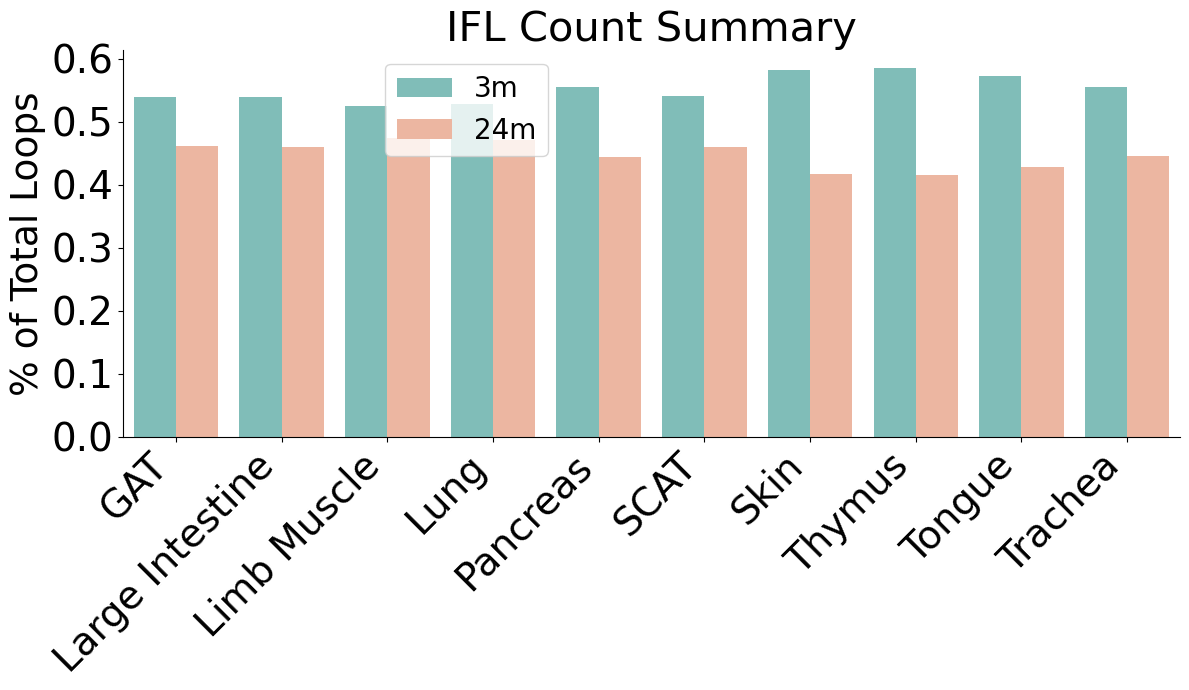

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# COLORS
palette = ['grey', 'lightgreen']  # you can pass just 2 colors too
loop_type = 'IFL'
diff_df = diff_df_IFL
# 1) Collapse patterns → totals per tissue for each age
#    (If diff_df already has one row per tissue, groupby will just pass-through.)
df_totals = (diff_df
             .groupby('Tissue')[['count 3m', 'count 24m']]
             .sum()
             .reset_index())
print(df_totals)
df_totals['frac_3m'] = df_totals['count 3m'] / (df_totals['count 3m'] + df_totals['count 24m'])
df_totals['frac_24m'] = df_totals['count 24m'] / (df_totals['count 3m'] + df_totals['count 24m'])
# 2) Long (tidy) format for seaborn
df_long = df_totals.melt(
    id_vars='Tissue',
    value_vars=['frac_3m', 'frac_24m'],
    var_name='Age',
    value_name='Count'
)
# Optional: prettify legend labels
df_long['Age'] = df_long['Age'].str.replace('frac_', '', regex=False)  # -> '3m' / '24m'

# 3) Plot grouped bars
fig, ax = plt.subplots(figsize=(12, 7))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#ax.yaxis.get_offset_text().set_fontsize(24)
palette=['#76c7c0','#f9b194']
sns.barplot(data=df_long, x='Tissue', y='Count', hue='Age', ax=ax, palette=palette)
sns.despine(left=False, bottom=False, top=True, right=True)
plt.xlabel("", fontsize=0)
plt.ylabel(r'% of Total Loops', fontsize=27)
plt.title(f"{loop_type} Count Summary", fontsize=30)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(
    fontsize=20,
    loc='upper left',
    bbox_to_anchor=(0.235, 1)  # 75% of width, same top line
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'paper_figs_final/{loop_type}_counts_summed_summary.pdf', dpi=300)
plt.show()


<Axes: xlabel='pattern', ylabel='count'>

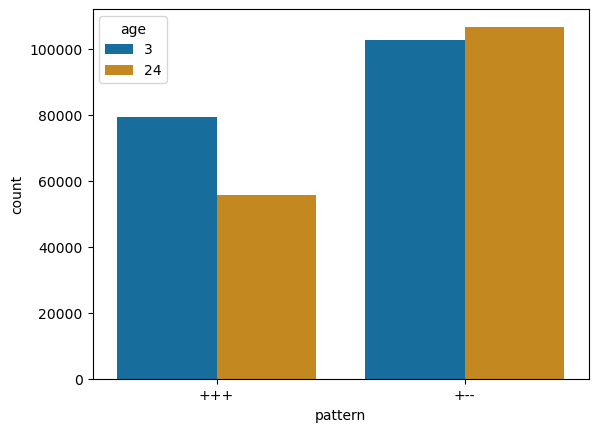

In [24]:
t='Limb_Muscle'
keep = ['+++', '-+-', '+--','--+']

motif_df = pd.read_csv(f'IFL_df_{t}.csv')
counts_df = pd.read_csv(f'IFL_counts_df_{t}.csv')

motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :]
counts_df_filtered = counts_df.loc[counts_df['pattern'].isin(keep), :]
sns.barplot(data=counts_df_filtered, x='pattern', y='count', hue='age', palette='colorblind')

In [153]:
df_long

Tissue  Age     Count
0   Skin   3m  3.521974
1   Skin  24m  0.478026

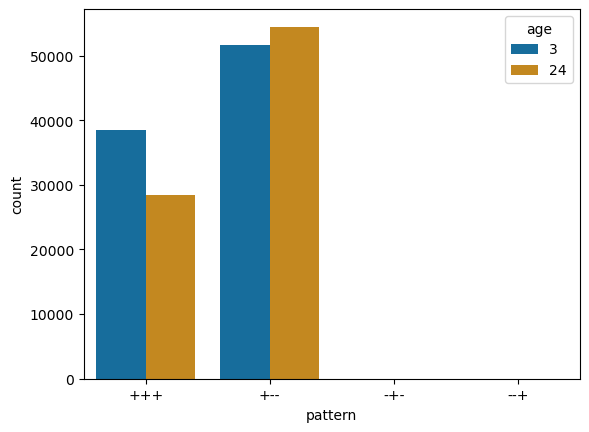

In [ ]:
t='Limb_Muscle'
keep = ['+++', '-+-', '+--','--+']
keep = ['+++','--+', '-+-', '+--']


motif_df2 = pd.read_csv(f'IFL_df_{t}.csv')
counts_df2 = pd.read_csv(f'IFL_counts_df_{t}.csv')

motif_df_filtered = motif_df.loc[motif_df['pattern'].isin(keep), :]
counts_df_filtered2 = counts_df2.loc[counts_df2['pattern'].isin(keep), :]
counts_df_filtered2 = counts_df2.loc[counts_df2['pattern'].isin(keep), :]

sns.barplot(data=counts_df_filtered2, x='pattern', y='count', hue='age', palette='colorblind')
counts_df2



age  type    count
0    3  IFFL  83729.0
1   24  IFFL   3740.0
2    3   IFL  90245.5
3   24   IFL  82882.0

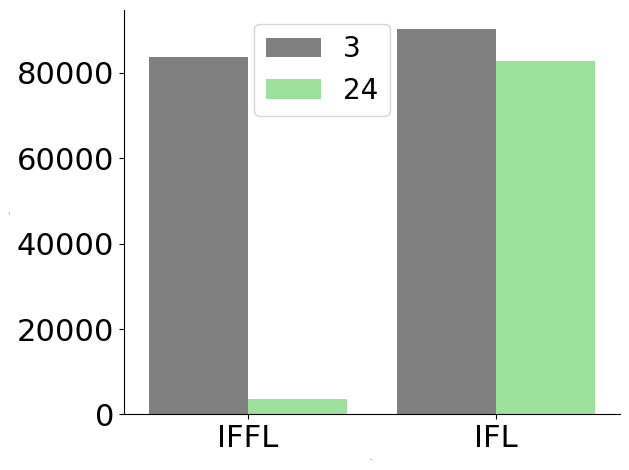

In [ ]:
count1 = counts_df_filtered[counts_df_filtered['age']==3]['count'].sum()
count3 = counts_df_filtered2[counts_df_filtered2['age']==3]['count'].sum()
count2 = counts_df_filtered[counts_df_filtered['age']==24]['count'].sum()
count4 = counts_df_filtered2[counts_df_filtered2['age']==24]['count'].sum()

counts_all = [count1, count2, count3, count4]

plt.grid(False)
plt.tight_layout()

sns.despine(left=False, bottom=False, top=True, right=True)
#ax.set_xlim([0,xs[1]+0.05])
#ax.set_ylim([0,xs[1]+0.05])

#plt.xlabel(f'MI 3m',fontsize=28)
#plt.ylabel(f'MI 24m distribution in 3m network',fontsize=28) # TF distribution in 24m network
plt.xlabel("", fontsize=0)
plt.ylabel("", fontsize=0)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
#plt.title(f'{t}', fontsize=32)

#ax.set_aspect('auto') 
df = pd.DataFrame({'age':[3,24,3,24], 'type':['IFFL', 'IFFL', 'IFL', 'IFL'], 'count':counts_all })
sns.barplot(data=df, x='type', y='count', hue='age', palette=['grey', 'lightgreen'])
plt.legend(
    fontsize=20,
    loc='upper left',
    bbox_to_anchor=(0.235, 1)  # 75% of width, same top line
)
plt.tight_layout()

plt.savefig(f'paper_figs_final/bar_plot_ifl_iffl.pdf', dpi=600)

df

# Check Stabiility

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import os

tissues = np.load(f'tissue_order_by_MI_prop.npy', allow_pickle=True)
records = []
niters = 20
factor = 0.01
for t in tissues:
    count = 0
    L1_arr_3m_tf = np.zeros(niters)
    L1_arr_24m_tf = np.zeros(niters)
    print(f'On tissue {t}')
    tf_data3 = np.load(f'data/{t}_tf_data_binary_3m_filt.npy')
    tf_data3_mean = tf_data3.mean()

    tf_data24 = np.load(f'data/{t}_tf_data_binary_24m_filt.npy')
    tf_data24_mean = tf_data24.mean()

    tg_data3 = np.load(f'data/{t}_tg_data_binary_3m_filt.npy')
    tg_data3_mean = tg_data3.mean()

    tg_data24 = np.load(f'data/{t}_tg_data_binary_24m_filt.npy')
    tg_data24_mean = tg_data24.mean()

    if not os.path.exists(f'../project/Aging/stab_samples/L1_arr_3m_both_tf_{t}.npy'):
        for i in range(niters):
            samples3m = np.load(f'../project/Aging/stab_samples/samples_both_iter_{i}_{t}_fact_{factor}_no_ho_stab_3m.npy')
            l1 = np.sum(np.abs(samples3m.mean(axis=1)-tf_data3.mean(axis=1)))/tf_data3.shape[0]
            print(l1, tf_data3.shape[0])
            L1_arr_3m_tf[count] = l1/tf_data3_mean

            samples24m = np.load(f'../project/Aging/stab_samples/samples_both_iter_{i}_{t}_fact_{factor}_no_ho_stab_3m.npy')
            l1 = np.sum(np.abs(samples24m.mean(axis=1)-tf_data24.mean(axis=1)))/tf_data24.shape[0]
            L1_arr_24m_tf[count] = l1/tf_data24_mean
            count+=1
        np.save(f'../project/Aging/stab_samples/L1_arr_3m_both_tf_{t}.npy', L1_arr_3m_tf)
        np.save(f'../project/Aging/stab_samples/L1_arr_24m_both_tf_{t}.npy', L1_arr_24m_tf)
    else:
        L1_arr_3m_tf = np.load(f'../project/Aging/stab_samples/L1_arr_3m_both_tf_{t}.npy')
        L1_arr_24m_tf = np.load(f'../project/Aging/stab_samples/L1_arr_24m_both_tf_{t}.npy')
    if not os.path.exists(f'../project/Aging/stab_samples/L1_arr_24m_both_tg_{t}.npy'):
        print(f'path for {t} isn\'t here')
        continue

    L1_arr_3m_tg = np.load(f'../project/Aging/stab_samples/L1_arr_3m_both_tg_{t}.npy')
    L1_arr_24m_tg = np.load(f'../project/Aging/stab_samples/L1_arr_24m_both_tg_{t}.npy')

    records.append({
        'Tissue': t,
        'L1 TF 24m': L1_arr_24m_tf,
        'L1 TF 3m': L1_arr_3m_tf,
        'L1 TG 24m': L1_arr_24m_tg/tg_data24_mean,
        'L1 TG 3m': L1_arr_3m_tg/tg_data3_mean
    })

# Convert to DataFrame
L1_df = pd.DataFrame(records)

L1_df

On tissue GAT
On tissue Limb_Muscle
On tissue Lung
On tissue Trachea
On tissue SCAT
On tissue Pancreas
On tissue Thymus
On tissue Tongue
On tissue Large_Intestine
On tissue Skin


Tissue                                          L1 TF 24m  \
0              GAT  [2.9800052642822266, 2.9739012718200684, 2.686...   
1      Limb_Muscle  [6.545556545257568, 5.705972671508789, 6.09074...   
2             Lung  [4.3145833015441895, 4.30312442779541, 4.47837...   
3          Trachea  [3.4825706481933594, 2.919693946838379, 3.1727...   
4             SCAT  [3.592790126800537, 3.6249899864196777, 3.0961...   
5         Pancreas  [2.4822707176208496, 2.4948365688323975, 2.524...   
6           Thymus  [3.092482089996338, 3.0654537677764893, 2.7317...   
7           Tongue  [1.3089408874511719, 1.3363323211669922, 1.010...   
8  Large_Intestine  [2.2532565593719482, 1.962463140487671, 2.3191...   
9             Skin  [2.690263509750366, 2.7265570163726807, 2.1322...   

                                            L1 TF 3m  \
0  [1.5554077625274658, 1.5621061325073242, 1.376...   
1  [2.545686960220337, 2.2279715538024902, 2.3799...   
2  [2.561063766479492, 2.523977041244507, 2.65671...   
3  [1.5663942098617554, 1.321332335472107, 1.4334...   
4  [2.1001169681549072, 2.0957765579223633, 1.758...   
5  [1.0165022611618042, 1.0254578590393066, 1.052...   
6  [3.3881592750549316, 3.3588802814483643, 2.944...   
7  [0.6821420788764954, 0.712089478969574, 0.5780...   
8  [1.4372659921646118, 1.2367007732391357, 1.485...   
9  [1.420415997505188, 1.4527286291122437, 1.0864...   

                                           L1 TG 24m  \
0  [1.8143259417363415, 2.0103731285224145, 2.019...   
1  [4.191771795848451, 4.241028072508734, 4.47746...   
2  [2.8522738273259964, 3.0146583724308207, 3.242...   
3  [3.1745277226259008, 2.825311578528702, 3.1992...   
4  [2.902809498885598, 2.839597554579665, 2.93826...   
5  [2.1161252820762138, 2.228475581328068, 2.2958...   
6  [2.208671585141184, 2.2187450696377473, 2.1555...   
7  [0.7422576437801862, 0.48678315334133554, 0.78...   
8  [1.0597455663054556, 1.3137485038071817, 1.202...   
9  [1.8005139718324674, 1.8812206499365234, 1.778...   

                                            L1 TG 3m  
0  [1.1955102969143399, 1.1832752910055195, 1.038...  
1  [2.1719905600420377, 1.9042732425859177, 2.027...  
2  [2.0229883008052423, 1.865463167463126, 2.0982...  
3  [1.2845105003921038, 1.1047625513844483, 1.174...  
4  [1.6623412419539965, 1.6323554742158528, 1.340...  
5  [0.7136575104899002, 0.7110020624669907, 0.727...  
6  [2.507591116653592, 2.399576560306901, 2.15771...  
7  [0.3711609062797349, 0.47246336672082506, 0.29...  
8  [1.0006291197647603, 0.7827086665543984, 1.026...  
9  [1.0945643172586565, 1.1499412893932137, 0.789...

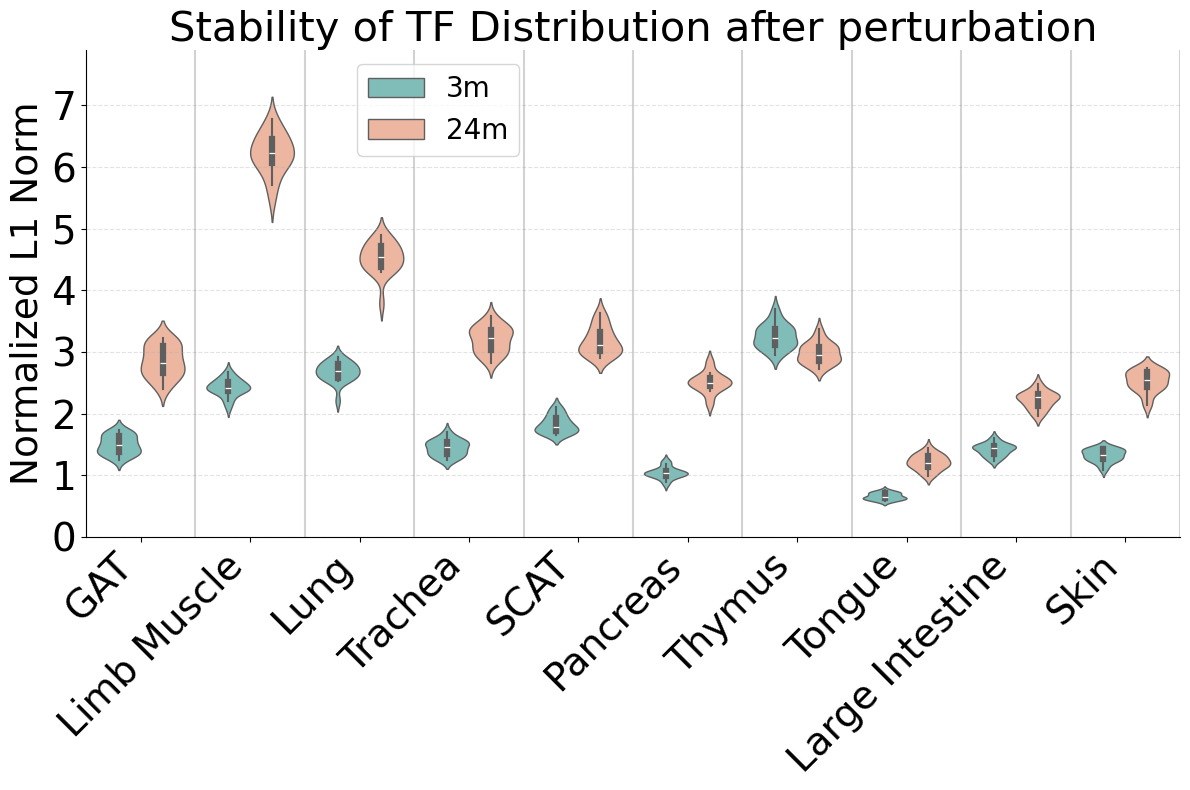

(20,)

In [8]:
df_long = (
    L1_df
    .melt(id_vars="Tissue", 
          value_vars=["L1 TF 3m", "L1 TF 24m", "L1 TG 3m", "L1 TG 24m"],
          var_name="Category", value_name="Values")
    .explode("Values")   # turn lists into rows
)

# Parse 'Category' into Type (TF/TG) and Age (3m/24m)
df_long["Type"] = df_long["Category"].str.extract(r"L1 (TF|TG)")
df_long["Age"]  = df_long["Category"].str.extract(r"(3m|24m)")
df_long["Values"] = df_long["Values"].astype(float)
import seaborn as sns
import matplotlib.pyplot as plt
color_3m = '#76c7c0'
color_24m = '#f9b194'
# violin plot: one axis, grouped by Tissue
fig, axs = plt.subplots(1, figsize = (12,8))
df_long["Tissue"] = df_long["Tissue"].str.replace('_', ' ')
tissue_order = df_long["Tissue"].unique().tolist()
ax = sns.violinplot(
    data=df_long[(df_long["Type"]=='TF')],# & (df_long['Tissue'] == 'Limb_Muscle')],
    x="Tissue", y="Values",
    hue="Age",       # separate TF vs TG
    split=False,
    #order = ['3m', '24m'],
    #dodge=True,
    inner="box",
    linewidth=1.0,
    density_norm="width",
    palette=['#76c7c0','#f9b194']    # or your custom ['grey','lightgreen','pink','cornflowerblue']
)
'''
sns.violinplot(
    data=df_long[df_long["Type"]=='TF'],
    x="Tissue", y="Values",
    hue="Age",       # separate TF vs TG
    split=False,
    order = tissue_order,
    fill = False,
    bw=0.37,dodge=True,
    inner="box",
    linewidth=1.5,
    density_norm="width",
    palette=['grey','lightgreen'] 
)
'''
sns.despine(left=False, bottom=False, top=True, right=True)

plt.ylim([0,7.9])


plt.xlabel("", fontsize=0)
plt.ylabel(f'Normalized L1 Norm', fontsize=27)
plt.title(f"Stability of TF Distribution after perturbation", fontsize=30)
#plt.ylabel("MI Swapped", fontsize=23)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

plt.legend(
    fontsize=20,
    loc='upper left',
    bbox_to_anchor=(0.235, 1)  # 75% of width, same top line
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.label("", fontsize=0)

#plt.ylabel("MI Swapped", fontsize=23)
#plt.xticks(np.arange(len(tissue_order)),labels = tissue_order,fontsize=25)
##plt.yticks(fontsize=25)
#ax.set_axisbelow(True)
#for i in range(len(tissue_order)+1):
#    ax.axvline(i - 0.5, color="0.85", lw=0.8, zorder=0)

# light grid for Y only
#plt.grid(False)
ax.yaxis.grid(True, linestyle="--", alpha=0.35)
#ax.xaxis.grid(True, linestyle="--", alpha=0.35)
for n in range(len(tissues)+1):
    plt.axvline(n-0.5, c='grey', alpha=0.35)



#plt.legend(
#    fontsize=24,
    #bbox_to_anchor=(0.235, 1)  # 75% of width, same top line
#)
#plt.xticks(rotation=55, ha='right')
'''
# If you want Age as well → dodge with both hue dimensions
# easiest is to combine Type + Age into one column:
df_long["Group"] = df_long["Type"] + "_" + df_long["Age"]

plt.figure(figsize=(16,6))
sns.violinplot(
    data=df_long,
    x="Tissue", y="Values",
    hue="Group",              # now 4 categories
    split=False,
    inner="box",
    bw=0.37,
    
    
    palette=['grey', 'lightgreen', 'pink', 'cornflowerblue']  # 4 colors
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("L1 Values")
plt.title("L1 TG across Tissues")
plt.legend(title="Group")
plt.tight_layout()
'''
plt.tight_layout()

plt.savefig(f'paper_figs_final/stability_tfs_summary.pdf', dpi=300)
plt.show()
L1_arr_3m_tf.shape

/tmp/tmp.JlGKmm9obY/ipykernel_3571160/173329871.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/tmp/tmp.JlGKmm9obY/ipykernel_3571160/173329871.py:15: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.37`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = sns.violinplot(


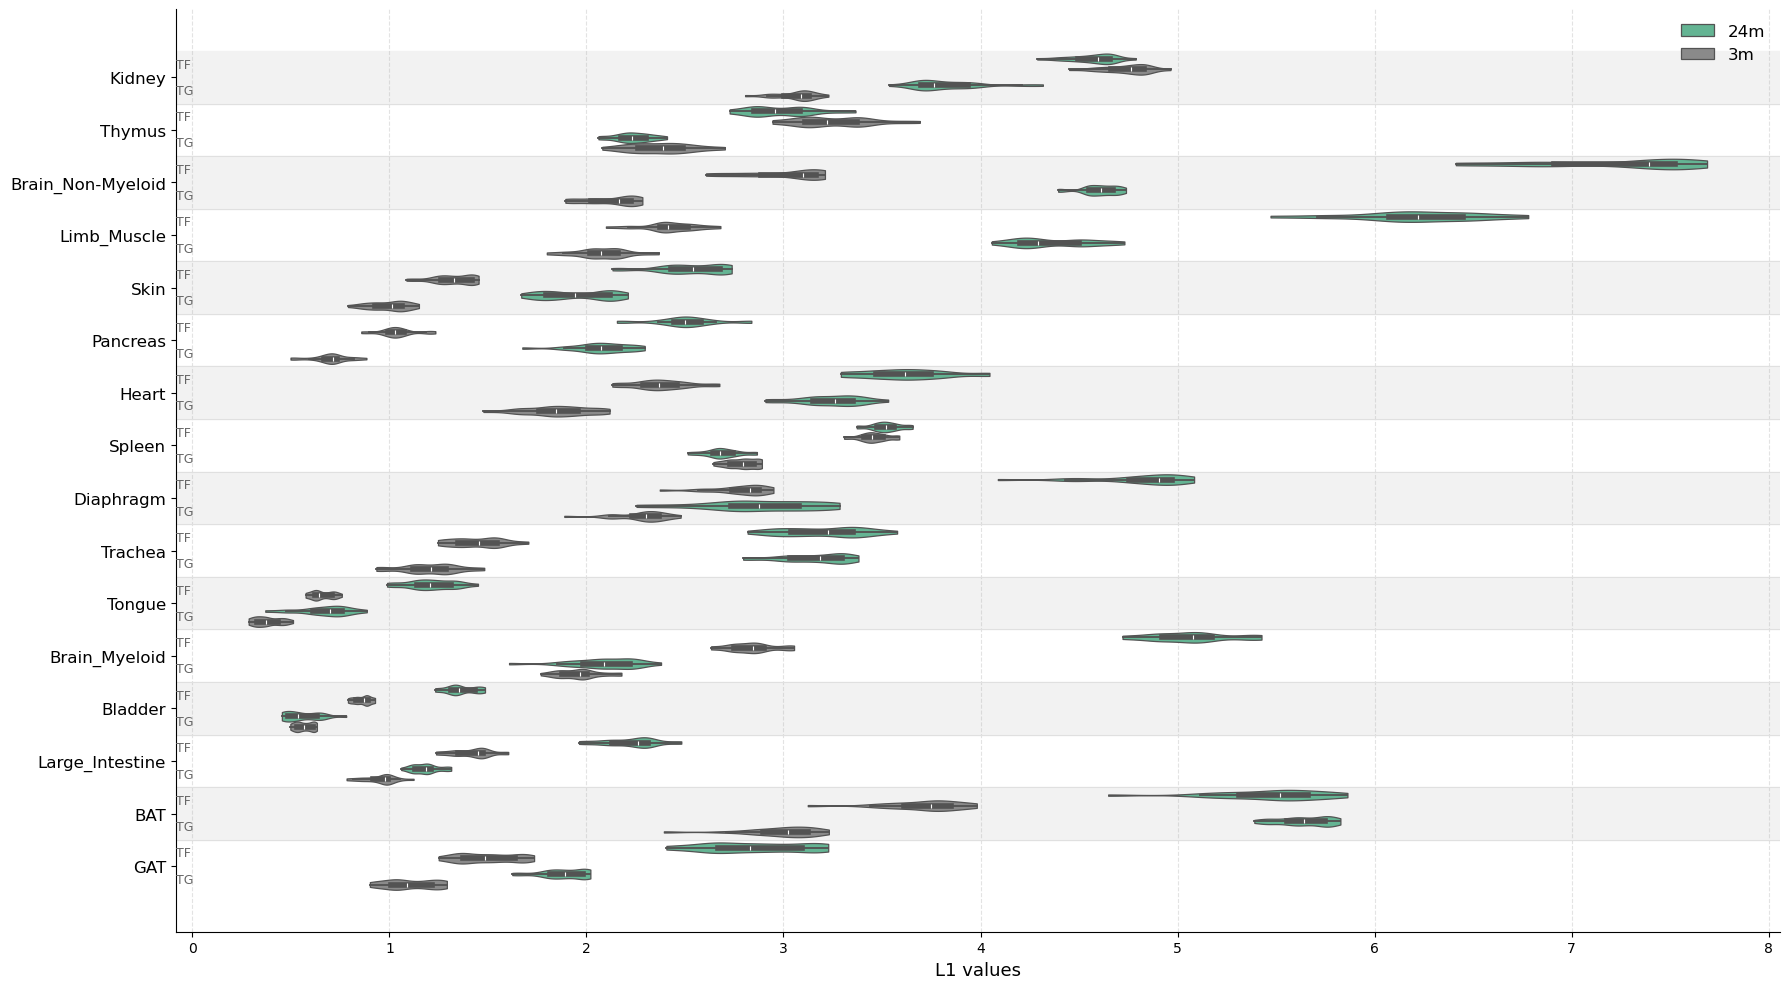

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# df_long has: Tissue, Type in {"TF","TG"}, Age in {"3m","24m"}, Values (float)

# --- order rows: Kidney|TF, Kidney|TG, Thymus|TF, Thymus|TG, ...
tissues = df_long["Tissue"].unique().tolist()
y_order = [f"{t} | {ty}" for t in tissues for ty in ("TF","TG")]

plot_df = df_long.copy()
plot_df["TissueType"] = plot_df["Tissue"] + " | " + plot_df["Type"]

plt.figure(figsize=(18, 10))
ax = sns.violinplot(
    data=plot_df, y="TissueType", x="Values",
    hue="Age", hue_order=["24m","3m"],    # consistent legend/order
    order=y_order, orient="h",
    dodge=True, inner="box",
    cut=0, bw=0.37, scale="width",
    linewidth=0.9, saturation=0.9,
    palette=["#60b894", "#8a8a8a"]        # green=24m, gray=3m (swap if you prefer)
)

# --- group each tissue visually with light bands and centered labels
ax.set_axisbelow(True)
for i, t in enumerate(tissues):
    y0 = 2*i - 0.5      # start of this tissue's 2-row block
    y1 = 2*i + 1.5      # end
    ax.axhspan(y0, y1, color="0.95", zorder=0) if i % 2 == 0 else None  # alternating band

# draw thin separators between tissue blocks
for i in range(2, 2*len(tissues), 2):
    ax.axhline(i-0.5, color="0.88", lw=0.8, zorder=1)

# --- y ticks: show tissue name centered between TF/TG rows
mid_ticks = [2*i + 0.5 for i in range(len(tissues))]
ax.set_yticks(mid_ticks)
ax.set_yticklabels(tissues, fontsize=12)

# optional: small TF/TG labels at left for each sub-row
for i, t in enumerate(tissues):
    ax.text(ax.get_xlim()[0], 2*i,   "TF", va="center", ha="left", fontsize=9, color="0.4")
    ax.text(ax.get_xlim()[0], 2*i+1, "TG", va="center", ha="left", fontsize=9, color="0.4")

# cosmetics
sns.despine(left=False, bottom=False)
ax.xaxis.grid(True, linestyle="--", alpha=0.35)
ax.set_xlabel("L1 values", fontsize=13)
ax.set_ylabel("")
leg = ax.legend(title="", loc="upper right", frameon=False, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_long: Tissue, Type (TF/TG), Age (3m/24m), Values

# Order: for each tissue, show TF then TG
tissues = df_long["Tissue"].unique().tolist()
x_order = [f"{t} | {ty}" for t in tissues for ty in ("TF","TG")]

plot_df = df_long.copy()
plot_df["TissueType"] = plot_df["Tissue"] + " | " + plot_df["Type"]

plt.figure(figsize=(20,8))
ax = sns.violinplot(
    data=plot_df,
    x="TissueType", y="Values",
    hue="Age", hue_order=["24m","3m"],
    order=x_order,
    dodge=True, inner="box", cut=0, bw=0.37,
    linewidth=0.9, saturation=0.9,
    palette=["#60b894","#8a8a8a"]   # green=24m, gray=3m
)

# --- grouping bands for each tissue (spanning 2 x-ticks)
for i in range(len(tissues)):
    ax.axvspan(2*i-0.5, 2*i+1.5, color="0.95", zorder=0)

# --- tidy x-tick labels: show tissue once, with TF/TG below
new_labels = []
for t in tissues:
    new_labels += [f"{t}\nTF", f"{t}\nTG"]
ax.set_xticklabels(new_labels, rotation=45, ha="right", fontsize=11)

# cosmetics
sns.despine(left=False, bottom=False)
ax.yaxis.grid(True, linestyle="--", alpha=0.3)
ax.set_ylabel("L1 values", fontsize=13)
ax.set_xlabel("")
ax.legend(title="", loc="upper right", frameon=False, fontsize=12)

plt.tight_layout()
plt.show()